# PROJECT ISRAEL & PALESTINE: DAVID & GOLIATH?

The conflict between Israel and Palestine is complicated and controversial. The land has a long and even 'biblical' history. This project will take a look at the economy, demography and military of the two countries between 2000-2020. How strong and rich are Israel and Palestine. What are the differences and how do they measure op to eachother?

# Goals


1: Get acquainted with the data:
* Start by loading the dataset into a data analysis tool, such as Python with libraries like Pandas, or any other tool you prefer.
* Explore the structure of the dataset, including the columns, data types, and the first few rows to get a sense of the data's content.

2: Clean the data so it can be analysed properly:
* Check for missing values, outliers, or inconsistent data. Handle any missing or incorrect data.
* Convert data types if needed (e.g., converting GDP values from strings to numeric values).
* Ensure that the dataset is properly formatted for analysis.

3: Questions for the analysis:
1. What do the countries look like demographically? 
2. How do the economies of the two countries compare? Are they competitors?
3. How do the militaries stack up next to each other?
4. Are there any correlations between fertility rate and GDP growth?

4: Analyse the data variables to find patterns and insights on the questions:
* Conduct exploratory data analysis (EDA) to find patterns and insights related to the questions.

# Data

The data for this project is downloaded on the kaggle.com website. 

‘Israel-Palestine.csv’: https://www.kaggle.com/datasets/zsinghrahulk/israel-vs-palestine/discussion

"The dataset contains the information for the 2 countries ranging from 2000 to 2021. It takes a peek into the education , health , GDO and other economic performance indicators. The data has been sourced in from OECD, CSO, worldbank and UN." (Kaggle, 2023)

# Loading the data

In [1]:
# sets up matplotlib with interactive features
%matplotlib notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

israel_palestine:

The dataset contains 16 columns. 

Year, Country, GDP (in USD), Population, GDP Growth Rate, Fertility Rate, Infant Mortality Rate, Maternal Moratility Rate, Agricultural Output (in USD), Military Personnel, Reserve Military Personnel, Literacy Rate, IT Output (in USD), Number of Tanks, Number of Submarines and Number of Armoured Vehicles.

Data types that need to be changed: 
- GDP (in USD), it is an object with text and needs to be int64. 
- Population, it is an object and needs to be int64. 
- Agricultural Output (in USD), is an object and needs to be int64.
- Active Military Personnel, is an object and needs to be int64.
- Reserve Military Personnel, is an object and needs to be int64.
- IT Output (in USD), is an object and needs to be int64. 
- Number of Tanks, is an object and needs to be int64. 
- Number of Armoured Vehicles, is an object and needs to be int64.

Missing data:

Palestine has all their military data missing because the country doesn't have an official military.
- Active Military Personnel: 22 
- Reserve Military Personnel: 22
- Number of Tanks: 22
- Number of Submarines: 22
- Number of Armoured Vehicles: 22

The data set did not provide the following missing data for 13 years.
- Literacy Rate (%): 13
- IT Output (in USD): 13

In [2]:
israel_palestine = pd.read_csv('Israel-Palestine.csv')
israel_palestine.head()

Year    Country    GDP (in USD) Population  GDP Growth Rate (%)  \
0  2000     Israel  132.02 billion  6,049,000                 5.18   
1  2000  Palestine    4.56 billion  3,374,000                 5.33   
2  2001     Israel  131.02 billion  6,165,000                -0.47   
3  2001  Palestine    4.59 billion  3,400,000               -50.00   
4  2002     Israel  126.64 billion  6,263,000                -0.35   

   Fertility Rate  Infant Mortality Rate (per 1,000 live births)  \
0            2.89                                            5.0   
1            5.36                                           24.6   
2            2.89                                            4.8   
3            5.22                                           22.5   
4            2.98                                            4.6   

   Maternal Mortality Rate (per 100,000 live births)  \
0                                                7.2   
1                                               26.0   
2                                                6.7   
3                                               24.4   
4                                                5.9   

  Agricultural Output (in USD) Active Military Personnel  \
0                 5.71 billion                   168,000   
1                  880 million                       NaN   
2                 5.17 billion                   166,500   
3                  925 million                       NaN   
4                 4.76 billion                   163,000   

  Reserve Military Personnel  Literacy Rate (%) IT Output (in USD)  \
0                    445,000               97.1       6.78 billion   
1                        NaN               90.3      0.115 billion   
2                    445,000               97.5       6.89 billion   
3                        NaN               90.8      0.122 billion   
4                    375,000               97.9       7.02 billion   

  Number of Tanks  Number of Submarines Number of Armoured Vehicles  
0           2,760                   3.0                      10,760  
1             NaN                   NaN                         NaN  
2           2,791                   3.0                      10,814  
3             NaN                   NaN                         NaN  
4           2,821                   3.0                      10,885

In [3]:
israel_palestine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Year                                               44 non-null     int64  
 1   Country                                            44 non-null     object 
 2   GDP (in USD)                                       44 non-null     object 
 3   Population                                         44 non-null     object 
 4   GDP Growth Rate (%)                                44 non-null     float64
 5   Fertility Rate                                     44 non-null     float64
 6   Infant Mortality Rate (per 1,000 live births)      44 non-null     float64
 7   Maternal Mortality Rate (per 100,000 live births)  44 non-null     float64
 8   Agricultural Output (in USD)                       44 non-null     object 
 9   Active Milit

In [4]:
israel_palestine.describe()

Year  GDP Growth Rate (%)  Fertility Rate  \
count    44.000000            44.000000       44.000000   
mean   2010.500000             0.333864        3.539545   
std       6.417636            11.698279        0.742763   
min    2000.000000           -50.000000        2.810000   
25%    2005.000000             0.975000        2.975000   
50%    2010.500000             3.450000        3.150000   
75%    2016.000000             4.917500        3.897500   
max    2021.000000            10.500000        5.360000   

       Infant Mortality Rate (per 1,000 live births)  \
count                                      44.000000   
mean                                        9.725000   
std                                         6.995285   
min                                         2.600000   
25%                                         3.650000   
50%                                         7.650000   
75%                                        14.500000   
max                                        24.600000   

       Maternal Mortality Rate (per 100,000 live births)  Literacy Rate (%)  \
count                                          44.000000          31.000000   
mean                                           13.436364          96.422581   
std                                             9.035617           2.736751   
min                                             2.900000          90.300000   
25%                                             5.350000          97.300000   
50%                                            11.200000          97.800000   
75%                                            21.150000          97.800000   
max                                            30.900000          98.600000   

       Number of Submarines  
count             22.000000  
mean               3.909091  
std                1.019294  
min                3.000000  
25%                3.000000  
50%                3.000000  
75%                5.000000  
max                5.000000

In [5]:
israel_palestine.isnull().sum()

Year                                                  0
Country                                               0
GDP (in USD)                                          0
Population                                            0
GDP Growth Rate (%)                                   0
Fertility Rate                                        0
Infant Mortality Rate (per 1,000 live births)         0
Maternal Mortality Rate (per 100,000 live births)     0
Agricultural Output (in USD)                          0
Active Military Personnel                            22
Reserve Military Personnel                           22
Literacy Rate (%)                                    13
IT Output (in USD)                                   13
Number of Tanks                                      22
Number of Submarines                                 22
Number of Armoured Vehicles                          22
dtype: int64

# Clean the data

GDP

In [6]:
df = israel_palestine
# Use apply to remove non-numeric characters and convert to float, handling exceptions
df['GDP (in USD)'] = df['GDP (in USD)'].apply(lambda x: float(x.replace(' billion', '').replace(',', '')) if isinstance(x, str) else x)
# Rename the column to 'GDP billion (in USD)'
df.rename(columns={'GDP (in USD)': 'GDP billion (in USD)'}, inplace=True)
df.head()

Year    Country  GDP billion (in USD) Population  GDP Growth Rate (%)  \
0  2000     Israel                132.02  6,049,000                 5.18   
1  2000  Palestine                  4.56  3,374,000                 5.33   
2  2001     Israel                131.02  6,165,000                -0.47   
3  2001  Palestine                  4.59  3,400,000               -50.00   
4  2002     Israel                126.64  6,263,000                -0.35   

   Fertility Rate  Infant Mortality Rate (per 1,000 live births)  \
0            2.89                                            5.0   
1            5.36                                           24.6   
2            2.89                                            4.8   
3            5.22                                           22.5   
4            2.98                                            4.6   

   Maternal Mortality Rate (per 100,000 live births)  \
0                                                7.2   
1                                               26.0   
2                                                6.7   
3                                               24.4   
4                                                5.9   

  Agricultural Output (in USD) Active Military Personnel  \
0                 5.71 billion                   168,000   
1                  880 million                       NaN   
2                 5.17 billion                   166,500   
3                  925 million                       NaN   
4                 4.76 billion                   163,000   

  Reserve Military Personnel  Literacy Rate (%) IT Output (in USD)  \
0                    445,000               97.1       6.78 billion   
1                        NaN               90.3      0.115 billion   
2                    445,000               97.5       6.89 billion   
3                        NaN               90.8      0.122 billion   
4                    375,000               97.9       7.02 billion   

  Number of Tanks  Number of Submarines Number of Armoured Vehicles  
0           2,760                   3.0                      10,760  
1             NaN                   NaN                         NaN  
2           2,791                   3.0                      10,814  
3             NaN                   NaN                         NaN  
4           2,821                   3.0                      10,885

Population

In [7]:
# Then, convert the column to an int64 data type
df['Population'] = df['Population'].str.replace(',', '')
# Then, convert the column to an int64 data type
df['Population'] = df['Population'].astype('int64')
df.head()

Year    Country  GDP billion (in USD)  Population  GDP Growth Rate (%)  \
0  2000     Israel                132.02     6049000                 5.18   
1  2000  Palestine                  4.56     3374000                 5.33   
2  2001     Israel                131.02     6165000                -0.47   
3  2001  Palestine                  4.59     3400000               -50.00   
4  2002     Israel                126.64     6263000                -0.35   

   Fertility Rate  Infant Mortality Rate (per 1,000 live births)  \
0            2.89                                            5.0   
1            5.36                                           24.6   
2            2.89                                            4.8   
3            5.22                                           22.5   
4            2.98                                            4.6   

   Maternal Mortality Rate (per 100,000 live births)  \
0                                                7.2   
1                                               26.0   
2                                                6.7   
3                                               24.4   
4                                                5.9   

  Agricultural Output (in USD) Active Military Personnel  \
0                 5.71 billion                   168,000   
1                  880 million                       NaN   
2                 5.17 billion                   166,500   
3                  925 million                       NaN   
4                 4.76 billion                   163,000   

  Reserve Military Personnel  Literacy Rate (%) IT Output (in USD)  \
0                    445,000               97.1       6.78 billion   
1                        NaN               90.3      0.115 billion   
2                    445,000               97.5       6.89 billion   
3                        NaN               90.8      0.122 billion   
4                    375,000               97.9       7.02 billion   

  Number of Tanks  Number of Submarines Number of Armoured Vehicles  
0           2,760                   3.0                      10,760  
1             NaN                   NaN                         NaN  
2           2,791                   3.0                      10,814  
3             NaN                   NaN                         NaN  
4           2,821                   3.0                      10,885

Agriculture

In [8]:
for i, output in enumerate(df['Agricultural Output (in USD)']):
    try:
        # Try to convert to float (handles existing float values)
        value = float(output)
    except ValueError:
        # Handle string values with ' billion' or ' million'
        if ' billion' in output:
            # Remove non-numeric characters and convert to float
            value = float(output.replace(' billion', '').replace(',', ''))
        elif ' million' in output:
            # Remove non-numeric characters and convert to float
            value = float(output.replace(' million', '').replace(',', ''))/1000
        else:
            # Remove non-numeric characters and convert to float
            value = float(output.replace(',', ''))

    df.at[i, 'Agricultural Output (in USD)'] = value

# Finally, convert the column to a float data type (if it's not already)
df['Agricultural Output (in USD)'] = df['Agricultural Output (in USD)'].astype('float')

df.rename(columns={'Agricultural Output (in USD)': 'Agricultural Output billion (in USD)'}, inplace=True)

df.head()

Year    Country  GDP billion (in USD)  Population  GDP Growth Rate (%)  \
0  2000     Israel                132.02     6049000                 5.18   
1  2000  Palestine                  4.56     3374000                 5.33   
2  2001     Israel                131.02     6165000                -0.47   
3  2001  Palestine                  4.59     3400000               -50.00   
4  2002     Israel                126.64     6263000                -0.35   

   Fertility Rate  Infant Mortality Rate (per 1,000 live births)  \
0            2.89                                            5.0   
1            5.36                                           24.6   
2            2.89                                            4.8   
3            5.22                                           22.5   
4            2.98                                            4.6   

   Maternal Mortality Rate (per 100,000 live births)  \
0                                                7.2   
1                                               26.0   
2                                                6.7   
3                                               24.4   
4                                                5.9   

   Agricultural Output billion (in USD) Active Military Personnel  \
0                                 5.710                   168,000   
1                                 0.880                       NaN   
2                                 5.170                   166,500   
3                                 0.925                       NaN   
4                                 4.760                   163,000   

  Reserve Military Personnel  Literacy Rate (%) IT Output (in USD)  \
0                    445,000               97.1       6.78 billion   
1                        NaN               90.3      0.115 billion   
2                    445,000               97.5       6.89 billion   
3                        NaN               90.8      0.122 billion   
4                    375,000               97.9       7.02 billion   

  Number of Tanks  Number of Submarines Number of Armoured Vehicles  
0           2,760                   3.0                      10,760  
1             NaN                   NaN                         NaN  
2           2,791                   3.0                      10,814  
3             NaN                   NaN                         NaN  
4           2,821                   3.0                      10,885

IT Output

In [9]:
# Use apply to remove non-numeric characters and convert to float, handling exceptions
df['IT Output (in USD)'] = df['IT Output (in USD)'].apply(lambda x: float(x.replace(' billion', '').replace(',', '')) if isinstance(x, str) else x)

df.rename(columns={'IT Output (in USD)': 'IT Output billion (in USD)'}, inplace=True)
df.head()

Year    Country  GDP billion (in USD)  Population  GDP Growth Rate (%)  \
0  2000     Israel                132.02     6049000                 5.18   
1  2000  Palestine                  4.56     3374000                 5.33   
2  2001     Israel                131.02     6165000                -0.47   
3  2001  Palestine                  4.59     3400000               -50.00   
4  2002     Israel                126.64     6263000                -0.35   

   Fertility Rate  Infant Mortality Rate (per 1,000 live births)  \
0            2.89                                            5.0   
1            5.36                                           24.6   
2            2.89                                            4.8   
3            5.22                                           22.5   
4            2.98                                            4.6   

   Maternal Mortality Rate (per 100,000 live births)  \
0                                                7.2   
1                                               26.0   
2                                                6.7   
3                                               24.4   
4                                                5.9   

   Agricultural Output billion (in USD) Active Military Personnel  \
0                                 5.710                   168,000   
1                                 0.880                       NaN   
2                                 5.170                   166,500   
3                                 0.925                       NaN   
4                                 4.760                   163,000   

  Reserve Military Personnel  Literacy Rate (%)  IT Output billion (in USD)  \
0                    445,000               97.1                       6.780   
1                        NaN               90.3                       0.115   
2                    445,000               97.5                       6.890   
3                        NaN               90.8                       0.122   
4                    375,000               97.9                       7.020   

  Number of Tanks  Number of Submarines Number of Armoured Vehicles  
0           2,760                   3.0                      10,760  
1             NaN                   NaN                         NaN  
2           2,791                   3.0                      10,814  
3             NaN                   NaN                         NaN  
4           2,821                   3.0                      10,885

Active military personell

In [10]:
df['Active Military Personnel'] = df['Active Military Personnel'].str.replace(',', '')

# Replace NaN values with 0
df['Active Military Personnel'] = df['Active Military Personnel'].fillna(0)

# Convert the 'Active Military Personnel' column to an integer data type
df['Active Military Personnel'] = df['Active Military Personnel'].astype('int64')

df.head()

Year    Country  GDP billion (in USD)  Population  GDP Growth Rate (%)  \
0  2000     Israel                132.02     6049000                 5.18   
1  2000  Palestine                  4.56     3374000                 5.33   
2  2001     Israel                131.02     6165000                -0.47   
3  2001  Palestine                  4.59     3400000               -50.00   
4  2002     Israel                126.64     6263000                -0.35   

   Fertility Rate  Infant Mortality Rate (per 1,000 live births)  \
0            2.89                                            5.0   
1            5.36                                           24.6   
2            2.89                                            4.8   
3            5.22                                           22.5   
4            2.98                                            4.6   

   Maternal Mortality Rate (per 100,000 live births)  \
0                                                7.2   
1                                               26.0   
2                                                6.7   
3                                               24.4   
4                                                5.9   

   Agricultural Output billion (in USD)  Active Military Personnel  \
0                                 5.710                     168000   
1                                 0.880                          0   
2                                 5.170                     166500   
3                                 0.925                          0   
4                                 4.760                     163000   

  Reserve Military Personnel  Literacy Rate (%)  IT Output billion (in USD)  \
0                    445,000               97.1                       6.780   
1                        NaN               90.3                       0.115   
2                    445,000               97.5                       6.890   
3                        NaN               90.8                       0.122   
4                    375,000               97.9                       7.020   

  Number of Tanks  Number of Submarines Number of Armoured Vehicles  
0           2,760                   3.0                      10,760  
1             NaN                   NaN                         NaN  
2           2,791                   3.0                      10,814  
3             NaN                   NaN                         NaN  
4           2,821                   3.0                      10,885

Reserve Military Personnel

In [11]:
df['Reserve Military Personnel'] = df['Reserve Military Personnel'].str.replace(',', '')

# Replace NaN values with 0
df['Reserve Military Personnel'] = df['Reserve Military Personnel'].fillna(0)

# Convert the 'Active Military Personnel' column to an integer data type
df['Reserve Military Personnel'] = df['Reserve Military Personnel'].astype('int64')

df.head()

Year    Country  GDP billion (in USD)  Population  GDP Growth Rate (%)  \
0  2000     Israel                132.02     6049000                 5.18   
1  2000  Palestine                  4.56     3374000                 5.33   
2  2001     Israel                131.02     6165000                -0.47   
3  2001  Palestine                  4.59     3400000               -50.00   
4  2002     Israel                126.64     6263000                -0.35   

   Fertility Rate  Infant Mortality Rate (per 1,000 live births)  \
0            2.89                                            5.0   
1            5.36                                           24.6   
2            2.89                                            4.8   
3            5.22                                           22.5   
4            2.98                                            4.6   

   Maternal Mortality Rate (per 100,000 live births)  \
0                                                7.2   
1                                               26.0   
2                                                6.7   
3                                               24.4   
4                                                5.9   

   Agricultural Output billion (in USD)  Active Military Personnel  \
0                                 5.710                     168000   
1                                 0.880                          0   
2                                 5.170                     166500   
3                                 0.925                          0   
4                                 4.760                     163000   

   Reserve Military Personnel  Literacy Rate (%)  IT Output billion (in USD)  \
0                      445000               97.1                       6.780   
1                           0               90.3                       0.115   
2                      445000               97.5                       6.890   
3                           0               90.8                       0.122   
4                      375000               97.9                       7.020   

  Number of Tanks  Number of Submarines Number of Armoured Vehicles  
0           2,760                   3.0                      10,760  
1             NaN                   NaN                         NaN  
2           2,791                   3.0                      10,814  
3             NaN                   NaN                         NaN  
4           2,821                   3.0                      10,885

Number of Tanks

In [12]:
df['Number of Tanks'] = df['Number of Tanks'].str.replace(',', '')

# Replace NaN values with 0
df['Number of Tanks'] = df['Number of Tanks'].fillna(0)

# Convert the 'Active Military Personnel' column to an integer data type
df['Number of Tanks'] = df['Number of Tanks'].astype('int64')

df.head()

Year    Country  GDP billion (in USD)  Population  GDP Growth Rate (%)  \
0  2000     Israel                132.02     6049000                 5.18   
1  2000  Palestine                  4.56     3374000                 5.33   
2  2001     Israel                131.02     6165000                -0.47   
3  2001  Palestine                  4.59     3400000               -50.00   
4  2002     Israel                126.64     6263000                -0.35   

   Fertility Rate  Infant Mortality Rate (per 1,000 live births)  \
0            2.89                                            5.0   
1            5.36                                           24.6   
2            2.89                                            4.8   
3            5.22                                           22.5   
4            2.98                                            4.6   

   Maternal Mortality Rate (per 100,000 live births)  \
0                                                7.2   
1                                               26.0   
2                                                6.7   
3                                               24.4   
4                                                5.9   

   Agricultural Output billion (in USD)  Active Military Personnel  \
0                                 5.710                     168000   
1                                 0.880                          0   
2                                 5.170                     166500   
3                                 0.925                          0   
4                                 4.760                     163000   

   Reserve Military Personnel  Literacy Rate (%)  IT Output billion (in USD)  \
0                      445000               97.1                       6.780   
1                           0               90.3                       0.115   
2                      445000               97.5                       6.890   
3                           0               90.8                       0.122   
4                      375000               97.9                       7.020   

   Number of Tanks  Number of Submarines Number of Armoured Vehicles  
0             2760                   3.0                      10,760  
1                0                   NaN                         NaN  
2             2791                   3.0                      10,814  
3                0                   NaN                         NaN  
4             2821                   3.0                      10,885

Number of Submarines

In [13]:
# Replace NaN values with 0
df['Number of Submarines'] = df['Number of Submarines'].fillna(0)

# Convert the 'Active Military Personnel' column to an integer data type
df['Number of Submarines'] = df['Number of Submarines'].astype('int64')

df.head()

Year    Country  GDP billion (in USD)  Population  GDP Growth Rate (%)  \
0  2000     Israel                132.02     6049000                 5.18   
1  2000  Palestine                  4.56     3374000                 5.33   
2  2001     Israel                131.02     6165000                -0.47   
3  2001  Palestine                  4.59     3400000               -50.00   
4  2002     Israel                126.64     6263000                -0.35   

   Fertility Rate  Infant Mortality Rate (per 1,000 live births)  \
0            2.89                                            5.0   
1            5.36                                           24.6   
2            2.89                                            4.8   
3            5.22                                           22.5   
4            2.98                                            4.6   

   Maternal Mortality Rate (per 100,000 live births)  \
0                                                7.2   
1                                               26.0   
2                                                6.7   
3                                               24.4   
4                                                5.9   

   Agricultural Output billion (in USD)  Active Military Personnel  \
0                                 5.710                     168000   
1                                 0.880                          0   
2                                 5.170                     166500   
3                                 0.925                          0   
4                                 4.760                     163000   

   Reserve Military Personnel  Literacy Rate (%)  IT Output billion (in USD)  \
0                      445000               97.1                       6.780   
1                           0               90.3                       0.115   
2                      445000               97.5                       6.890   
3                           0               90.8                       0.122   
4                      375000               97.9                       7.020   

   Number of Tanks  Number of Submarines Number of Armoured Vehicles  
0             2760                     3                      10,760  
1                0                     0                         NaN  
2             2791                     3                      10,814  
3                0                     0                         NaN  
4             2821                     3                      10,885

Number of Armoured Vehicles

In [14]:
df['Number of Armoured Vehicles'] = df['Number of Armoured Vehicles'].str.replace(',', '')

# Replace NaN values with 0
df['Number of Armoured Vehicles'] = df['Number of Armoured Vehicles'].fillna(0)

# Convert the 'Active Military Personnel' column to an integer data type
df['Number of Armoured Vehicles'] = df['Number of Armoured Vehicles'].astype('int64')

In [122]:
df.to_csv('df_Israel_Palestine')

In [15]:
df.isnull().sum()

Year                                                  0
Country                                               0
GDP billion (in USD)                                  0
Population                                            0
GDP Growth Rate (%)                                   0
Fertility Rate                                        0
Infant Mortality Rate (per 1,000 live births)         0
Maternal Mortality Rate (per 100,000 live births)     0
Agricultural Output billion (in USD)                  0
Active Military Personnel                             0
Reserve Military Personnel                            0
Literacy Rate (%)                                    13
IT Output billion (in USD)                           13
Number of Tanks                                       0
Number of Submarines                                  0
Number of Armoured Vehicles                           0
dtype: int64

# ANALYSIS
1. What do the countries look like demographically? 
2. How do the economies of the two countries compare? Is it a real competitor?
3. How much food and animal/nature related products can the countries create?
4. How are Israel and Palestine developing with technology?
5. What is the trend in military personnel over the years for both countries?
6. How do the militaries stack up next to each other?
7. Are there any correlations between fertility rate and GDP growth?

# What do the countries look like demographically?

1. The countries have a different population size:
- Israel: 6.049 million in 2000 and 9.39 million civilians in 2021. 55% increase over 21 years.
- Palestine" 3.37 million in 2002 and 5.36 million civilians in 2021. 44% increase over 21 years.

The population increase has a very similar shape, which means they are growing in the same way as eachother. 

2. The fertility rate is a different story:
- Palestine: The fertility rate in 2000 was 5.36 and declined to 3.24 in 2021. 
- Israel: The fertility rate in 2000 was 2.8/2.9 and rose to 3 in 2021.

3. The Infant Mortality Rate is on the **decline for both countries**, but it started at **24.6 per 1000 in Palestine** and and ended up at **12.6 per 1000**. In **Israel it started at 5 per 1000** and **ended as 2.6 per 1000**. This shows while in both countries the surivival rate for children has decreased significantly. The infant mortality rate is still **5 times higher in Palestine than in Israel**.

4. The Maternal Mortality Rate:
The Maternal Mortality Rate **declined for both countries over 21 years**. The **Palestinian rate declined from 26 to 15.2** and the **Israelian rate declined from 7.2 to 3.3**. The Palestininian rate only increased between 2002 and 2003 from 21.3 to 30.9 and the Israelian rate increased between 2002 and 2004 from 5.9 to 6.8. While the rate declined for both countries. **In 2000 the rate was 3.6 times higer in Palestine and in 2021 the rate is 4.6 times higher than in Israel.**

5. Literacy Rate:
- The literacy rate of Palestine increased from 90.3% in 2000 to 98.6% in 2021. 8.3% increase over 21 years.
- The literacy rate of Israel increased from 97.1% in 2000 to 97.8% in 2021. 0.7% increase over 21 years.
- There was Palestinian data missing from 2007 to 2019, but this is not of upmost importance because the % could not change drastically without the population changing in a major way.

In [95]:
# Filter the DataFrame for Israel
israel_df = df[df['Country'] == 'Israel']

# Use describe() to get summary statistics for Israel
israel_stats = israel_df.describe()
print("Summary Statistics for Israel:")
print(israel_stats)

# Filter the DataFrame for Palestine
palestine_df = df[df['Country'] == 'Palestine']

# Use describe() to get summary statistics for Palestine
palestine_stats = palestine_df.describe()
print("Summary Statistics for Palestine:")
print(palestine_stats)

Summary Statistics for Israel:
              Year  GDP billion (in USD)    Population  GDP Growth Rate (%)  \
count    22.000000             22.000000  2.200000e+01            22.000000   
mean   2010.500000            245.855909  7.771773e+06             2.893636   
std       6.493587             93.641393  1.022641e+06             2.030889   
min    2000.000000            126.640000  6.049000e+06            -2.400000   
25%    2005.250000            161.042500  6.971750e+06             1.872500   
50%    2010.500000            230.395000  7.826500e+06             3.400000   
75%    2015.750000            318.430000  8.518750e+06             4.575000   
max    2021.000000            398.020000  9.390000e+06             5.180000   

       Fertility Rate  Infant Mortality Rate (per 1,000 live births)  \
count       22.000000                                      22.000000   
mean         2.963182                                       3.545455   
std          0.079306                    

<IPython.core.display.Javascript object>


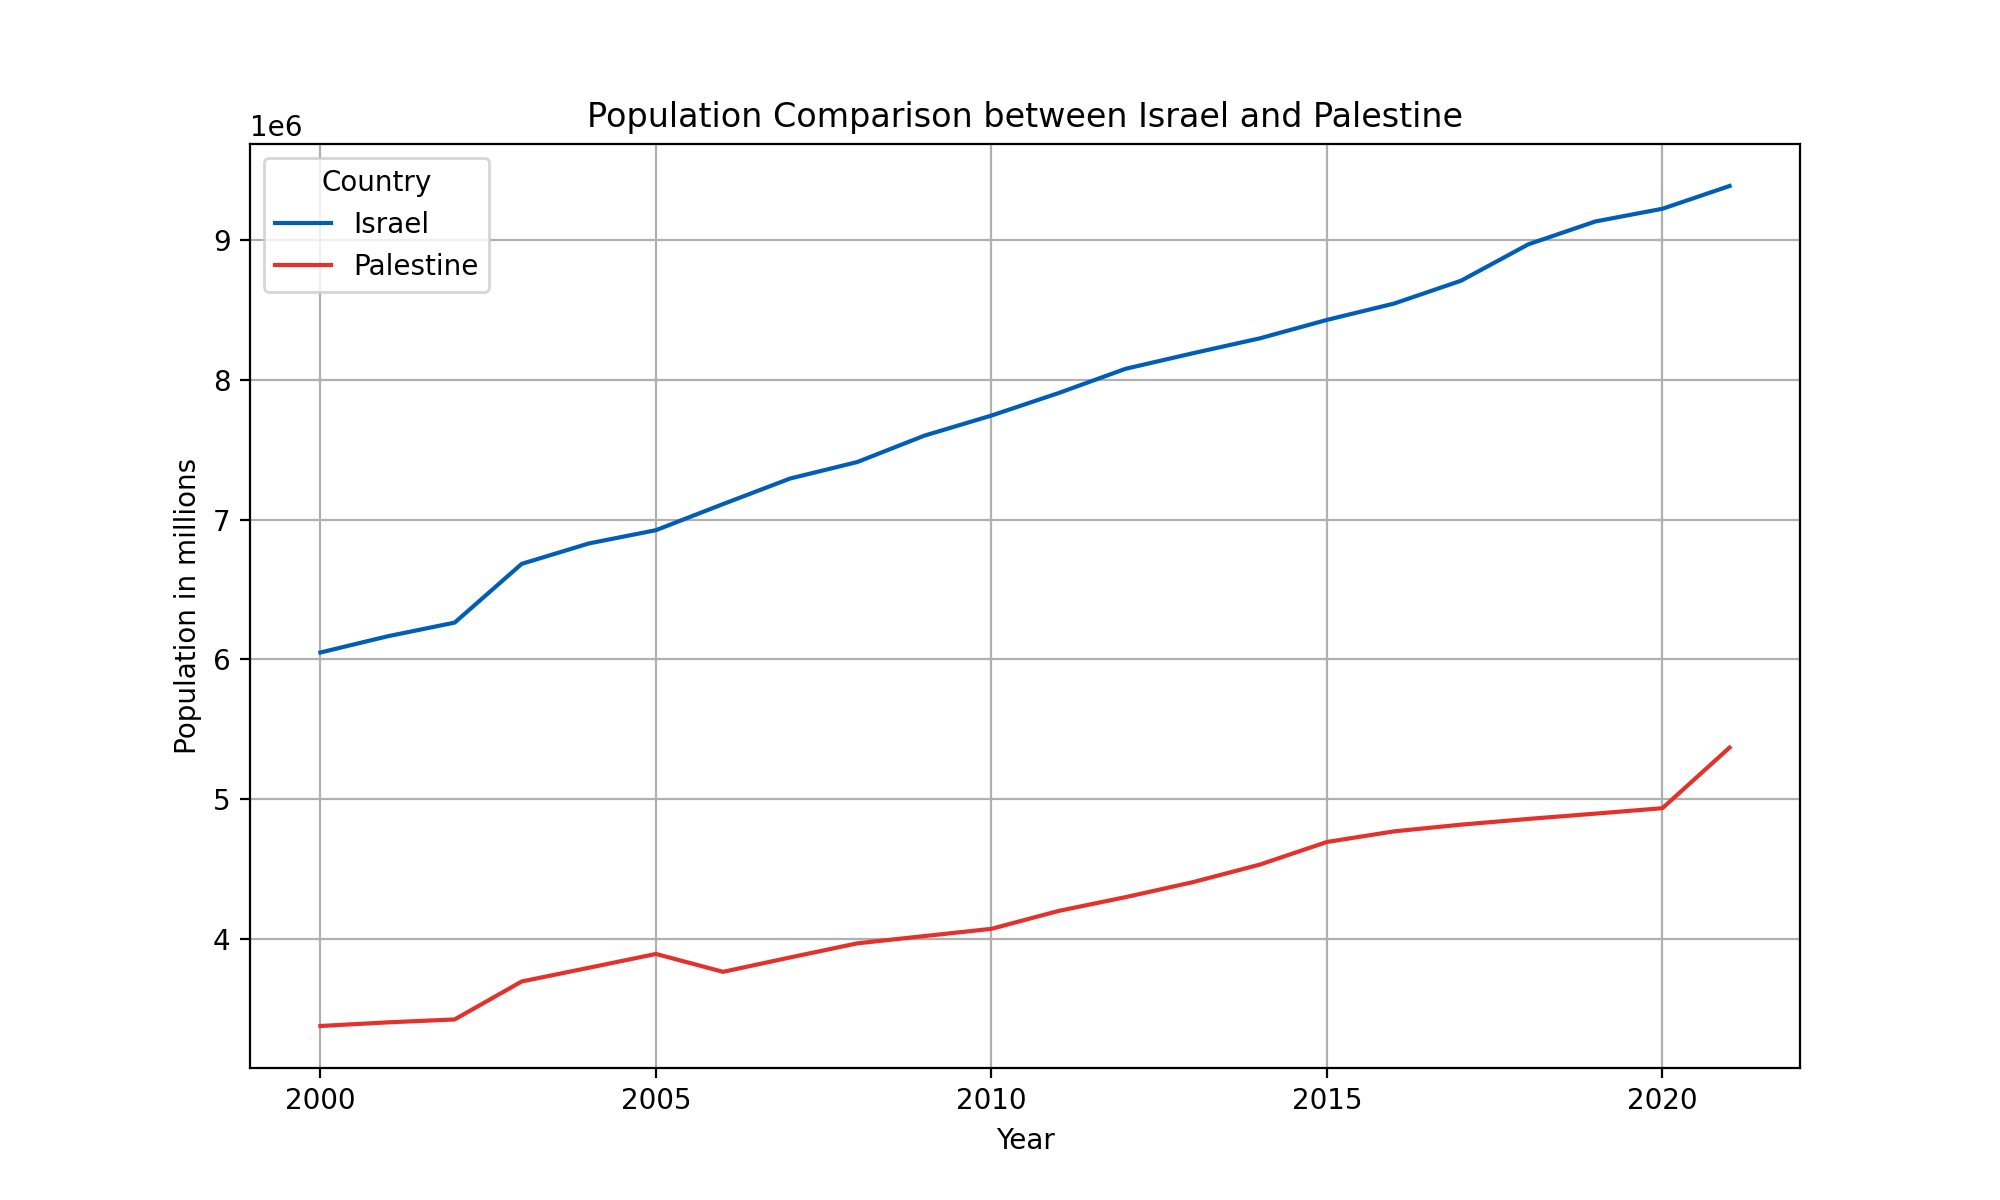

In [94]:
colors = ['#005EB8', '#E4312b']

# Filter the DataFrame to include only 'Israel' and 'Palestine' for the 'Population' data
population_data = df[df['Country'].isin(['Israel', 'Palestine'])][['Year', 'Country', 'Population']]

# Use pivot to reshape the DataFrame
population_pivot = population_data.pivot(index='Year', columns='Country', values='Population')

# Plot a bar chart for population
ax = population_pivot.plot(kind='line', figsize=(10, 6), color= colors)
ax.grid(True)

plt.title('Population Comparison between Israel and Palestine')
plt.xlabel('Year')
plt.ylabel('Population in millions')
plt.show()

<IPython.core.display.Javascript object>


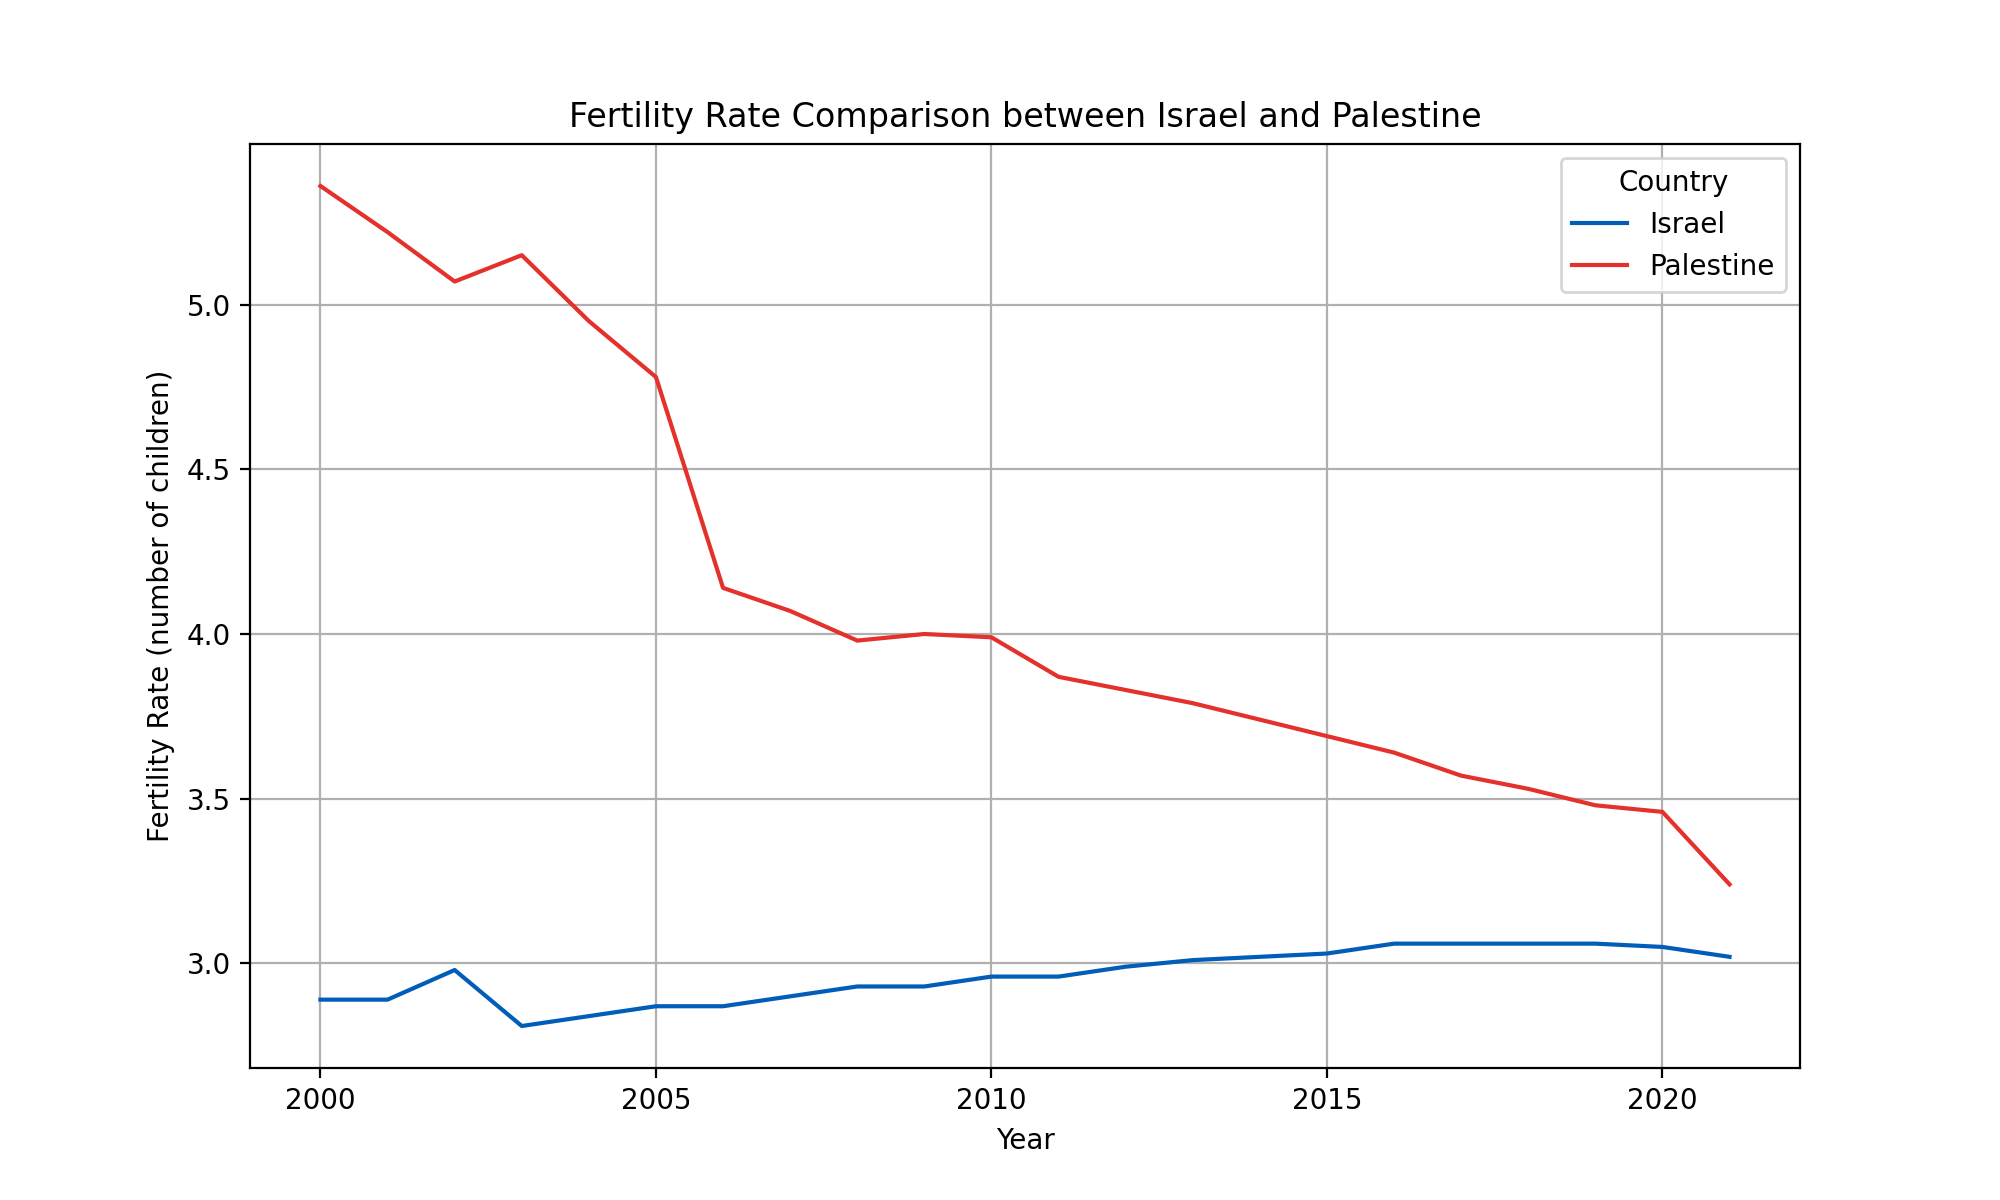

In [121]:
# Filter the DataFrame to include only 'Israel' and 'Palestine' for the 'Fertility Rate' data
fertility_rate_data = df[df['Country'].isin(['Israel', 'Palestine'])][['Year', 'Country', 'Fertility Rate']]

# Use pivot to reshape the DataFrame
fertility_rate_pivot = fertility_rate_data.pivot(index='Year', columns='Country', values='Fertility Rate')

# Plot a bar chart for Fertility Rate
ax = fertility_rate_pivot.plot(kind='line', figsize=(10, 6), color= colors)
ax.grid(True)

plt.title('Fertility Rate Comparison between Israel and Palestine')
plt.xlabel('Year')
plt.ylabel('Fertility Rate (number of children)')
plt.show()

<IPython.core.display.Javascript object>


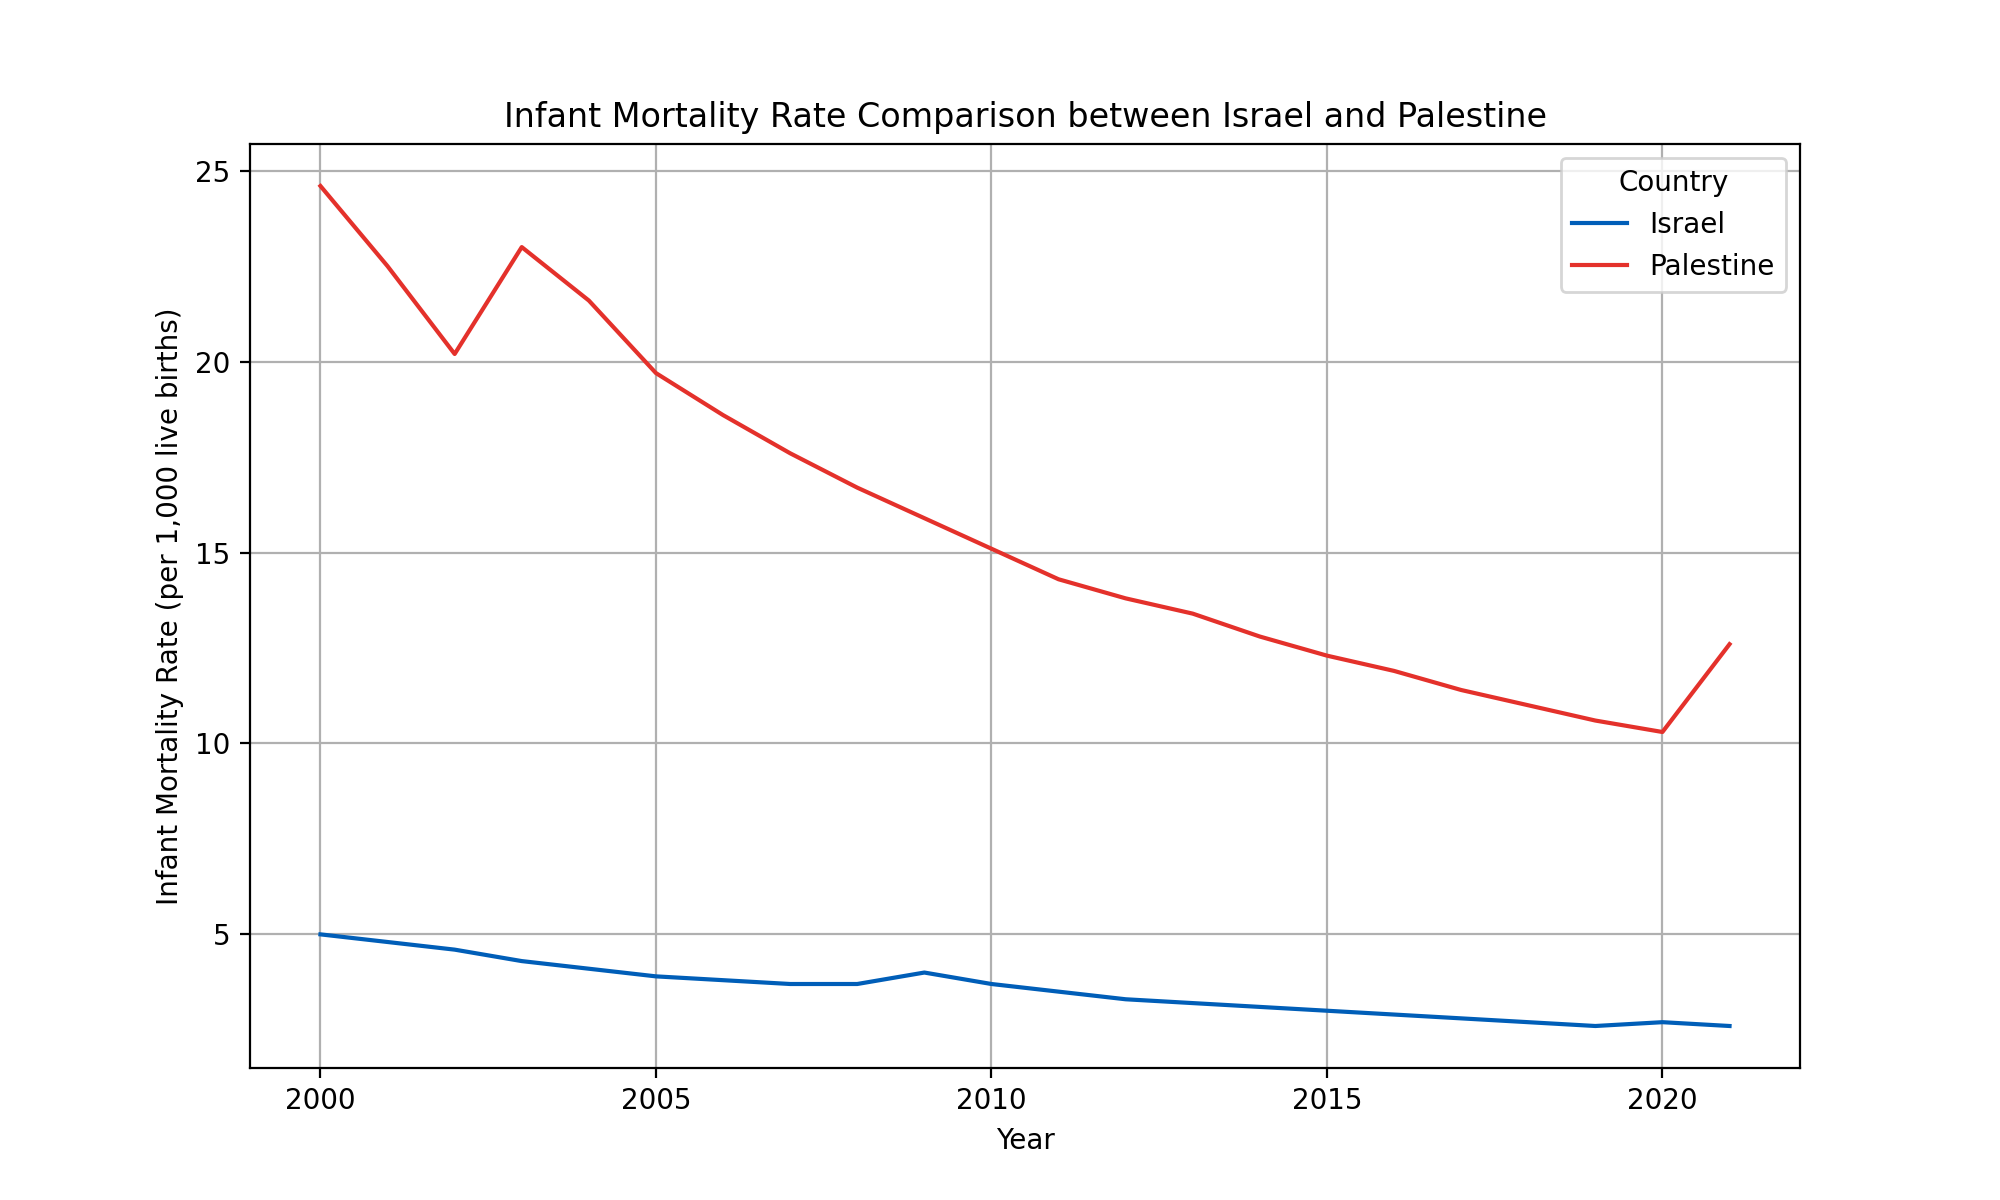

In [62]:
# Filter the DataFrame to include only 'Israel' and 'Palestine' for Infant Mortality Rate
infant_mortality_data = df[df['Country'].isin(['Israel', 'Palestine'])][['Year', 'Country', 'Infant Mortality Rate (per 1,000 live births)']]

# Use pivot to reshape the DataFrame
infant_mortality_pivot = infant_mortality_data.pivot(index='Year', columns='Country', values='Infant Mortality Rate (per 1,000 live births)')

# Plot a bar chart for Infant Mortality Rate
ax = infant_mortality_pivot.plot(kind='line', figsize=(10, 6), color=colors)
ax.grid(True)

plt.title('Infant Mortality Rate Comparison between Israel and Palestine')
plt.xlabel('Year')
plt.ylabel('Infant Mortality Rate (per 1,000 live births)')
plt.show()

<IPython.core.display.Javascript object>


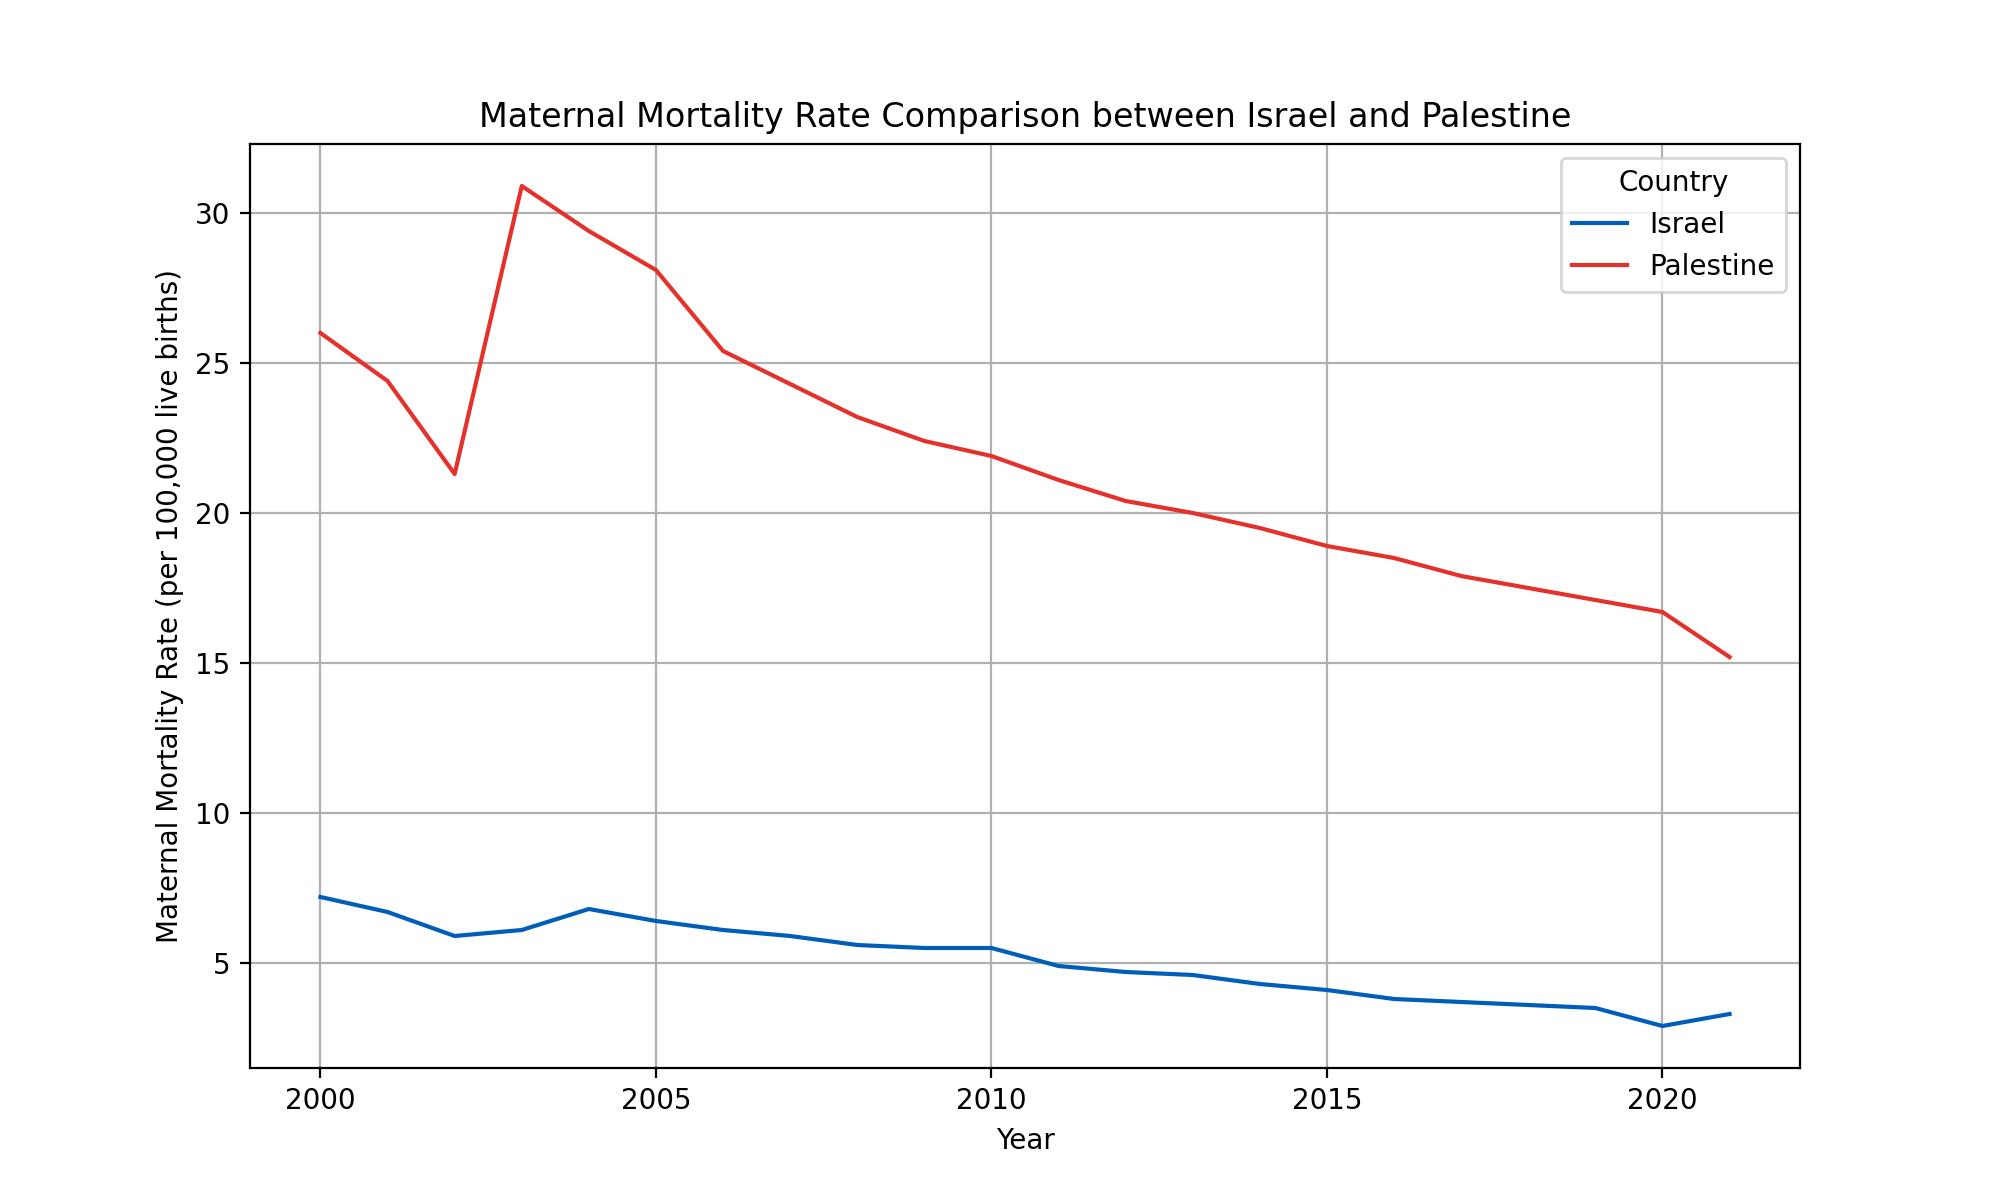

In [64]:
# Filter the DataFrame to include only 'Israel' and 'Palestine' for Maternal Mortality Rate
maternal_mortality_data = df[df['Country'].isin(['Israel', 'Palestine'])][['Year', 'Country', 'Maternal Mortality Rate (per 100,000 live births)']]

# Use pivot to reshape the DataFrame
maternal_mortality_pivot = maternal_mortality_data.pivot(index='Year', columns='Country', values='Maternal Mortality Rate (per 100,000 live births)')

# Plot a bar chart for Maternal Mortality Rate
ax = maternal_mortality_pivot.plot(kind='line', figsize=(10, 6), color=['#005EB8', '#E4312b'])
ax.grid(True)

plt.title('Maternal Mortality Rate Comparison between Israel and Palestine')
plt.xlabel('Year')
plt.ylabel('Maternal Mortality Rate (per 100,000 live births)')
plt.show()

<IPython.core.display.Javascript object>


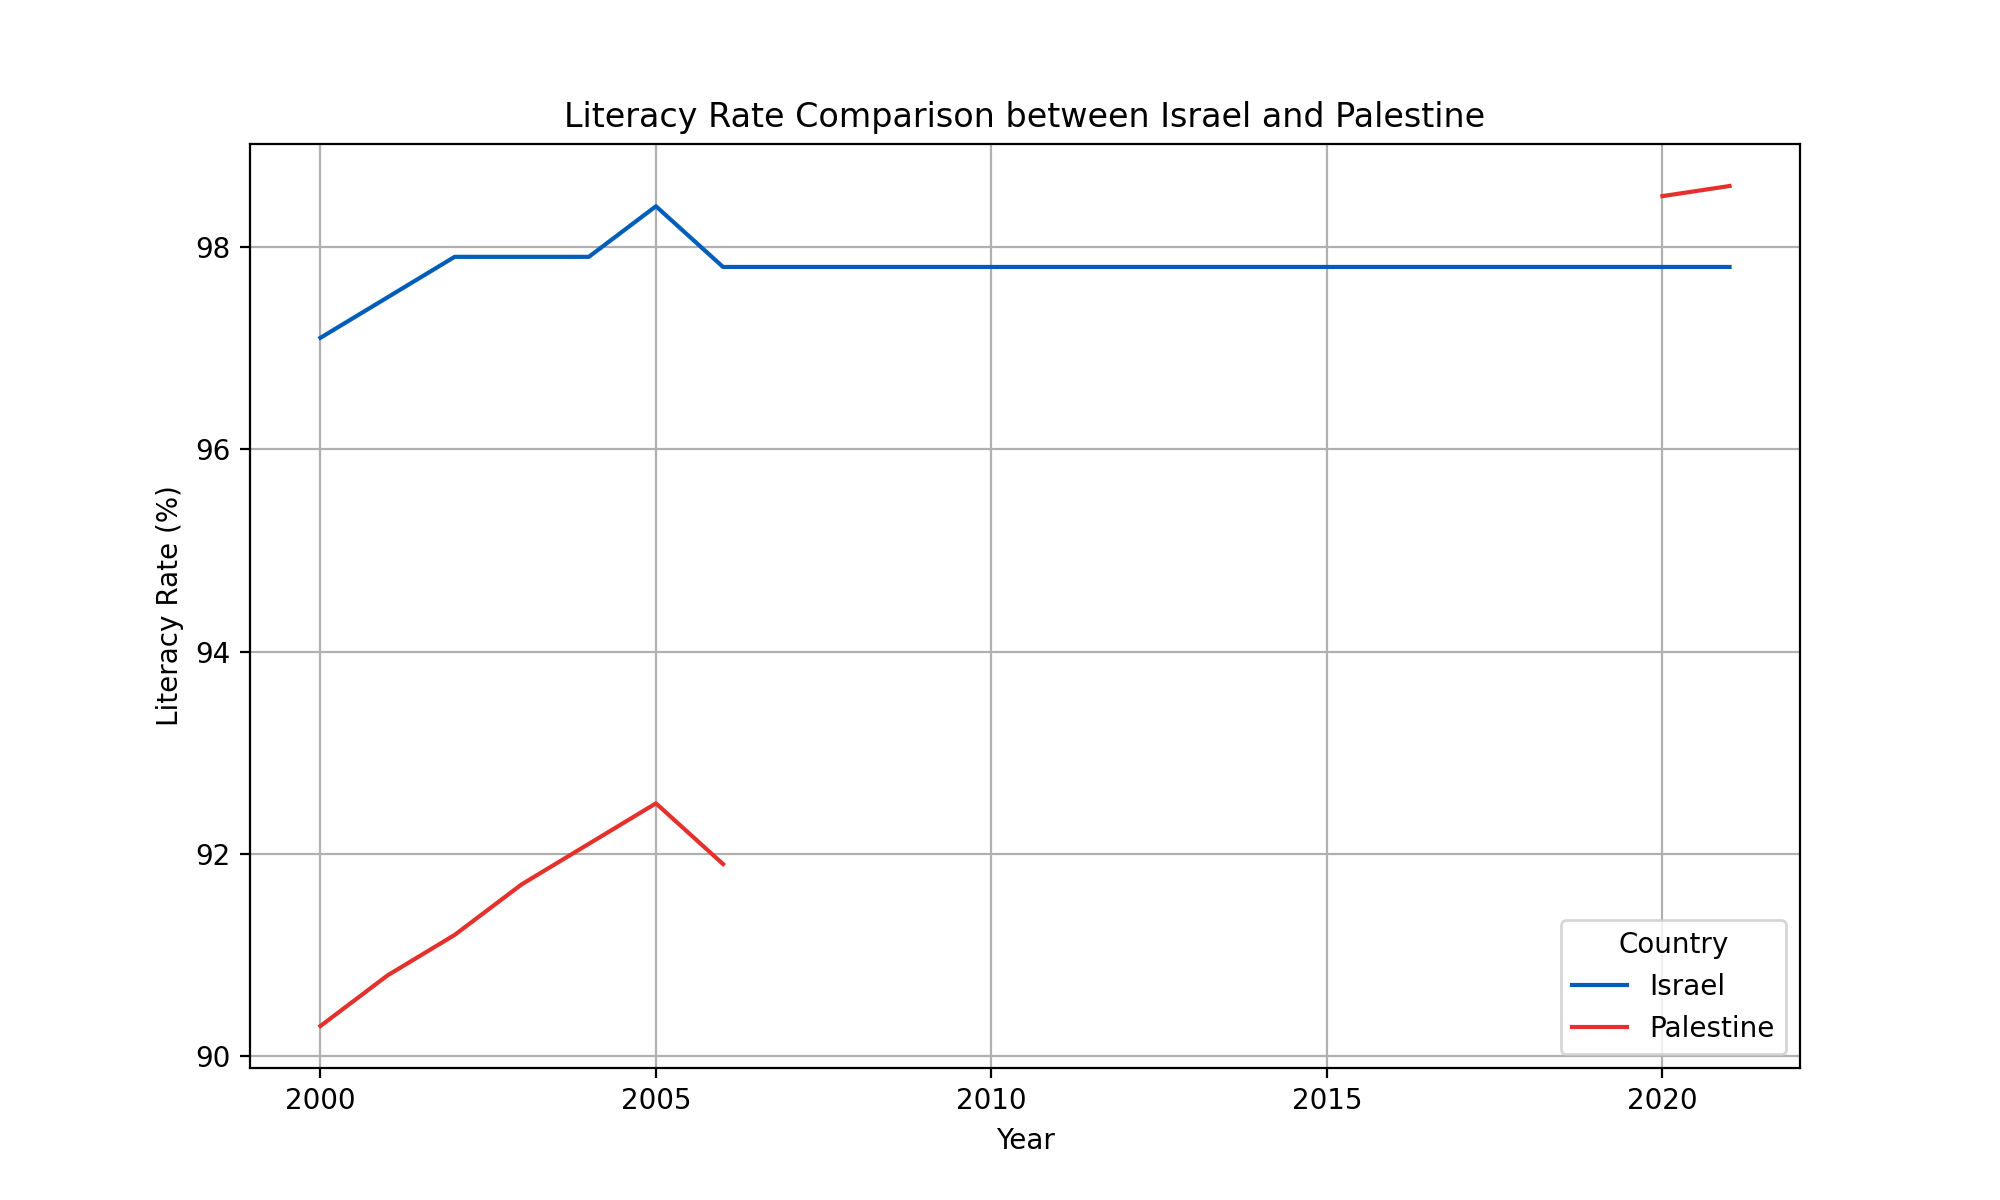

In [104]:
# Create a new DataFrame with years as rows and 'Country' and 'Literacy Rate (%)' as columns
literacy_rate_data = df[df['Country'].isin(['Israel', 'Palestine'])][['Year', 'Country', 'Literacy Rate (%)']]

# Use pivot to reshape the DataFrame
literacy_rate_data_pivot = literacy_rate_data.pivot(index='Year', columns='Country', values='Literacy Rate (%)')

# Plot a line chart
ax = literacy_rate_data_pivot.plot(kind='line', figsize=(10, 6), color=colors)

# Add grid lines for better readability
ax.grid(True)

plt.title('Literacy Rate Comparison between Israel and Palestine')
plt.xlabel('Year')
plt.ylabel('Literacy Rate (%)')
plt.show()

<IPython.core.display.Javascript object>


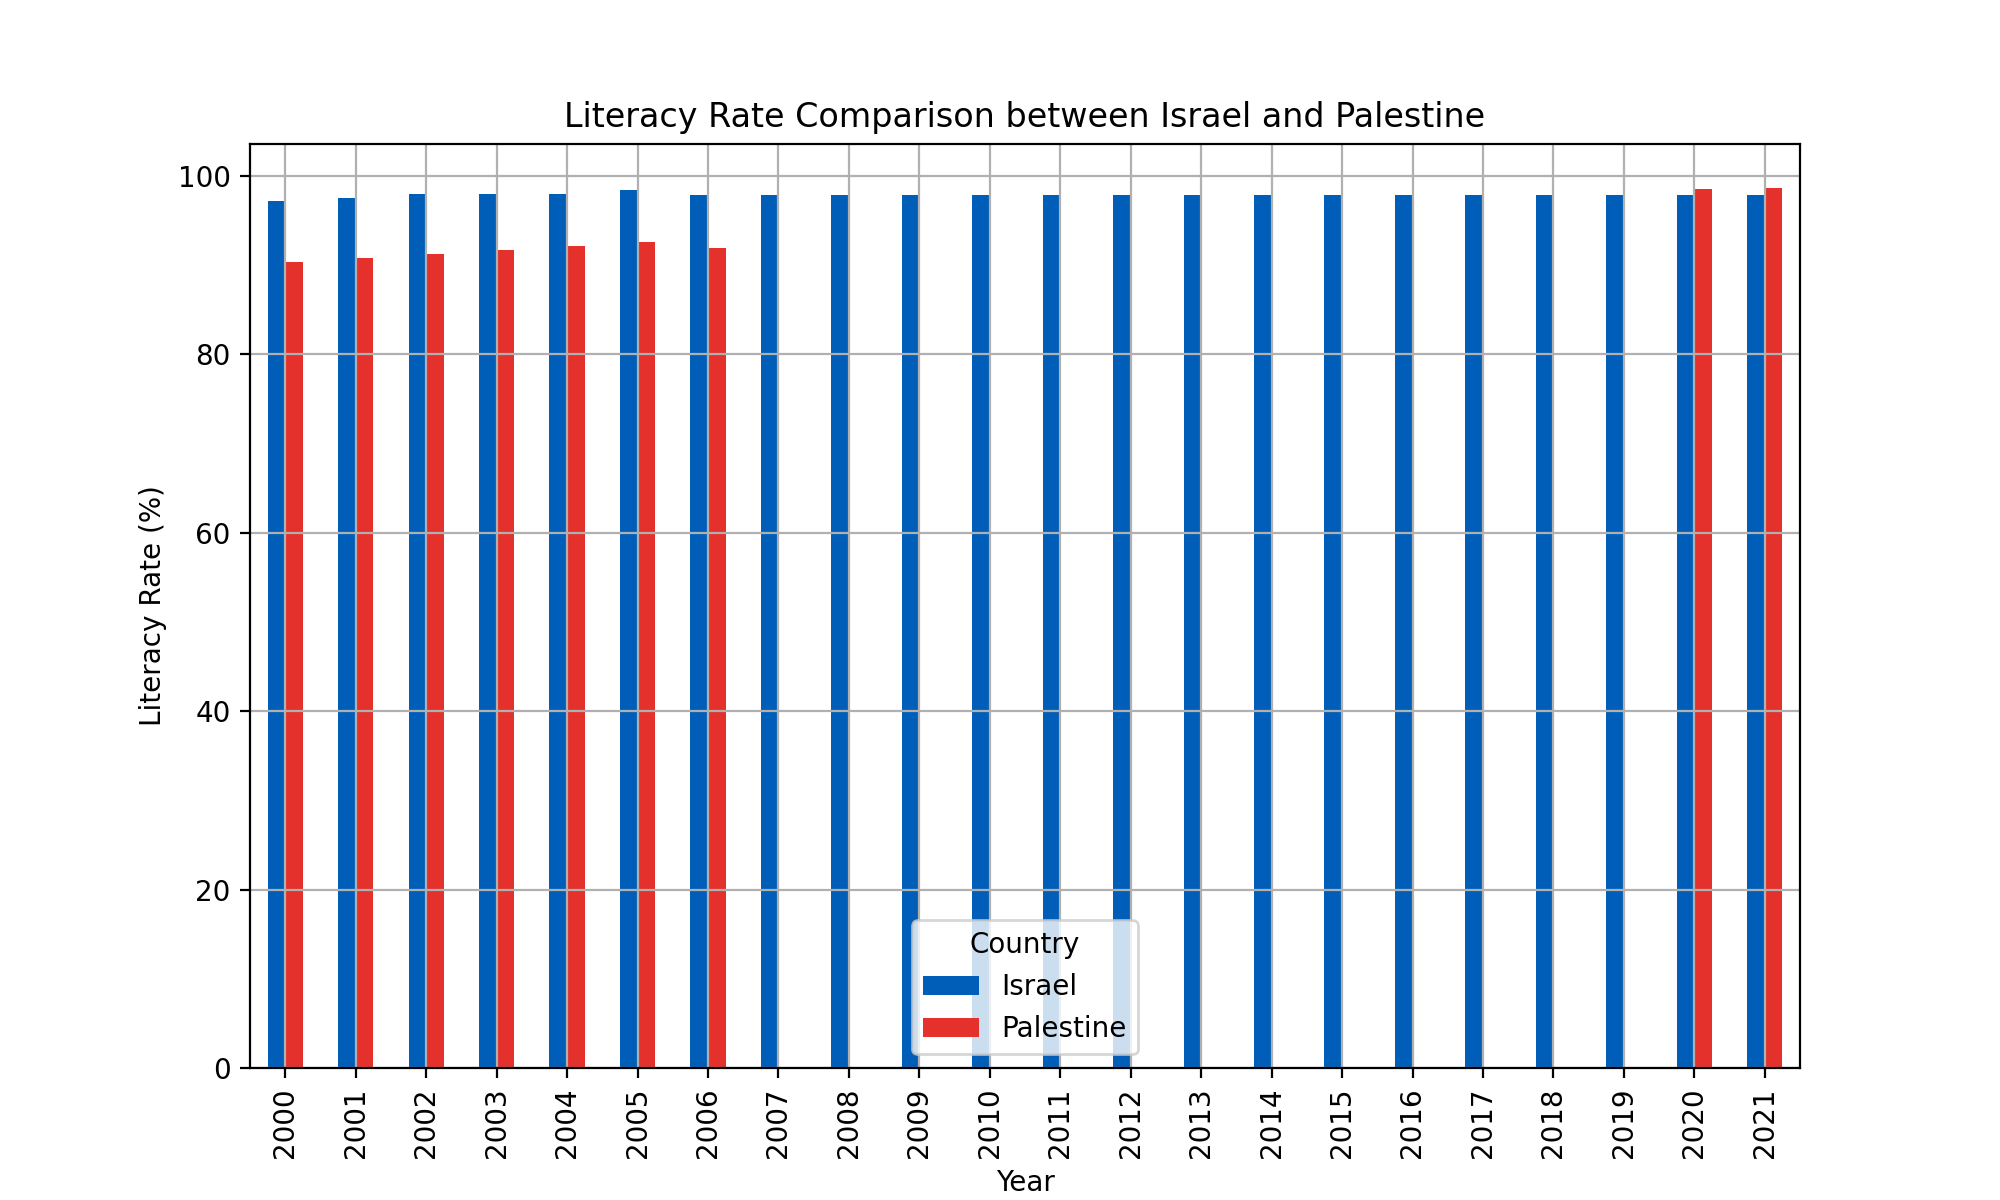

In [105]:
# Plot a bar chart
ax = literacy_rate_data_pivot.plot(kind='bar', figsize=(10, 6), color=colors)

# Add grid lines for better readability
ax.grid(True)

plt.title('Literacy Rate Comparison between Israel and Palestine')
plt.xlabel('Year')
plt.ylabel('Literacy Rate (%)')
plt.show()

# 2. How do the economies of the two countries compare? Is it a real competitor?

1. GDP:
- The GDP of Palestine was 4.56 billion in 2000 and 15.05 billion in 2021. 230% increase in 21 years. 3.3 times as big 21 years later. However the rise in GDP in Palestine was only between 2020 and 2021 from 6.20 billion to 15.05 billion, an increase 8.85 billion (142%). Most of the 21 years there was only a small increase (figure 11).
- The GDP of Israel was 132.02 billion in 2000 and 398.02 billion in 2021. 201% increase in 21 years. 3.01 times as big 21 years later. The GDP has steadily increased over the last 21 years (figure 12).
- While the increase of the last year was higher % wise in Palestine, the actual increase in Israel was 22.2 billion (398.02 - 375.82). More than the entire GDP of Palestine. By 2021 Israel's GDP is 26 times bigger than that of Palestine.

2. GDP Growth Rate:
- The GDP Growth Rate of Palestine is more volutile than that of Israel. Palestinian drops went as low as -50 and -46.3, and as high as 10.5 (figure 7).
- The GDP growth of Israel has been fairly positive with the lowest low during the Covid-19 pandemic. 

3. Agricultural output:
- Palestine's output steadily increased from 880 million 2000 and 1.37 billion in 2020. During the pandemic the output decreased to 352 million. The lowest point in 21 years after a decrease of 1 billion. 
- Israel's output almost steadily increased from 5.71 billion in 2000 to 6.21 billion in 2020. It was subjected to decrease between 2000 and 2002 but grew until 2020. During the Pandemic the output went to 3.86 billion. A decrease of 2.35 billion. 
- Israel lost more output during the pandemic than the entirety of the output of Palestine, but still their eventual output was more than 10 times than that of Palestine in 2021 and double the output of Palestina in 2020 which was their highest. 

4. IT output:
- The Palestinian output grew from 115 million in 2000 to 1.10 billion in 2021. 9.5 times bigger in 21 years and a 856% increase. However, there is missing data from 2007 to 2019. We dont know if it grew or shrank during that period. 
- The Israelian output grew from 6.78 billion in 2000 to 46.21 billion in 2021. 6.8 times bigger in 21 years and a 581% increase.
- Israel's IT output is 42 times larger than that of Palestine in 2021. Their IT output is more than the entirety of Palestine's GDP, times 3.

<IPython.core.display.Javascript object>


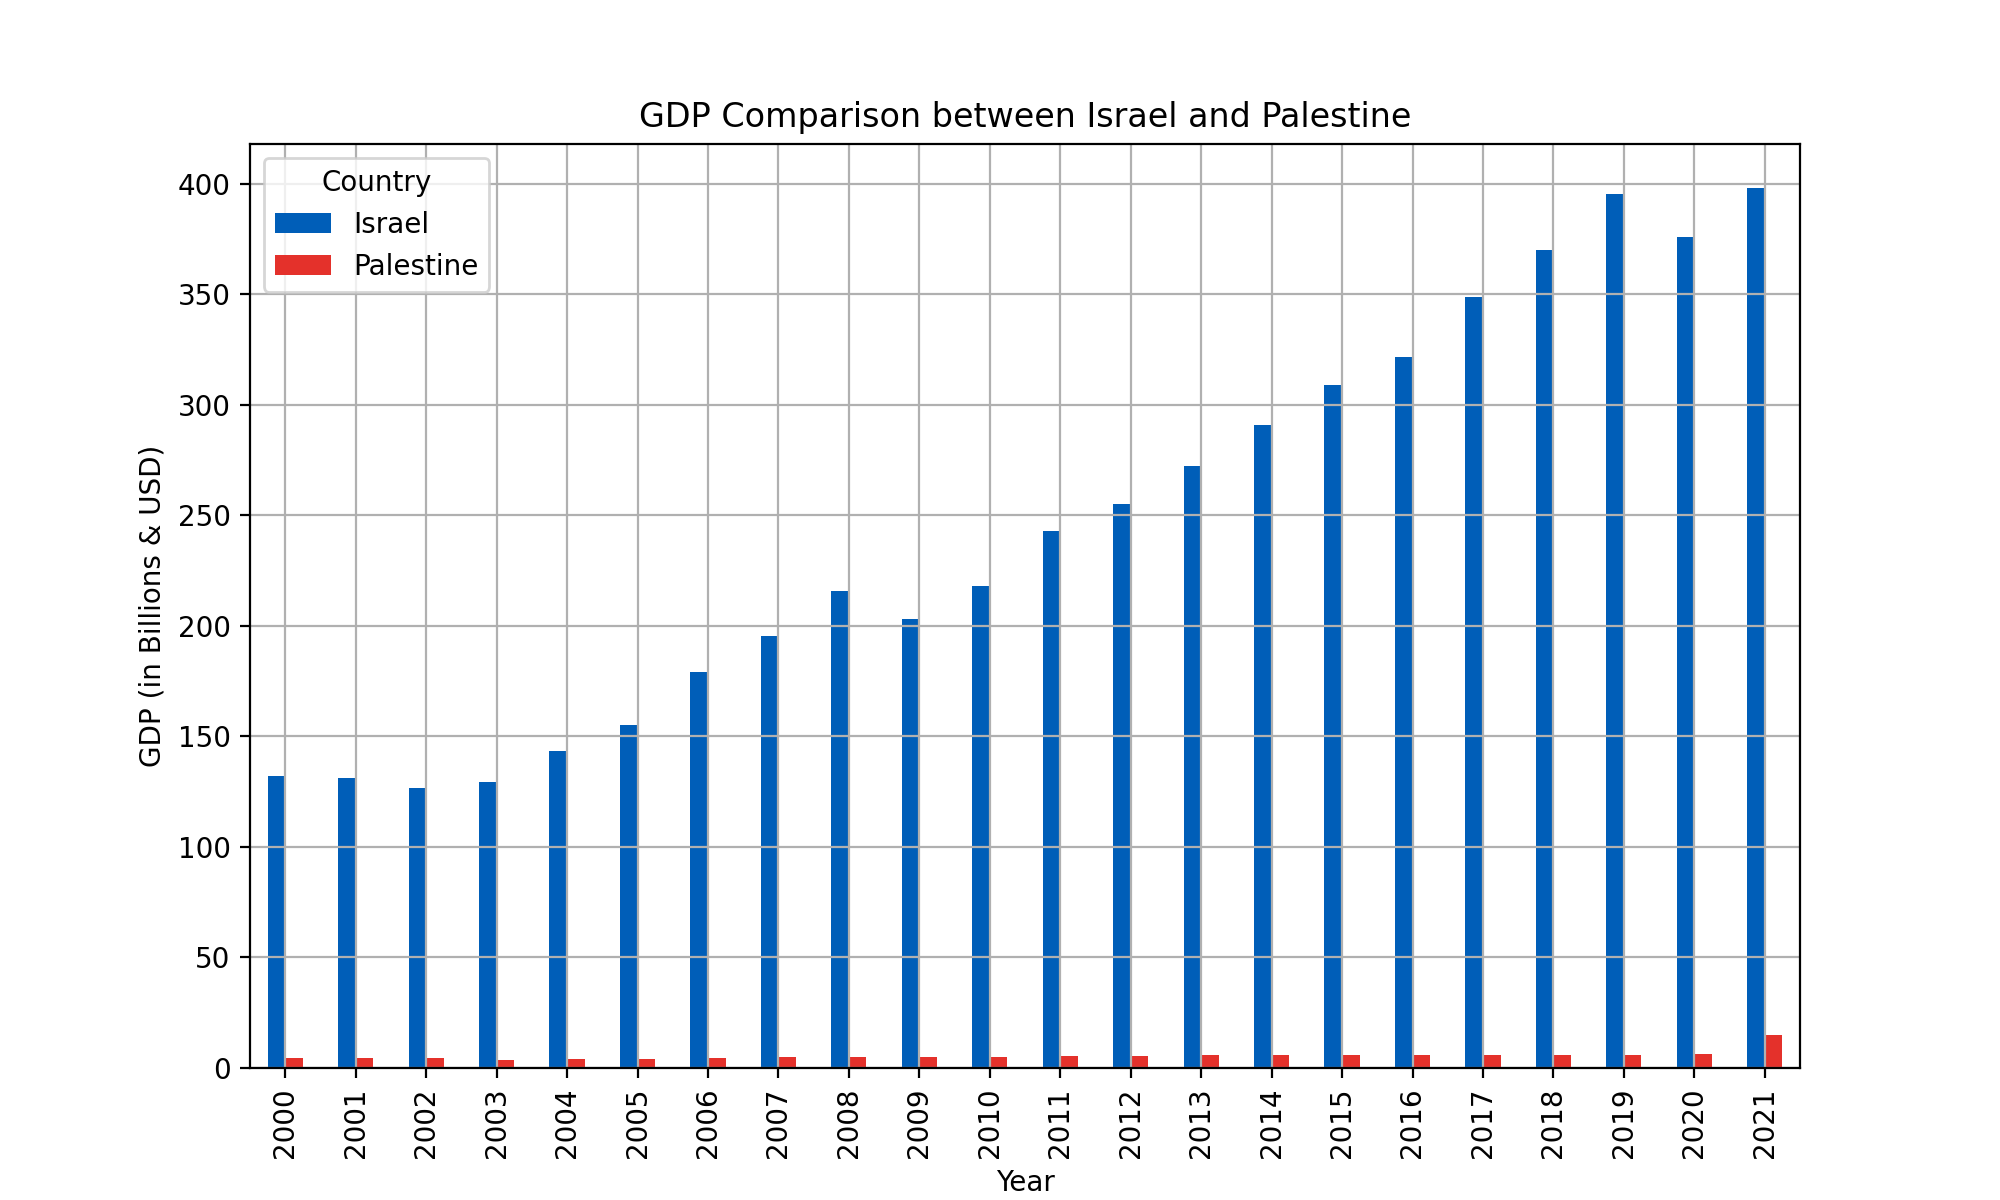

In [49]:
# Create a new DataFrame with years as rows and 'Country' and 'GDP (in USD)' as columns
gdp_data = df[df['Country'].isin(['Israel', 'Palestine'])][['Year', 'Country', 'GDP billion (in USD)']]

# Use pivot to reshape the DataFrame
gdp_pivot = gdp_data.pivot(index='Year', columns='Country', values='GDP billion (in USD)')

# Plot a bar chart
ax = gdp_pivot.plot(kind='bar', figsize=(10, 6), color=['#005EB8', '#E4312b'])
ax.grid(True)

plt.title('GDP Comparison between Israel and Palestine')
plt.xlabel('Year')
plt.ylabel('GDP (in Billions & USD)')
plt.show()

<IPython.core.display.Javascript object>


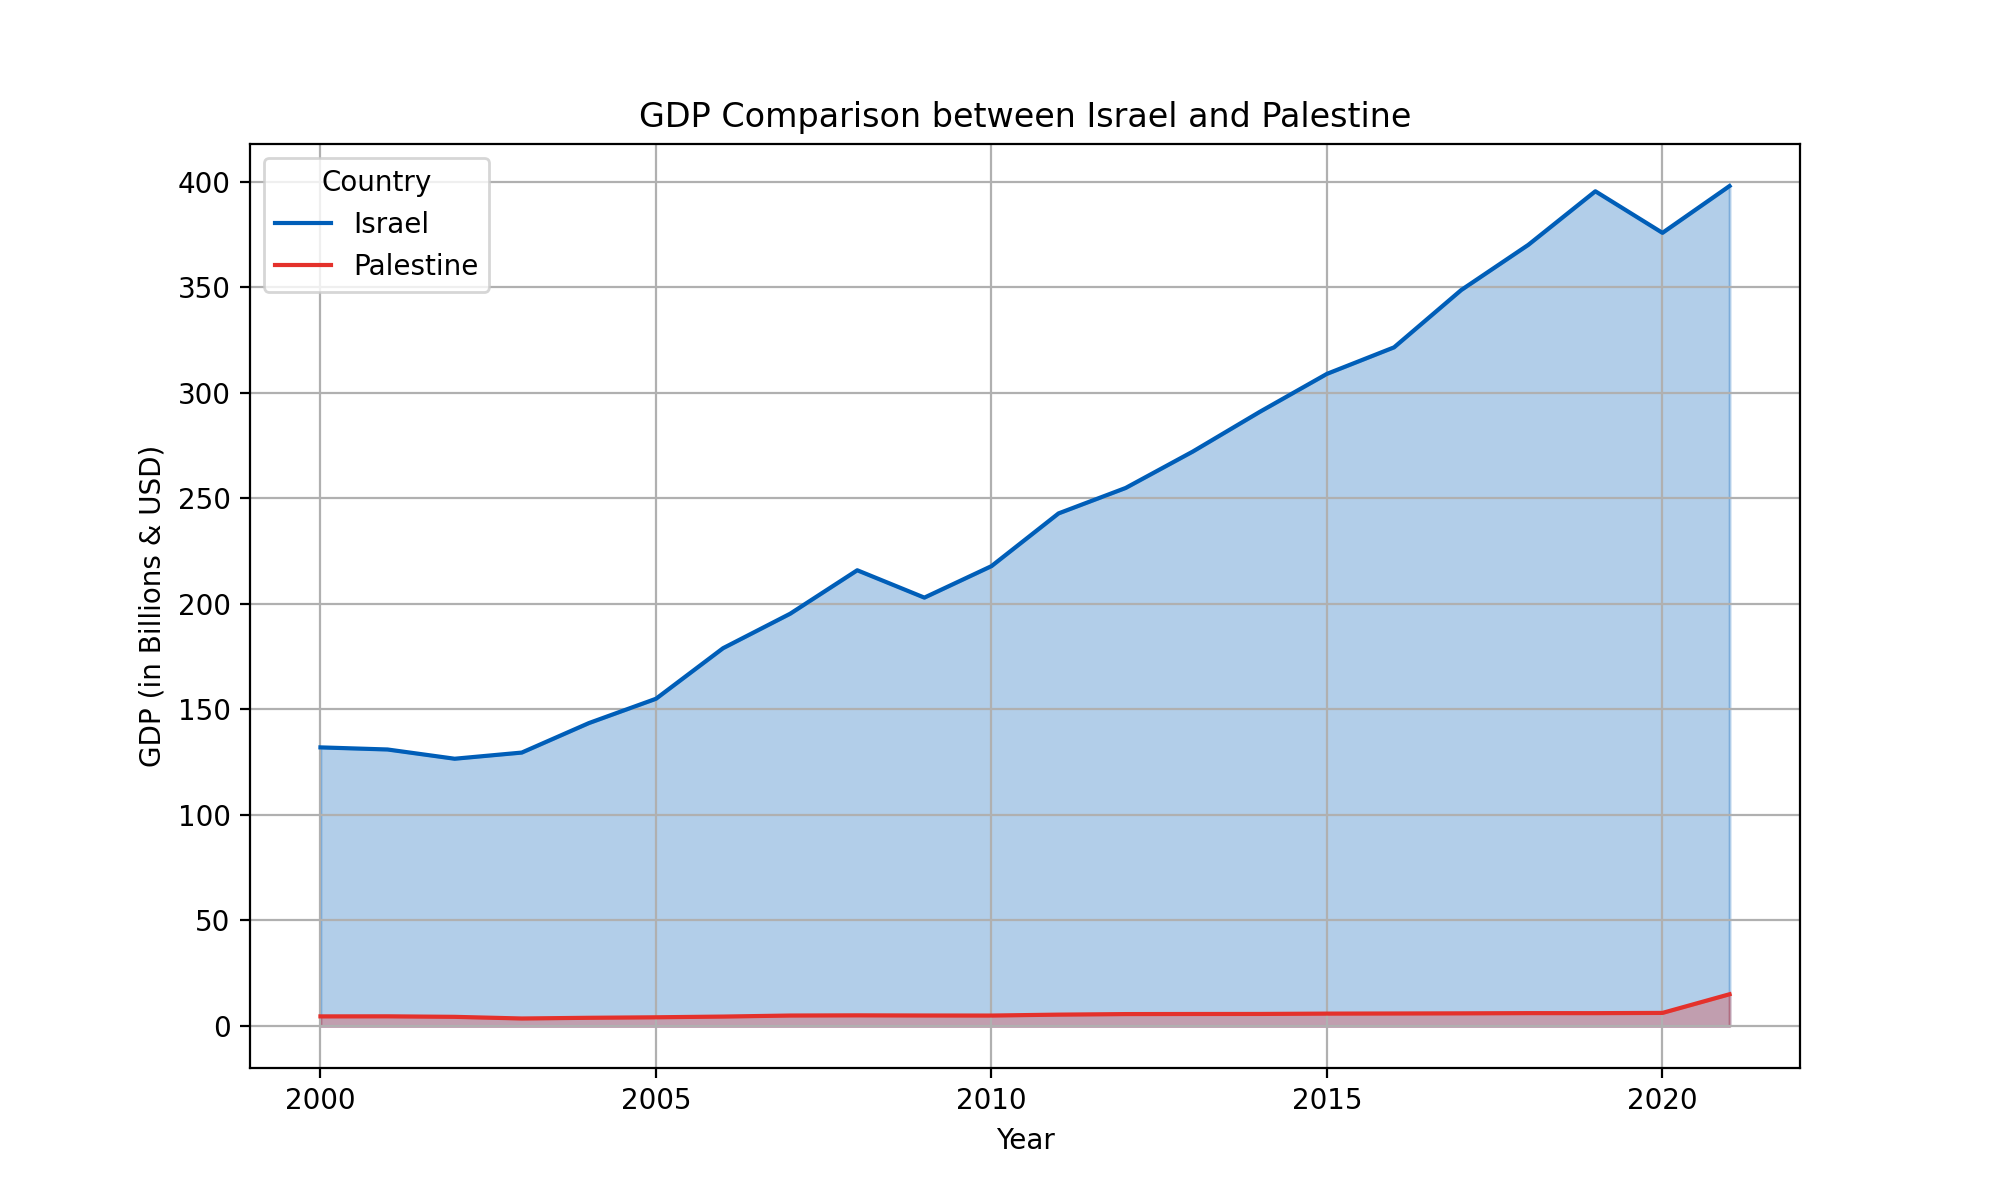

In [36]:
# Plot a line chart
ax = gdp_pivot.plot(kind='line', figsize=(10, 6), color=['#005EB8', '#E4312b'])

# Fill the area under the lines with colors
for i, col in enumerate(gdp_pivot.columns):
    plt.fill_between(gdp_pivot.index, 0, gdp_pivot[col], color=colors[i], alpha=0.3, label=col)
  

# Add grid lines for better readability
ax.grid(True)

plt.title('GDP Comparison between Israel and Palestine')
plt.xlabel('Year')
plt.ylabel('GDP (in Billions & USD)')
plt.show()

<IPython.core.display.Javascript object>


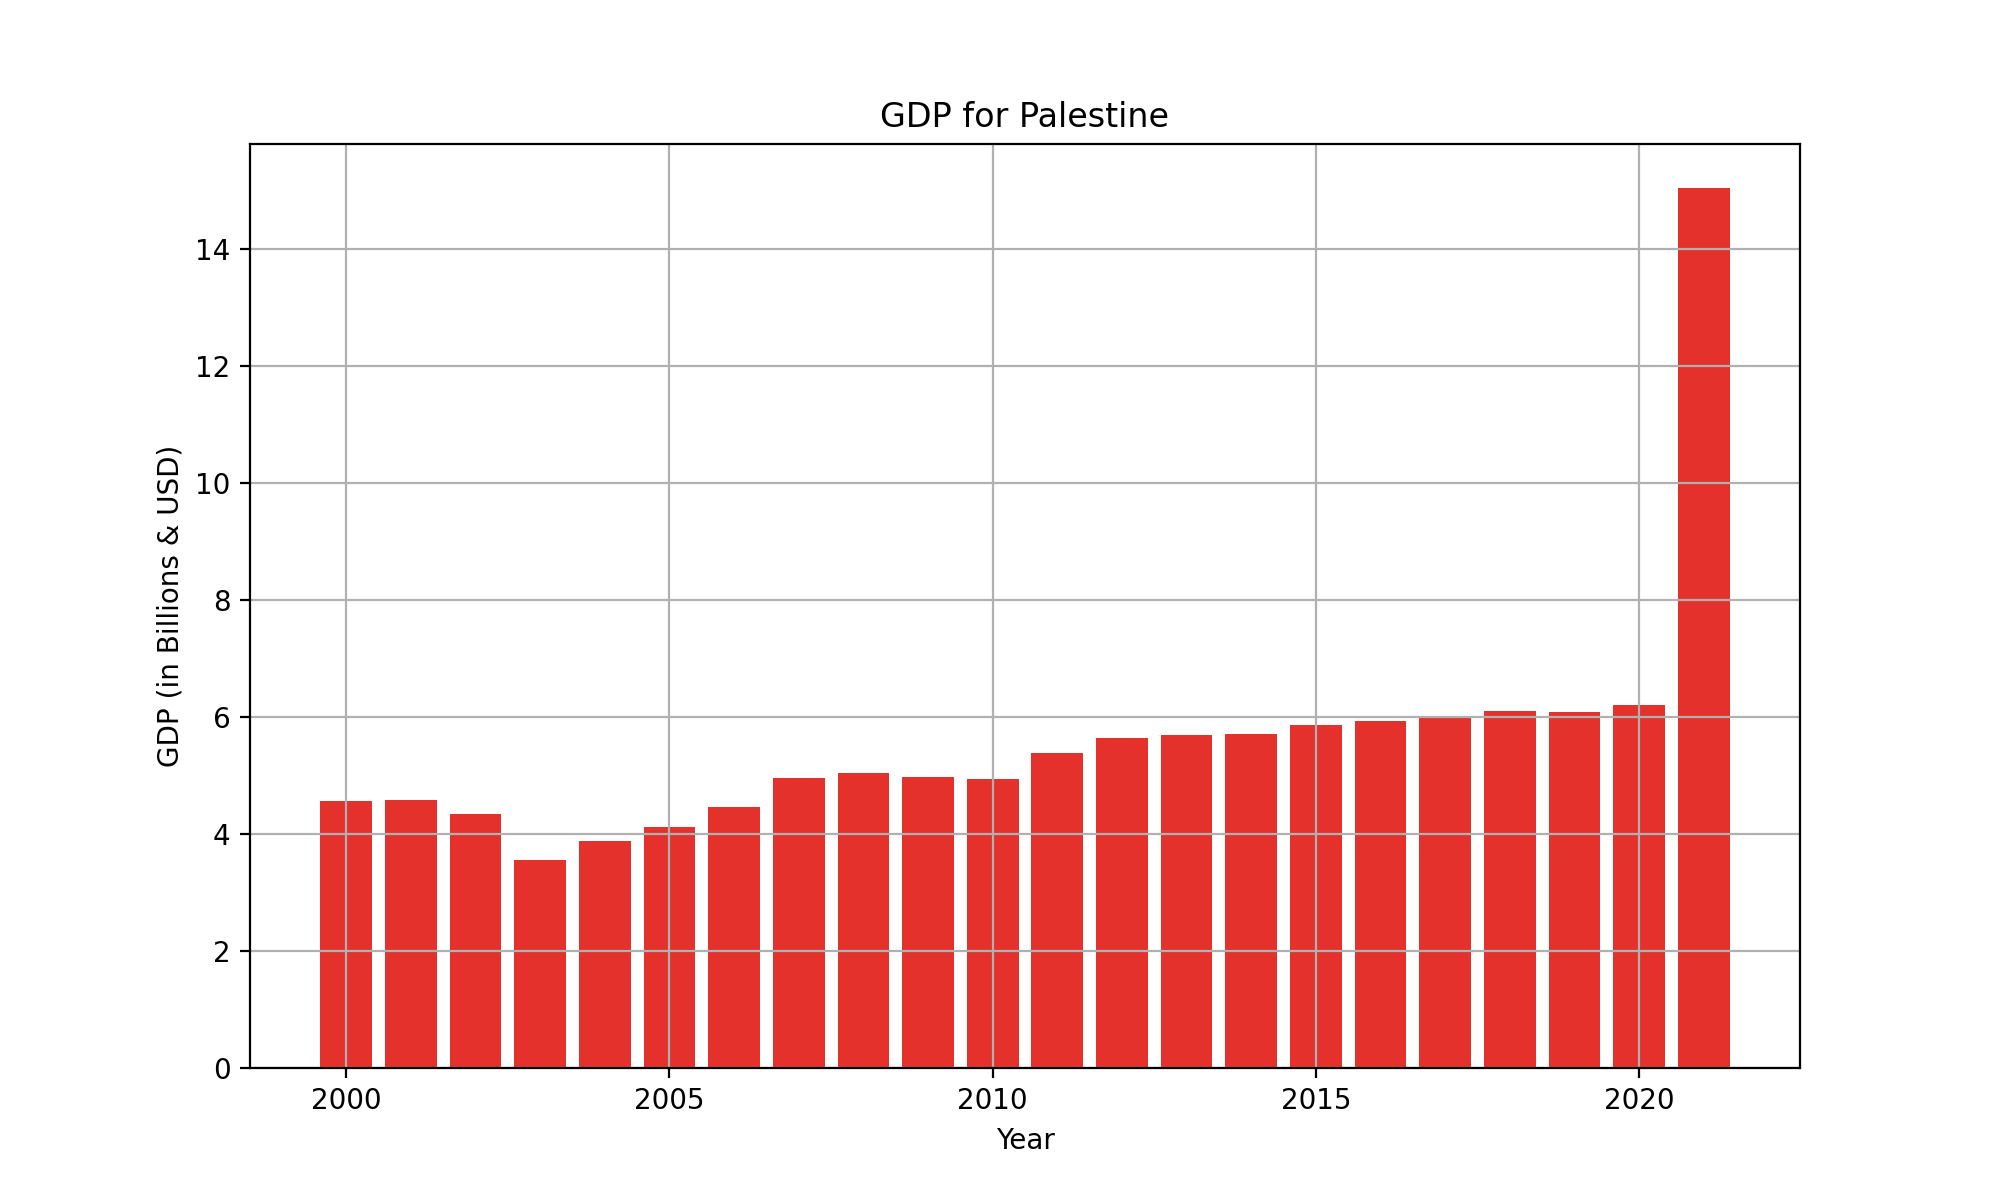

<IPython.core.display.Javascript object>


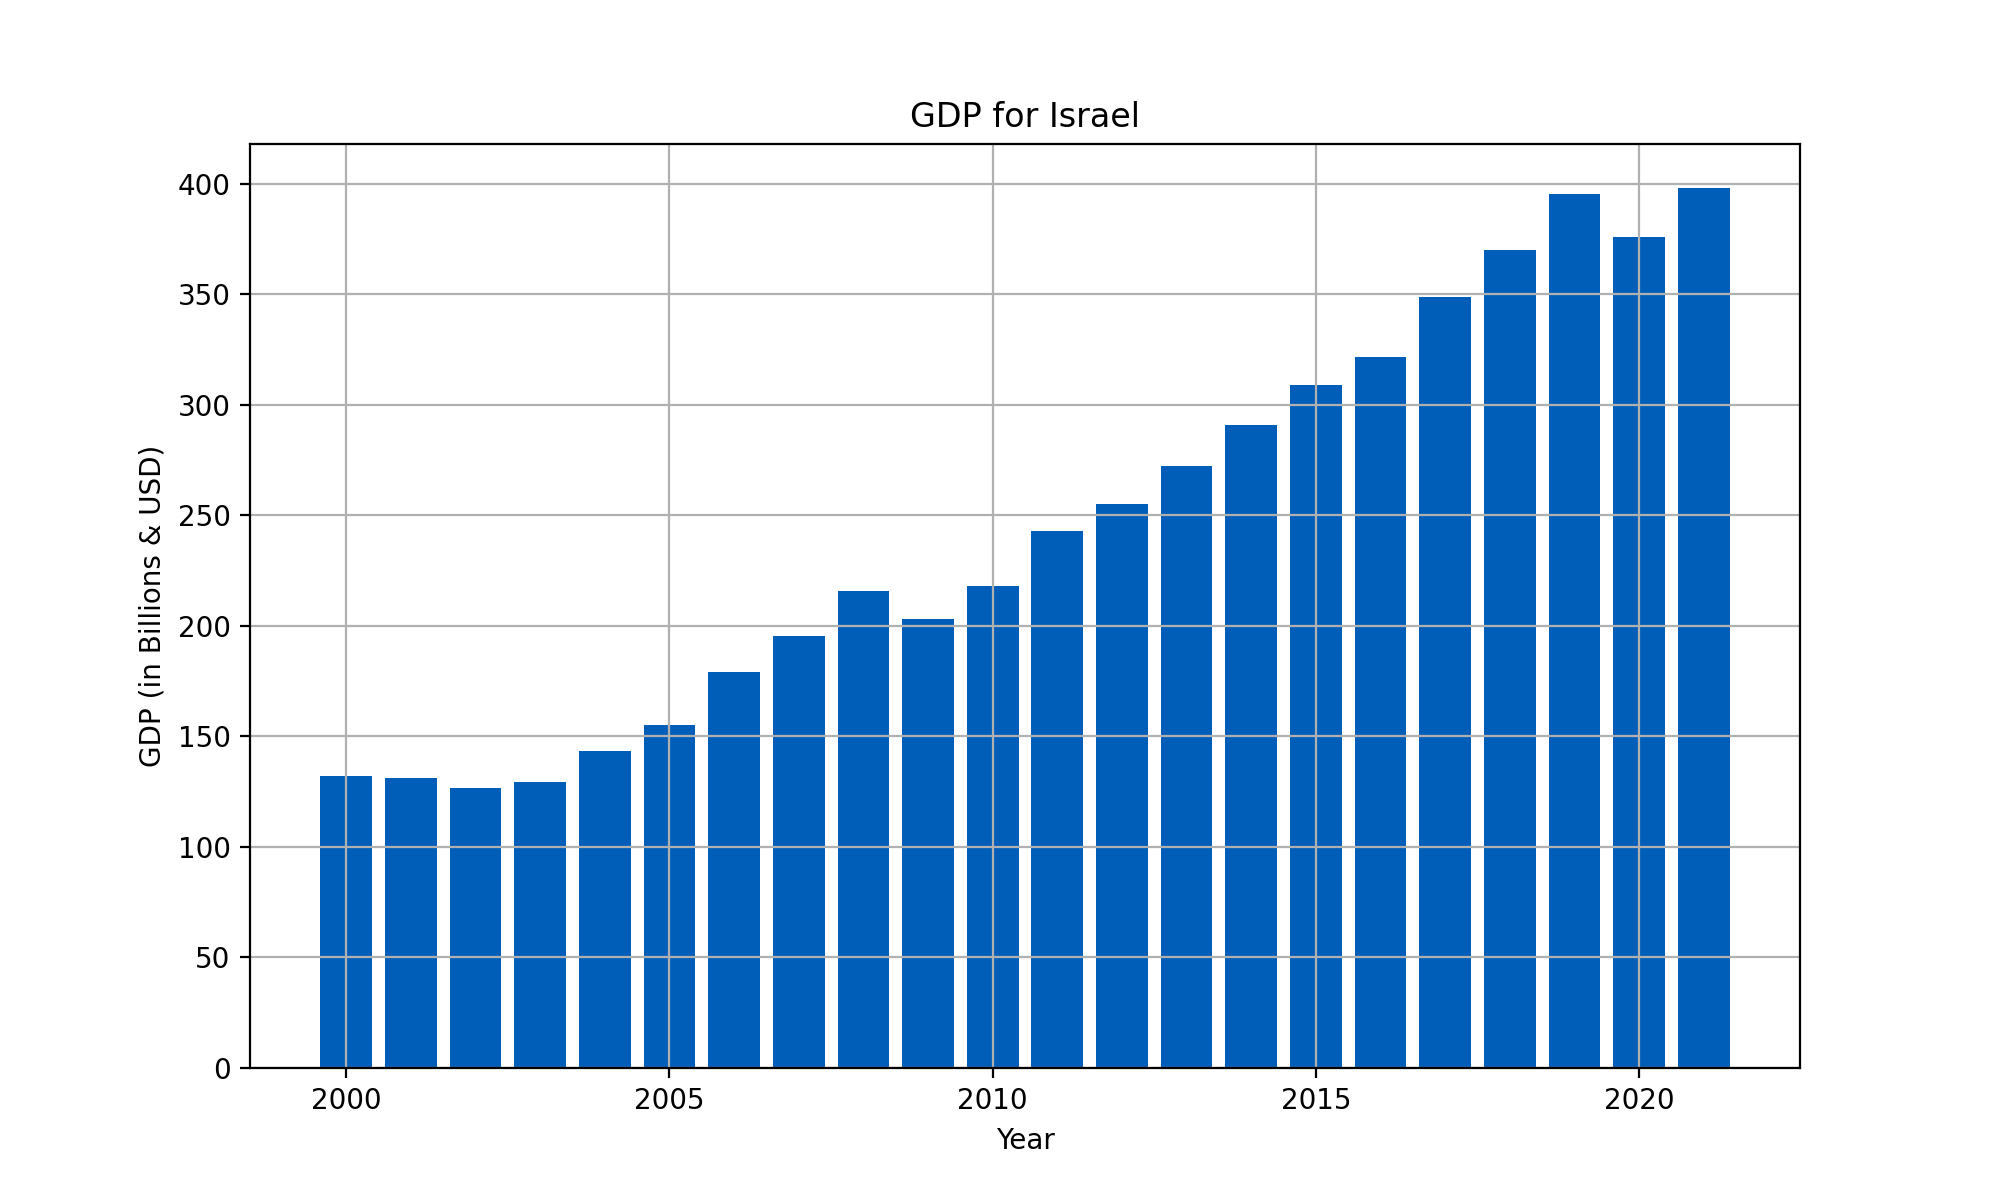

In [54]:
# Filter the DataFrame to include only 'Palestine'
gdp_palestine = df[df['Country'] == 'Palestine']
gdp_israel = df[df['Country'] == 'Israel']

# Create a bar chart for the GDP of Palestine
plt.figure(figsize=(10, 6))
plt.bar(gdp_palestine['Year'], gdp_palestine['GDP billion (in USD)'], color='#E4312b')
plt.grid(True)

plt.title('GDP for Palestine')
plt.xlabel('Year')
plt.ylabel('GDP (in Billions & USD)')
plt.show()

# Create a bar chart for the GDP of Israel
plt.figure(figsize=(10, 6))
plt.bar(gdp_israel['Year'], gdp_israel['GDP billion (in USD)'], color='#005EB8')
plt.grid(True)

plt.title('GDP for Israel')
plt.xlabel('Year')
plt.ylabel('GDP (in Billions & USD)')
plt.show()

In [39]:
print(df.columns)

Index(['Year', 'Country', 'GDP billion (in USD)', 'Population',
       'GDP Growth Rate (%)', 'Fertility Rate',
       'Infant Mortality Rate (per 1,000 live births)',
       'Maternal Mortality Rate (per 100,000 live births)',
       'Agricultural Output billion (in USD)', 'Active Military Personnel',
       'Reserve Military Personnel', 'Literacy Rate (%)',
       'IT Output billion (in USD)', 'Number of Tanks', 'Number of Submarines',
       'Number of Armoured Vehicles'],
      dtype='object')


<IPython.core.display.Javascript object>


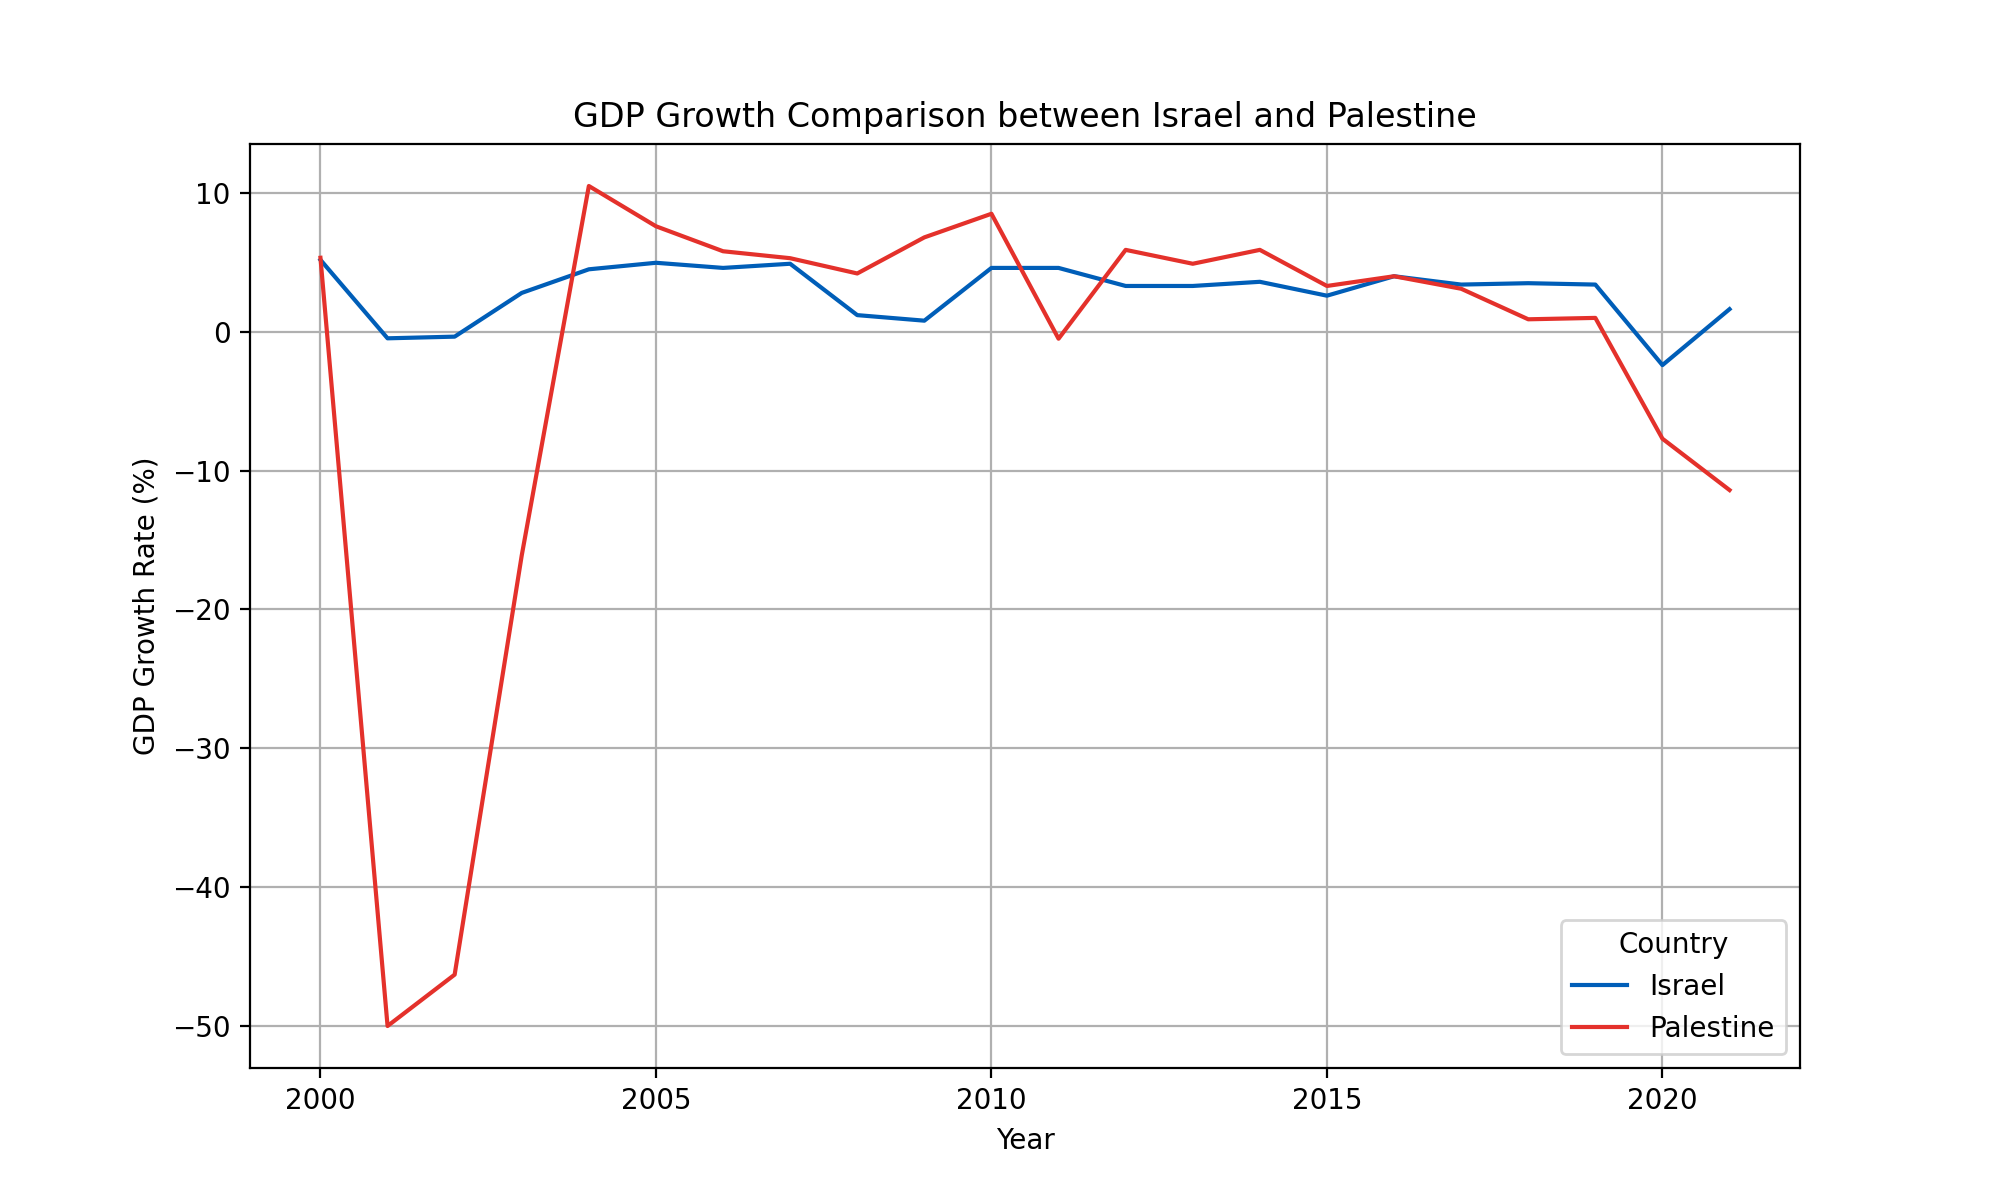

In [42]:
gdp_growth_data = df[df['Country'].isin(['Israel', 'Palestine'])][['Year', 'Country', 'GDP Growth Rate (%)']]

# Use pivot to reshape the DataFrame
gdp_growth_pivot = gdp_growth_data.pivot(index='Year', columns='Country', values='GDP Growth Rate (%)')

ax = gdp_growth_pivot.plot(kind='line', figsize=(10, 6), color=colors)

# Add grid lines for better readability
ax.grid(True)

plt.title('GDP Growth Comparison between Israel and Palestine')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.show()

<IPython.core.display.Javascript object>


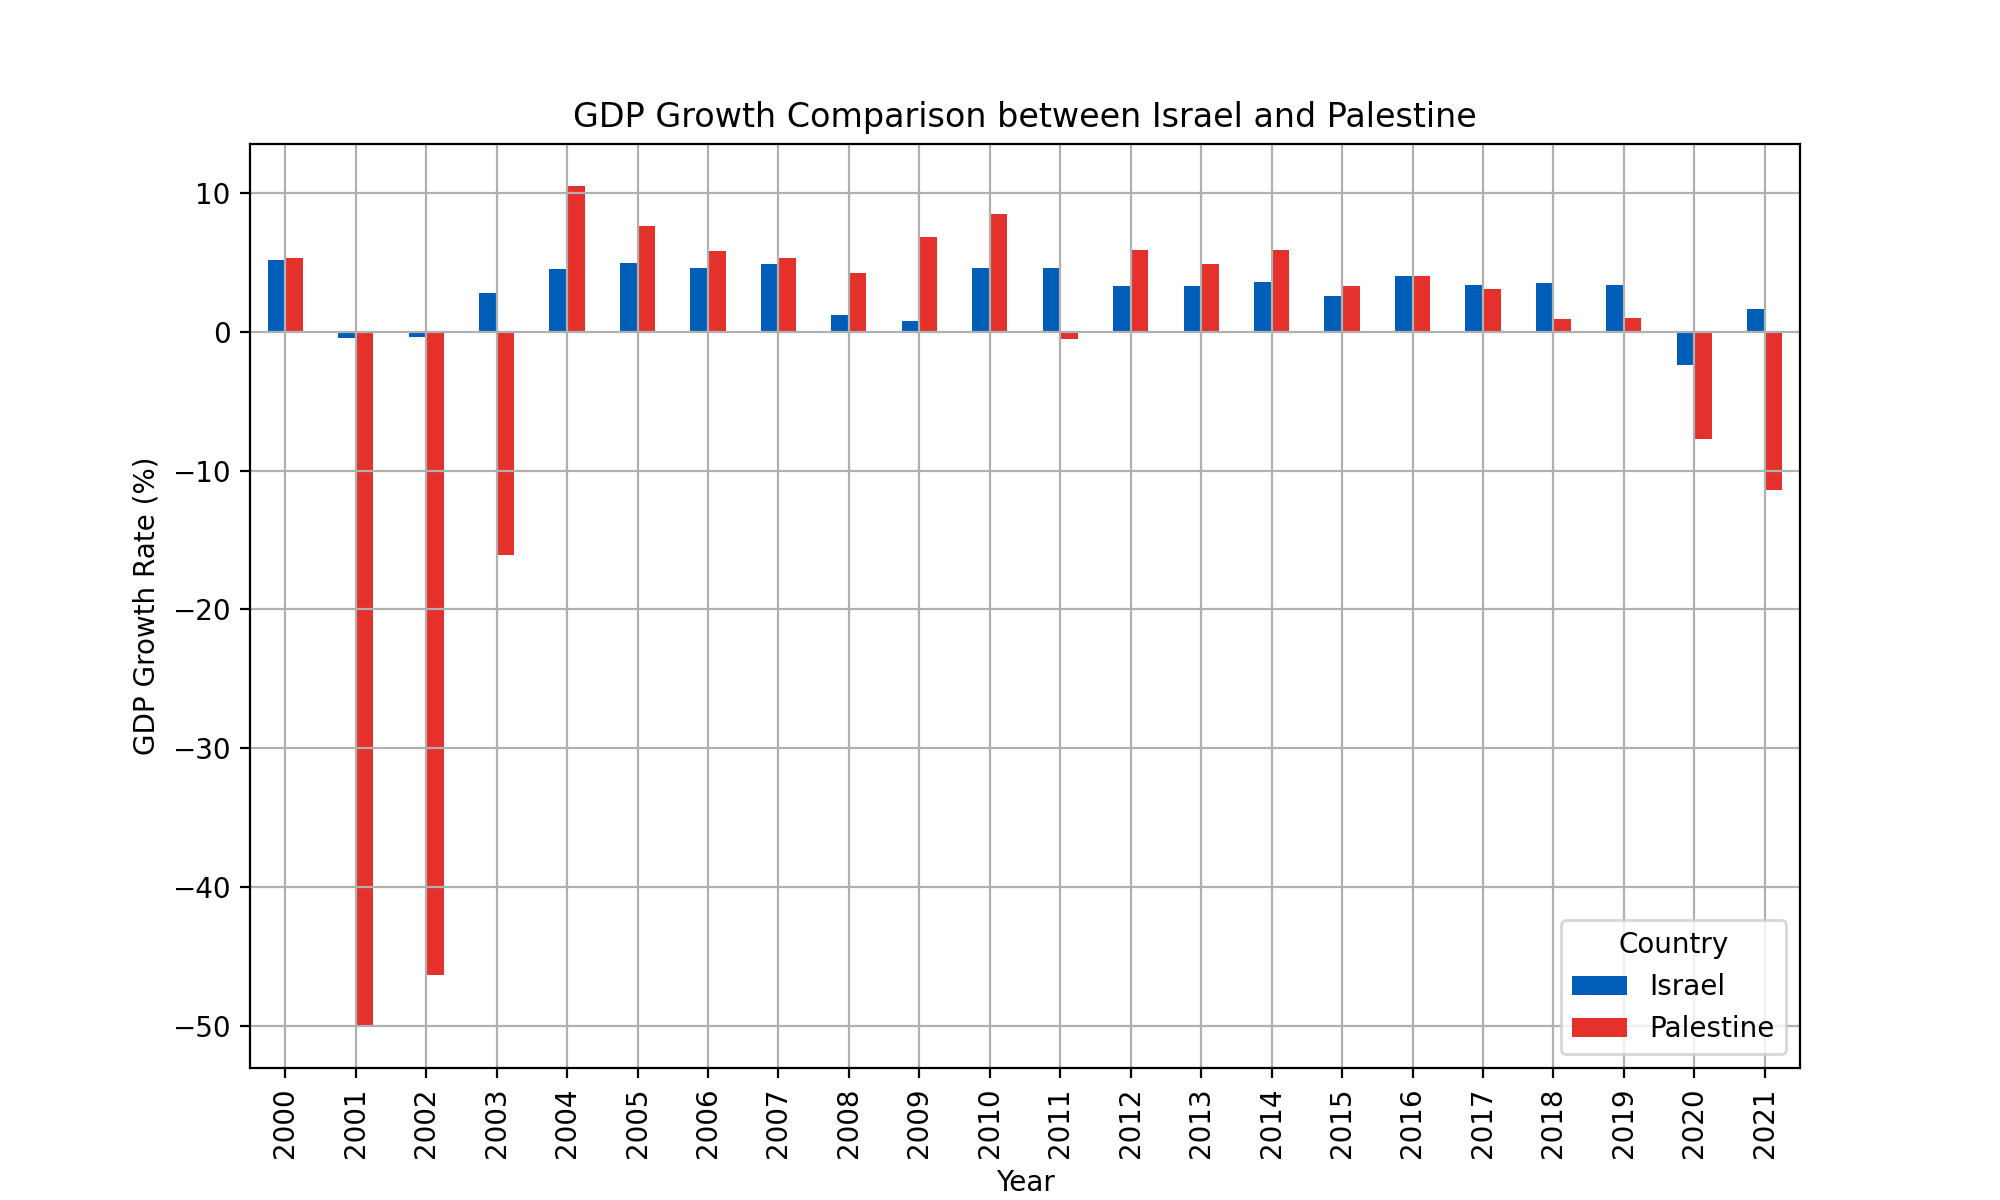

In [45]:
ax = gdp_growth_pivot.plot(kind='bar', figsize=(10, 6), color=colors)
ax.grid(True)

plt.title('GDP Growth Comparison between Israel and Palestine')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.show()

<IPython.core.display.Javascript object>


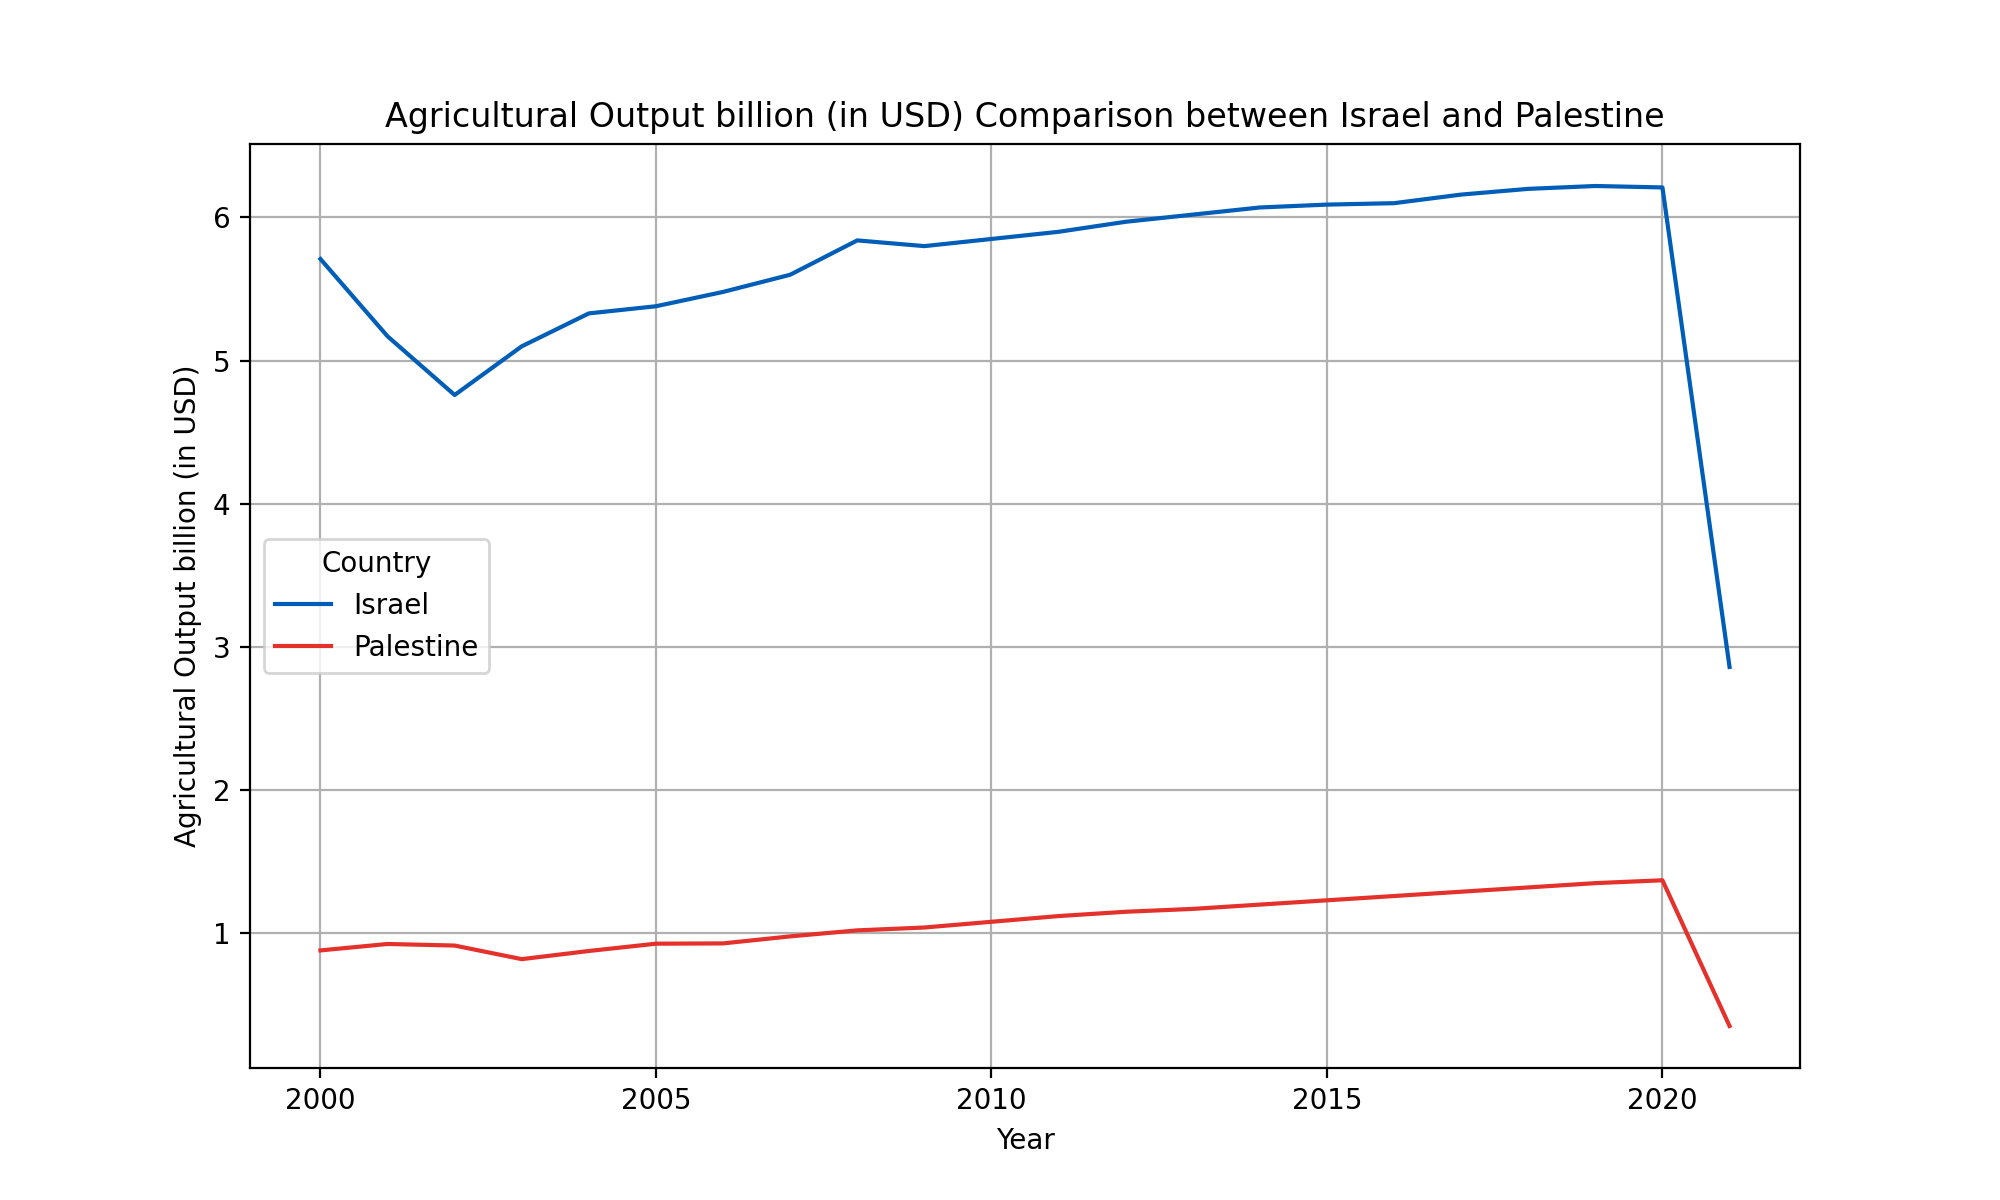

In [75]:
# Create a new DataFrame with years as rows and 'Country' and 'Agricultural Output billion (in USD)' as columns
agre_data = df[df['Country'].isin(['Israel', 'Palestine'])][['Year', 'Country', 'Agricultural Output billion (in USD)']]

# Use pivot to reshape the DataFrame
agre_data_pivot = agre_data.pivot(index='Year', columns='Country', values='Agricultural Output billion (in USD)')

# Plot a line chart
ax = agre_data_pivot.plot(kind='line', figsize=(10, 6), color=colors)

# Add grid lines for better readability
ax.grid(True)

plt.title('Agricultural Output billion (in USD) Comparison between Israel and Palestine')
plt.xlabel('Year')
plt.ylabel('Agricultural Output billion (in USD)')
plt.show()

<IPython.core.display.Javascript object>


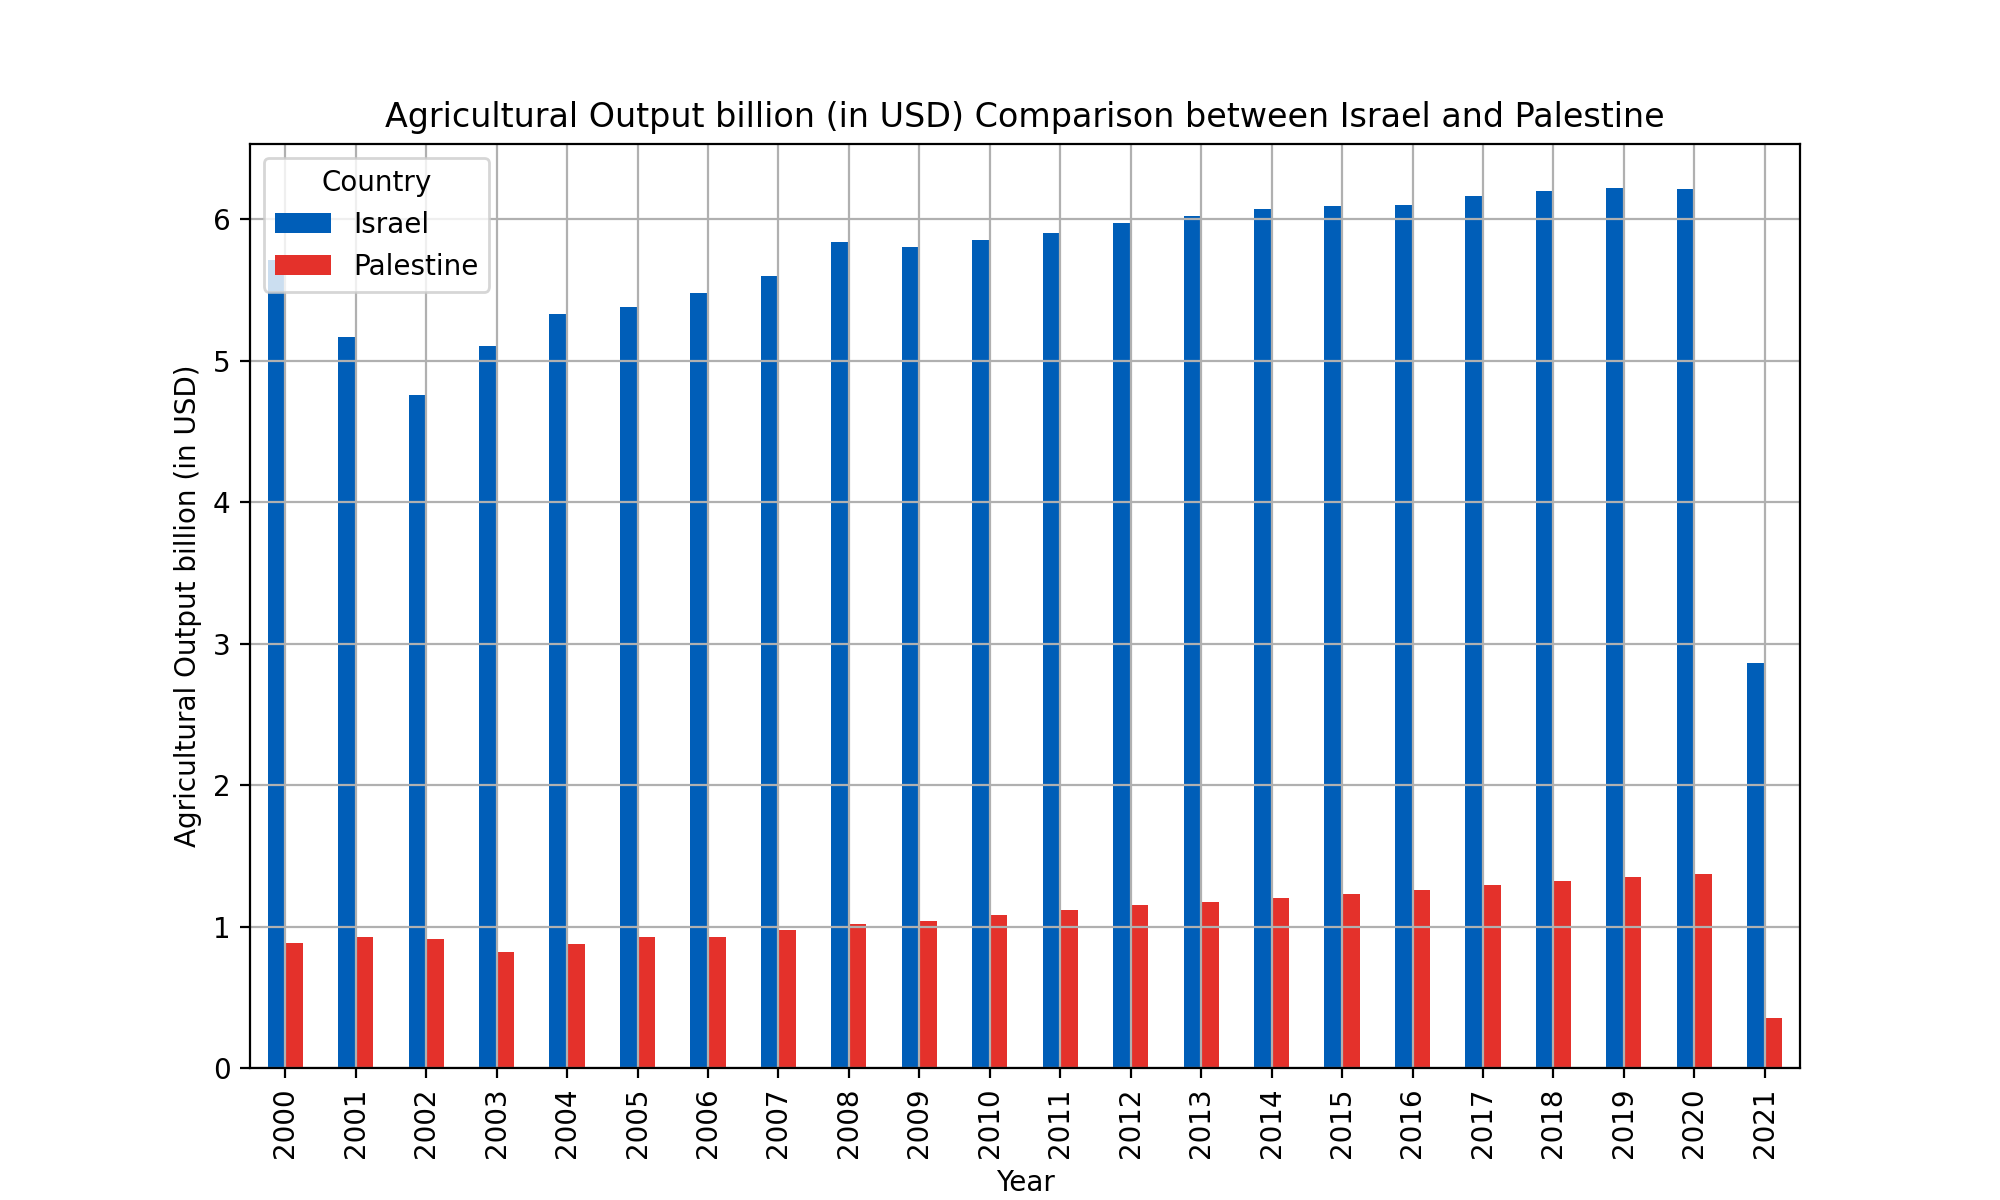

In [76]:
# Plot a line chart
ax = agre_data_pivot.plot(kind='bar', figsize=(10, 6), color=colors)

# Add grid lines for better readability
ax.grid(True)

plt.title('Agricultural Output billion (in USD) Comparison between Israel and Palestine')
plt.xlabel('Year')
plt.ylabel('Agricultural Output billion (in USD)')
plt.show()

<IPython.core.display.Javascript object>


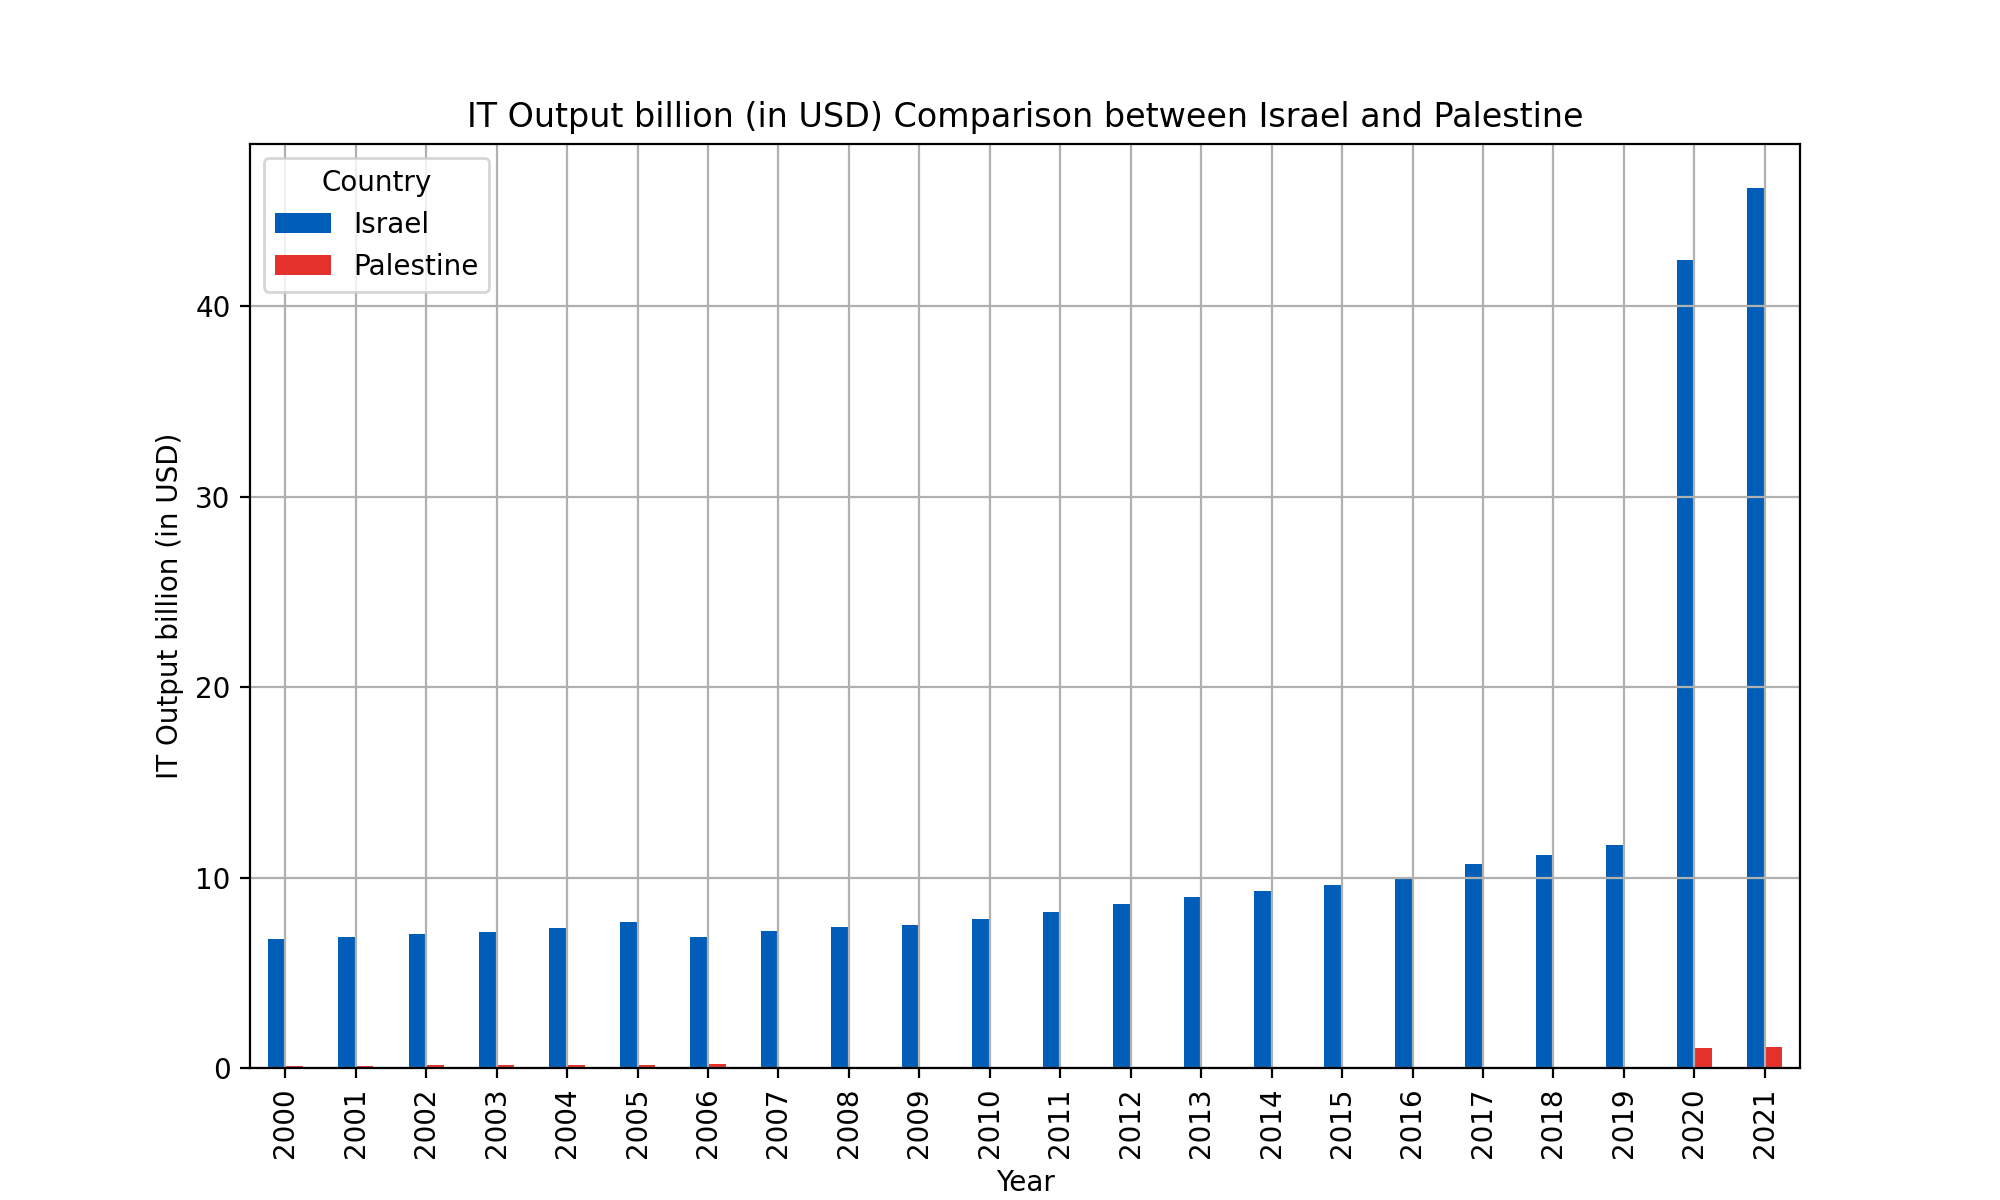

In [103]:
# Create a new DataFrame with years as rows and 'Country' and 'IT Output billion (in USD)' as columns
it_data = df[df['Country'].isin(['Israel', 'Palestine'])][['Year', 'Country', 'IT Output billion (in USD)']]

# Use pivot to reshape the DataFrame
it_data_pivot = it_data.pivot(index='Year', columns='Country', values='IT Output billion (in USD)')

# Plot a line chart
ax = it_data_pivot.plot(kind='bar', figsize=(10, 6), color=colors)

# Add grid lines for better readability
ax.grid(True)

plt.title('IT Output billion (in USD) Comparison between Israel and Palestine')
plt.xlabel('Year')
plt.ylabel('IT Output billion (in USD)')
plt.show()

# 3. Military

1. Active Military Personnel: 
- Israel has kept an average of 170.313 active military personnel between 2000 and 2021.
- Palestine has no data because they have no official army, navy or airforce. 

2. Reserve Military Personnel
- Israel has kept an average of 424.284 reserve military personnel between 2000 and 2021. In 2021 there has been a remarkable increase from 395,000 to 465,000. 
- Palestine has no data because they have no official army, navy or airforce.

3. Number of Tanks
- Israel has kept an average 2.769 tanks between 2000 and 2021.
- Palestine has no data because they have no official army, navy or airforce.

4. Number of Armoured Vehicles
- Israel has kept an average 10.693 armoured vehicles between 2000 and 2021.
- Palestine has no data because they have no official army, navy or airforce.

5. Missing data: https://www.economist.com/the-economist-explains/2023/10/10/how-powerful-is-hamas
- Palestine has no official forces, but Israel estimates that Hamas, the political ruler of Gaza has aproximatly 30.000 soldiers.

6. Proportion of population:
- Israel: In 2021, 6.7% of the population is active or reserve military personnel.
- Palestine: There is no official data, but if we triple the Hamas forces for Gaza and the West Bank. 1.67% of the population would be apart of the military. 

In [119]:
# Selecting relevant columns and filtering data for Israel and Palestine
military_data = df[df['Country'].isin(['Israel', 'Palestine'])][['Year', 'Country', 'Active Military Personnel', 'Reserve Military Personnel', 'Number of Tanks', 'Number of Armoured Vehicles']]

# Separate data for Israel and Palestine
israel_military_data = military_data[military_data['Country'] == 'Israel']
palestine_military_data = military_data[military_data['Country'] == 'Palestine']

# Describing the 'Active Military Personnel' for Israel and Palestine
print("Israel - Active Military Personnel:")
print(israel_military_data['Active Military Personnel'].describe())

print("/nPalestine - Active Military Personnel:")
print(palestine_military_data['Active Military Personnel'].describe())

# Describing the 'Reserve Military Personnel' for Israel and Palestine
print("Israel - Reserve Military Personnel:")
print(israel_military_data['Reserve Military Personnel'].describe())

print("\nPalestine - Reserve Military Personnel:")
print(palestine_military_data['Reserve Military Personnel'].describe())

# Describing the 'Number of Tanks' for Israel and Palestine
print("\nIsrael - Number of Tanks:")
print(israel_military_data['Number of Tanks'].describe())

print("\nPalestine - Number of Tanks:")
print(palestine_military_data['Number of Tanks'].describe())

# Describing the 'Number of Armoured Vehicles' for Israel and Palestine
print("\nIsrael - Number of Armoured Vehicles:")
print(israel_military_data['Number of Armoured Vehicles'].describe())

print("\nPalestine - Number of Armoured Vehicles:")
print(palestine_military_data['Number of Armoured Vehicles'].describe())

Israel - Active Military Personnel:
count        22.000000
mean     170313.636364
std        6391.683246
min      156000.000000
25%      168375.000000
50%      170150.000000
75%      176012.500000
max      179900.000000
Name: Active Military Personnel, dtype: float64
/nPalestine - Active Military Personnel:
count    22.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: Active Military Personnel, dtype: float64
Israel - Reserve Military Personnel:
count        22.000000
mean     424284.090909
std       19982.774644
min      375000.000000
25%      412000.000000
50%      428000.000000
75%      435750.000000
max      465000.000000
Name: Reserve Military Personnel, dtype: float64

Palestine - Reserve Military Personnel:
count    22.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: Reserve Military Personnel, dtype: float64

Israel - Number of Tanks:
count      22.000000
mean     27

<IPython.core.display.Javascript object>


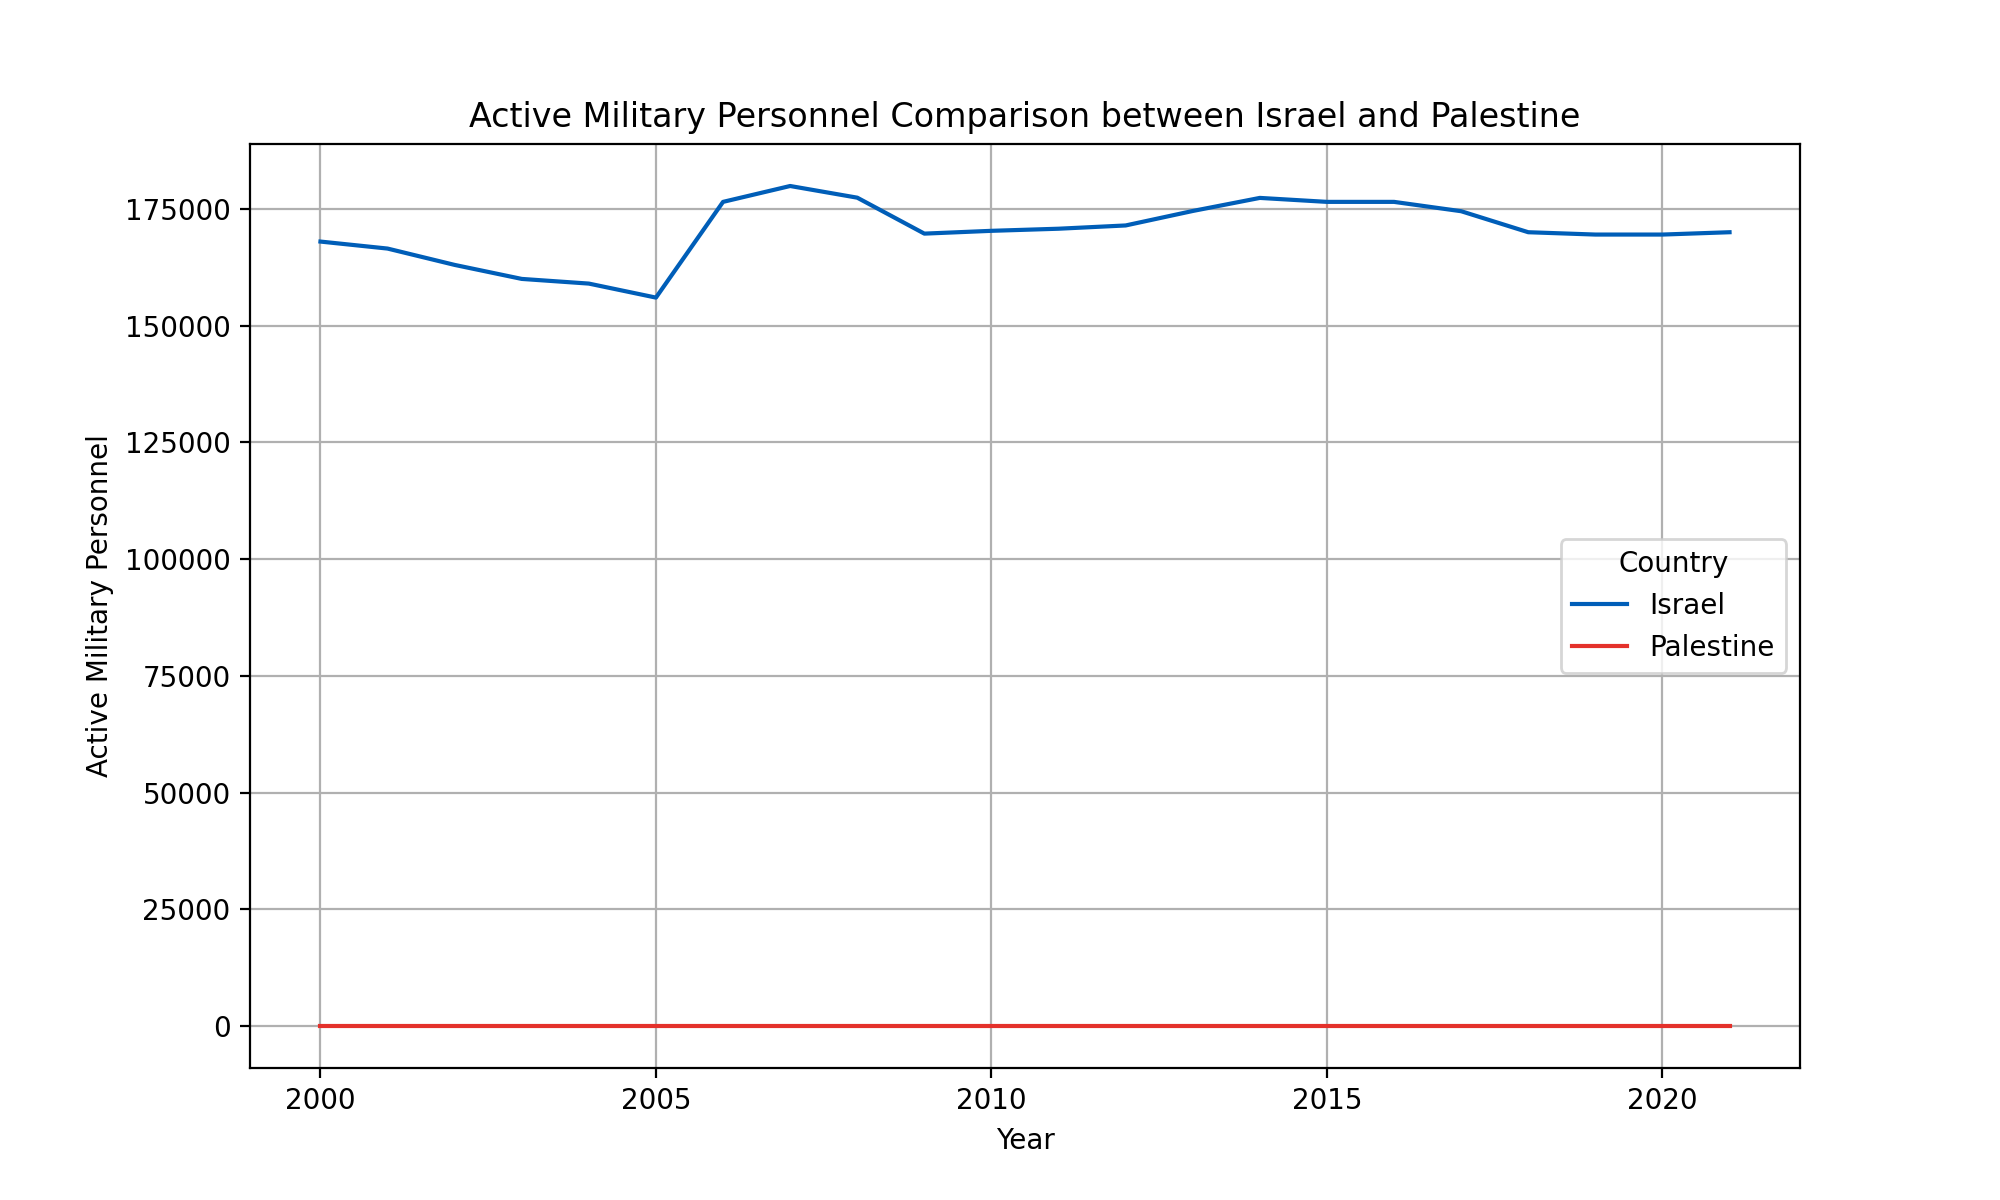

In [118]:
# Use pivot to reshape the DataFrame
military_data_pivot = military_data.pivot(index='Year', columns='Country', values='Active Military Personnel')

# Plot a line chart
ax = military_data_pivot.plot(kind='line', figsize=(10, 6), color=colors)

# Add grid lines for better readability
ax.grid(True)

plt.title('Active Military Personnel Comparison between Israel and Palestine')
plt.xlabel('Year')
plt.ylabel('Active Military Personnel')
plt.show()

<IPython.core.display.Javascript object>


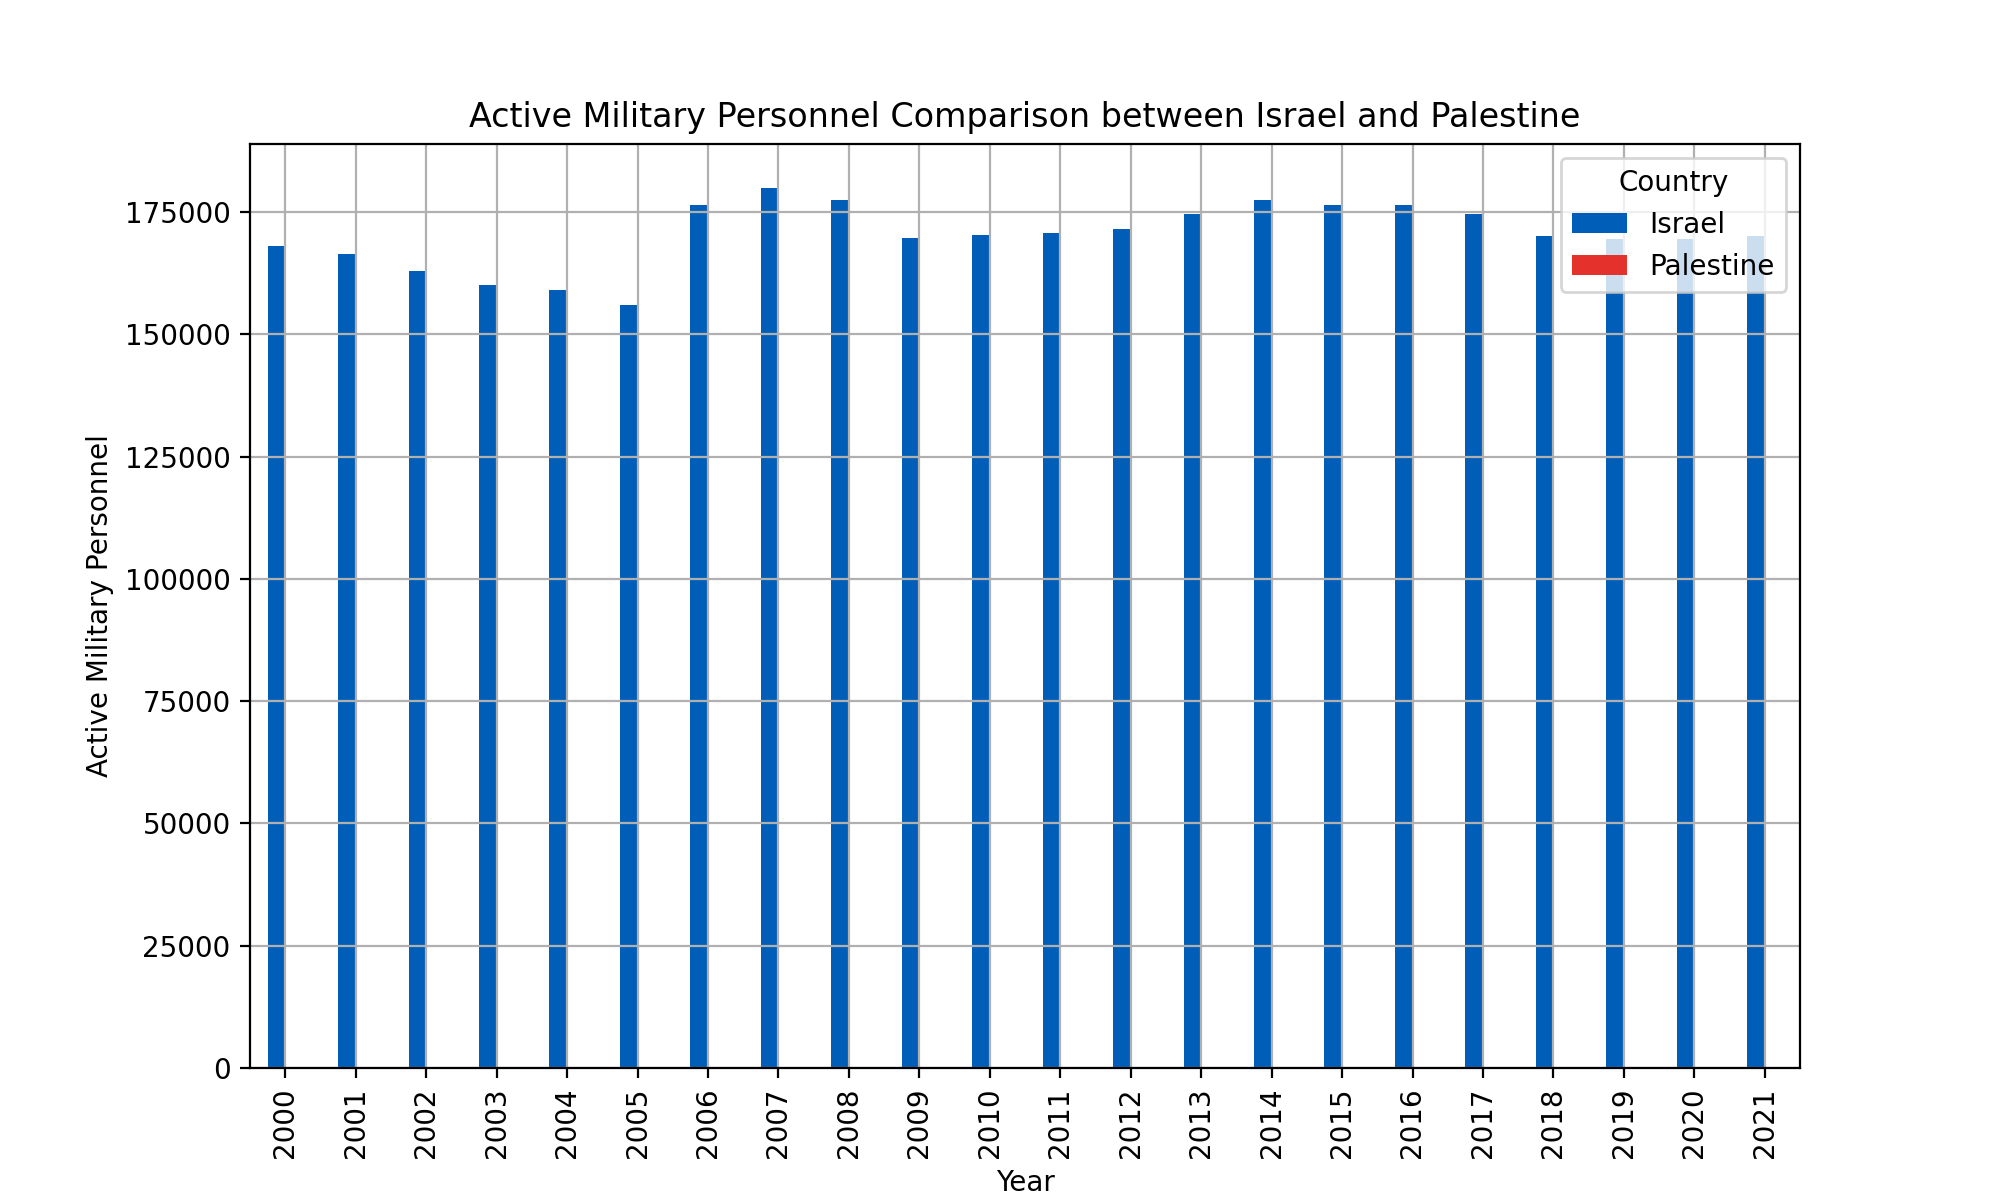

In [106]:
# Use pivot to reshape the DataFrame
military_data_pivot = military_data.pivot(index='Year', columns='Country', values='Active Military Personnel')

# Plot a line chart
ax = military_data_pivot.plot(kind='bar', figsize=(10, 6), color=colors)

# Add grid lines for better readability
ax.grid(True)

plt.title('Active Military Personnel Comparison between Israel and Palestine')
plt.xlabel('Year')
plt.ylabel('Active Military Personnel')
plt.show()

<IPython.core.display.Javascript object>


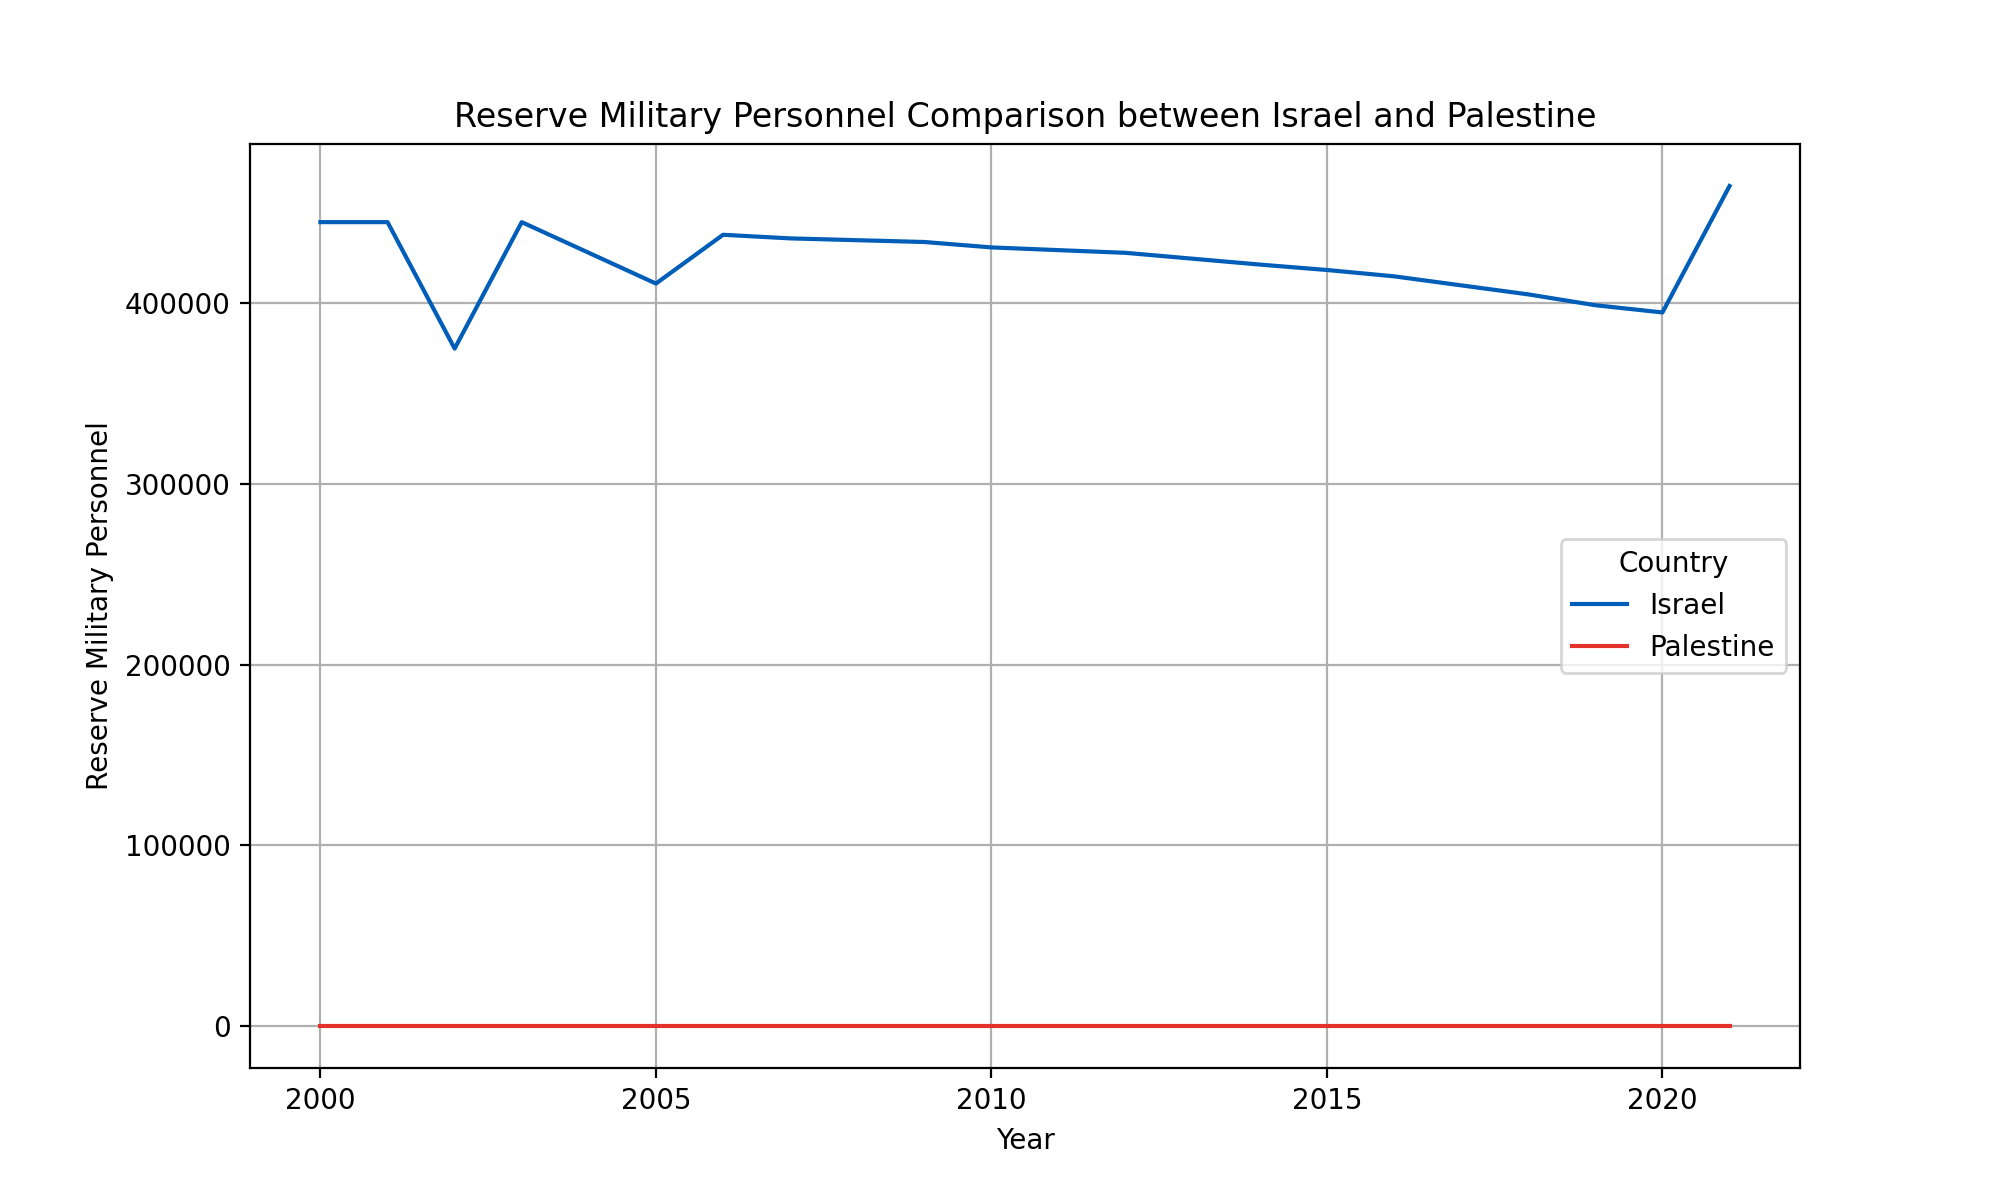

In [81]:
# Create a new DataFrame with years as rows and 'Country' and 'Reserve Military Personnel' as columns
reserve_military_data = df[df['Country'].isin(['Israel', 'Palestine'])][['Year', 'Country', 'Reserve Military Personnel']]

# Use pivot to reshape the DataFrame
reserve_military_data_pivot = reserve_military_data.pivot(index='Year', columns='Country', values='Reserve Military Personnel')

# Plot a line chart
ax = reserve_military_data_pivot.plot(kind='line', figsize=(10, 6), color=colors)

# Add grid lines for better readability
ax.grid(True)

plt.title('Reserve Military Personnel Comparison between Israel and Palestine')
plt.xlabel('Year')
plt.ylabel('Reserve Military Personnel')
plt.show()

<IPython.core.display.Javascript object>


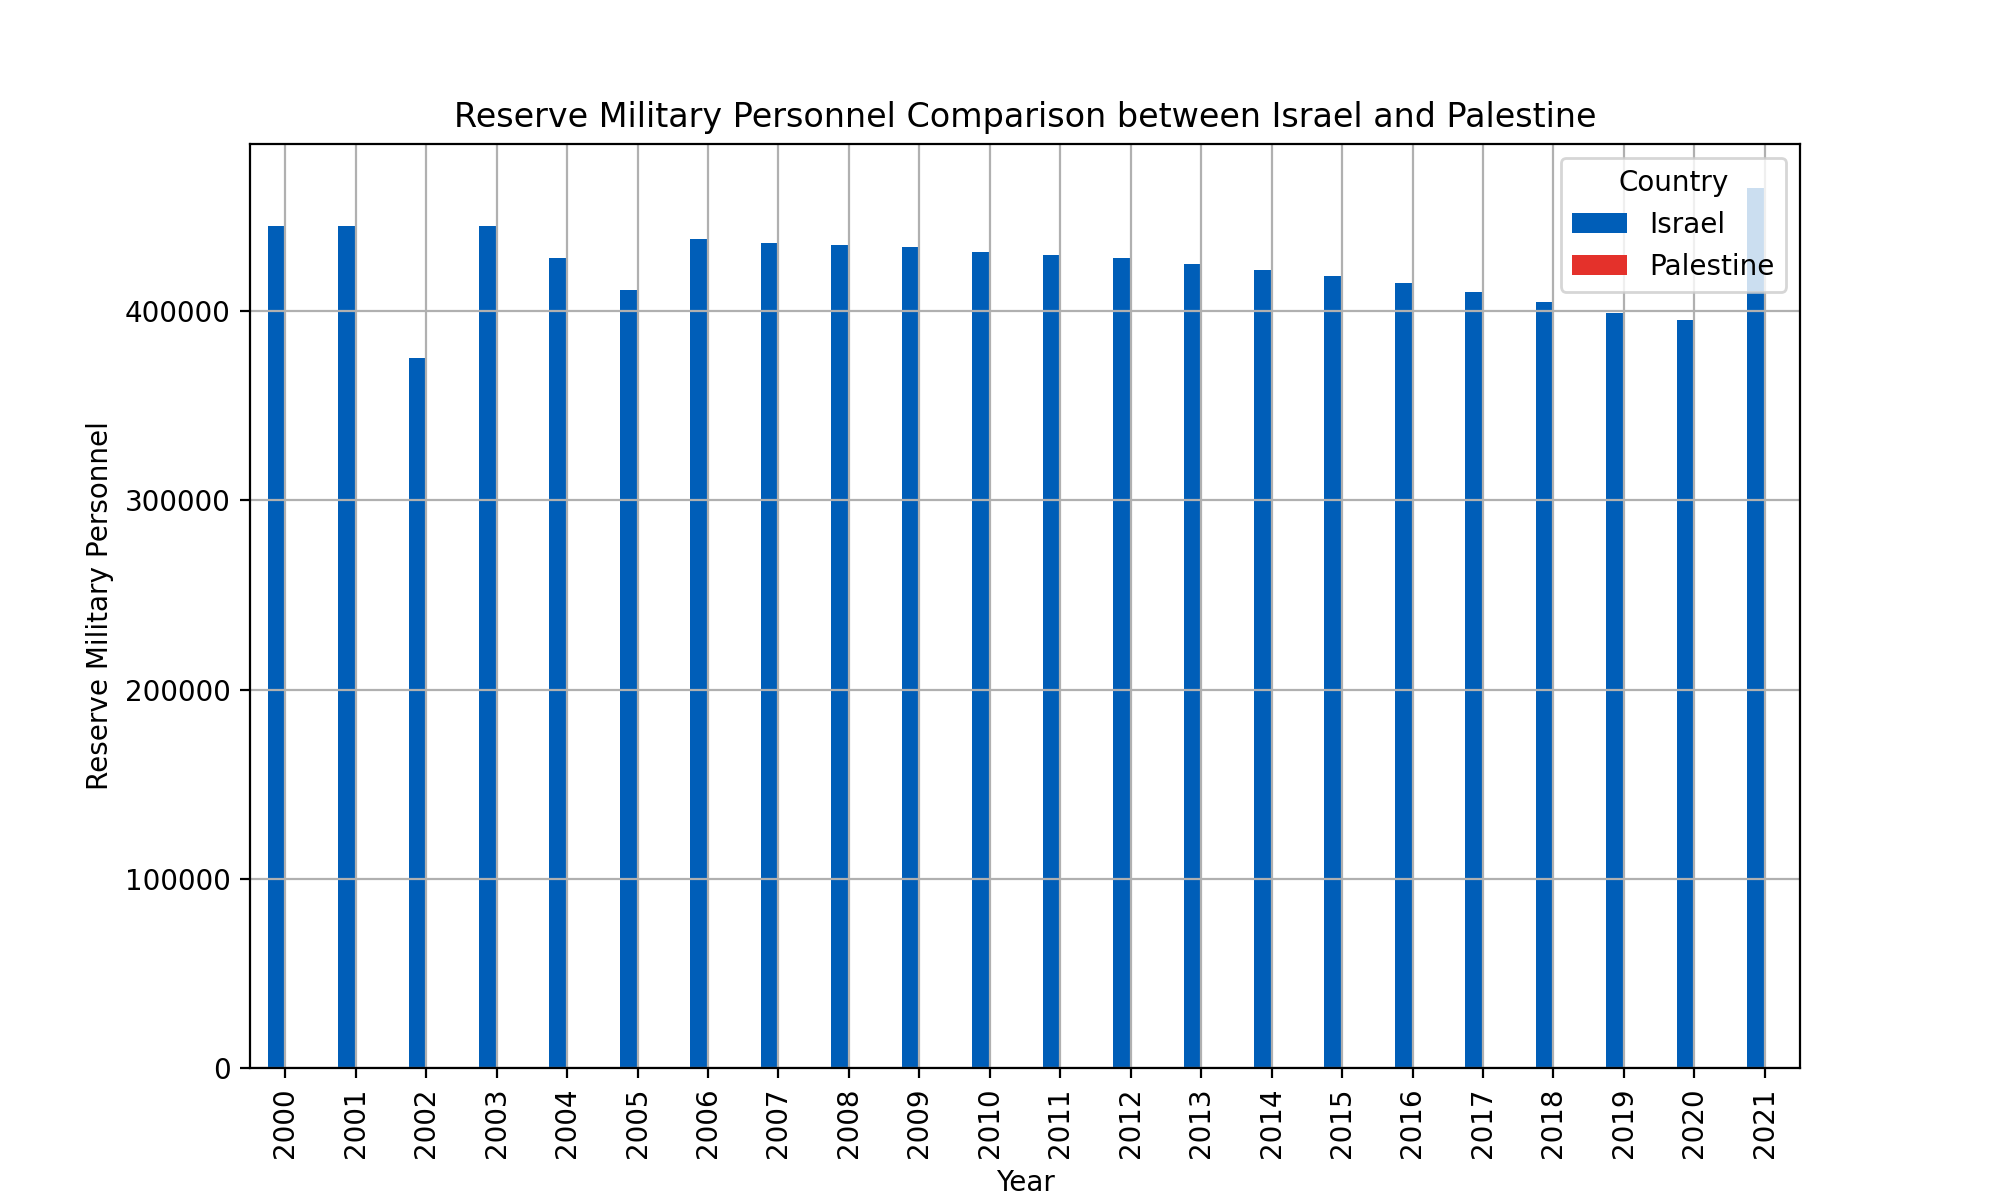

In [82]:
# Plot a line chart
ax = reserve_military_data_pivot.plot(kind='bar', figsize=(10, 6), color=colors)

# Add grid lines for better readability
ax.grid(True)

plt.title('Reserve Military Personnel Comparison between Israel and Palestine')
plt.xlabel('Year')
plt.ylabel('Reserve Military Personnel')
plt.show()

<IPython.core.display.Javascript object>


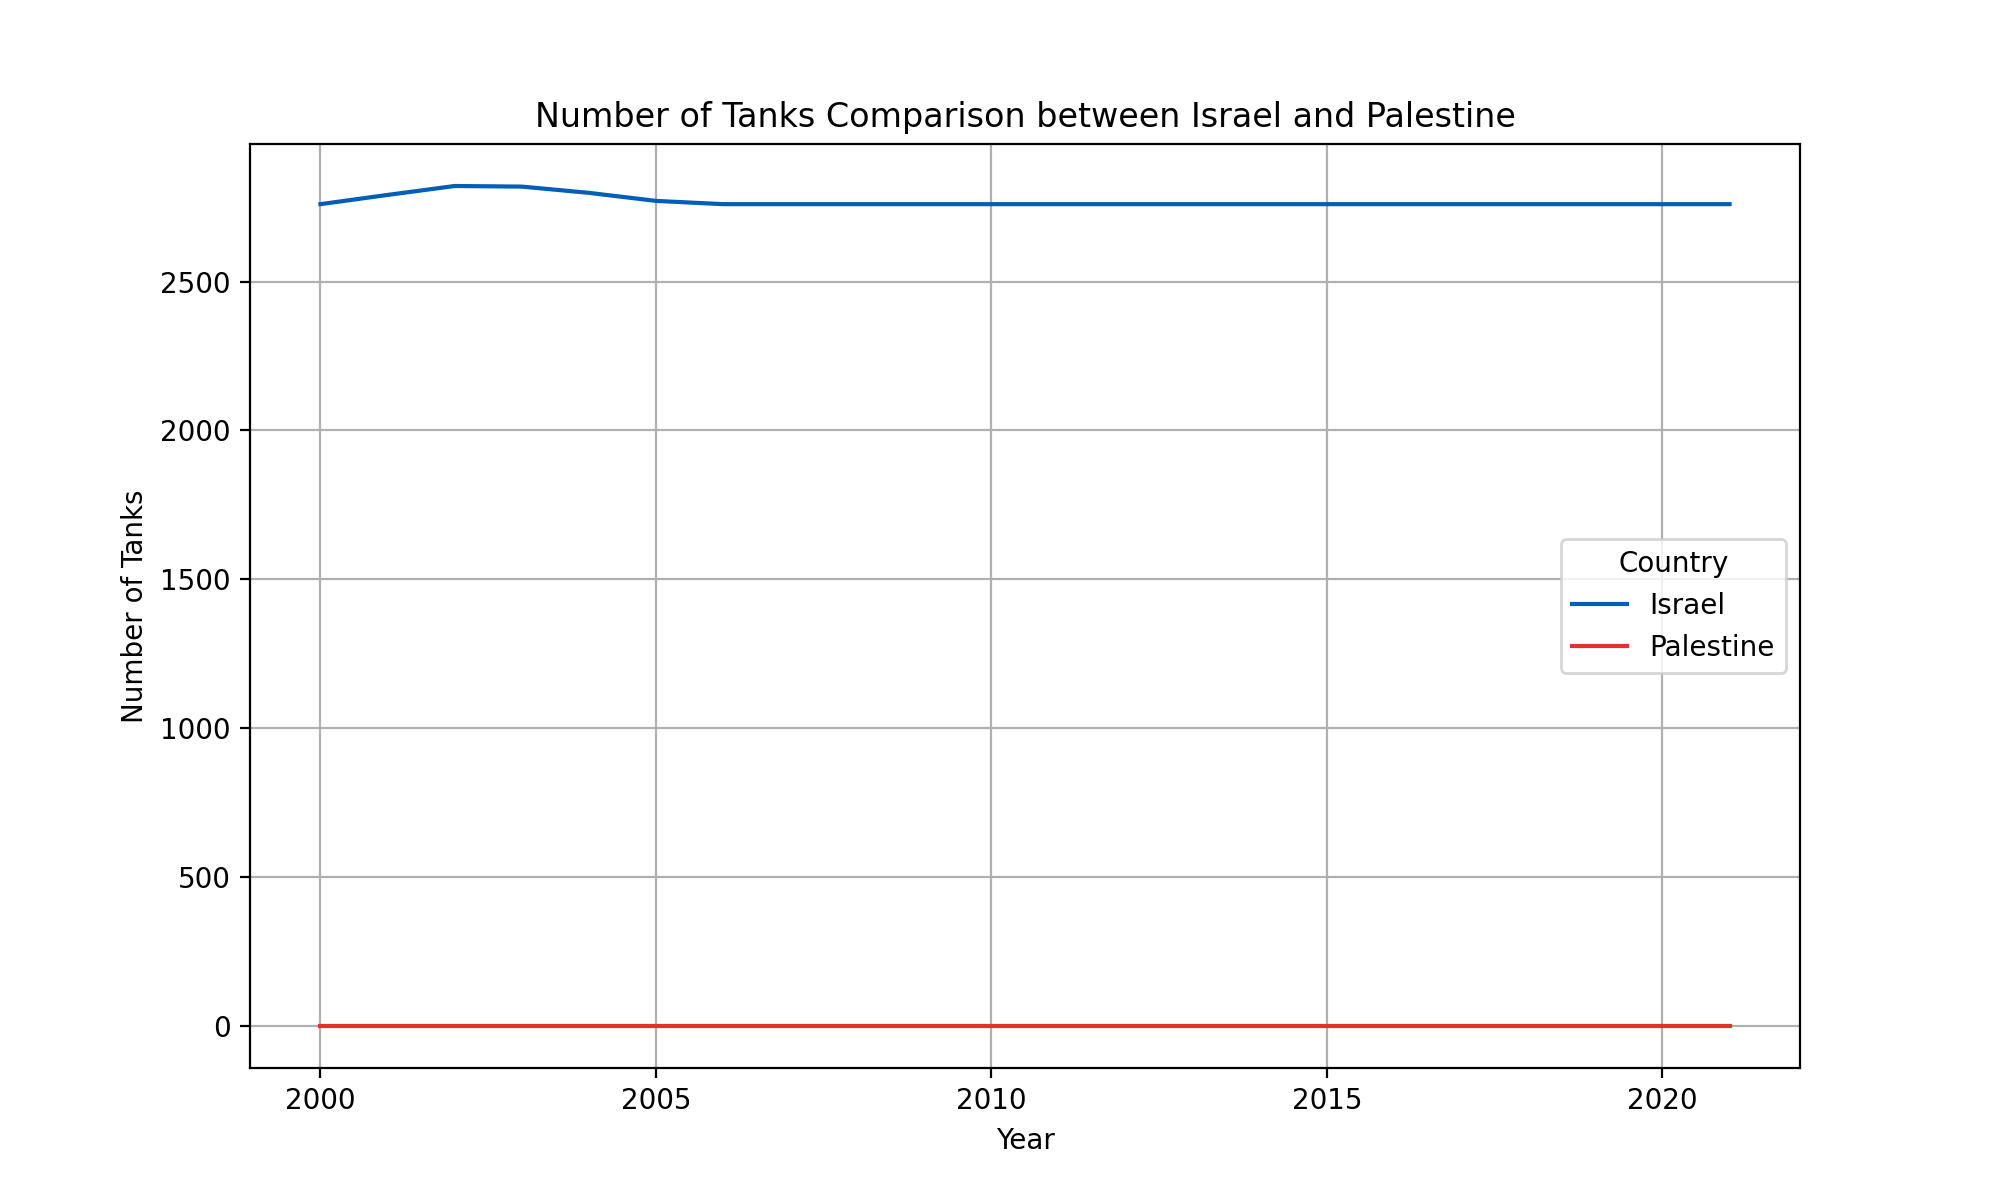

In [91]:
# Create a new DataFrame with years as rows and 'Country' and 'Number of Tanks' as columns
tanks_data = df[df['Country'].isin(['Israel', 'Palestine'])][['Year', 'Country', 'Number of Tanks']]

# Use pivot to reshape the DataFrame
tanks_data_pivot = tanks_data.pivot(index='Year', columns='Country', values='Number of Tanks')

# Plot a line chart
ax = tanks_data_pivot.plot(kind='line', figsize=(10, 6), color=colors)

# Add grid lines for better readability
ax.grid(True)

plt.title('Number of Tanks Comparison between Israel and Palestine')
plt.xlabel('Year')
plt.ylabel('Number of Tanks')
plt.show()

In [ ]:
# Create a new DataFrame with years as rows and 'Country' and 'Number of Submarines' as columns
submarines_data = df[df['Country'].isin(['Israel', 'Palestine'])][['Year', 'Country', 'Number of Submarines']]

# Use pivot to reshape the DataFrame
submarines_data_pivot = submarines_data.pivot(index='Year', columns='Country', values='Number of Submarines')

# Plot a line chart
ax = submarines_data_pivot.plot(kind='line', figsize=(10, 6), color=colors)

# Add grid lines for better readability
ax.grid(True)

plt.title('Number of Submarines Comparison between Israel and Palestine')
plt.xlabel('Year')
plt.ylabel('Number of Submarines')
plt.show()

<IPython.core.display.Javascript object>


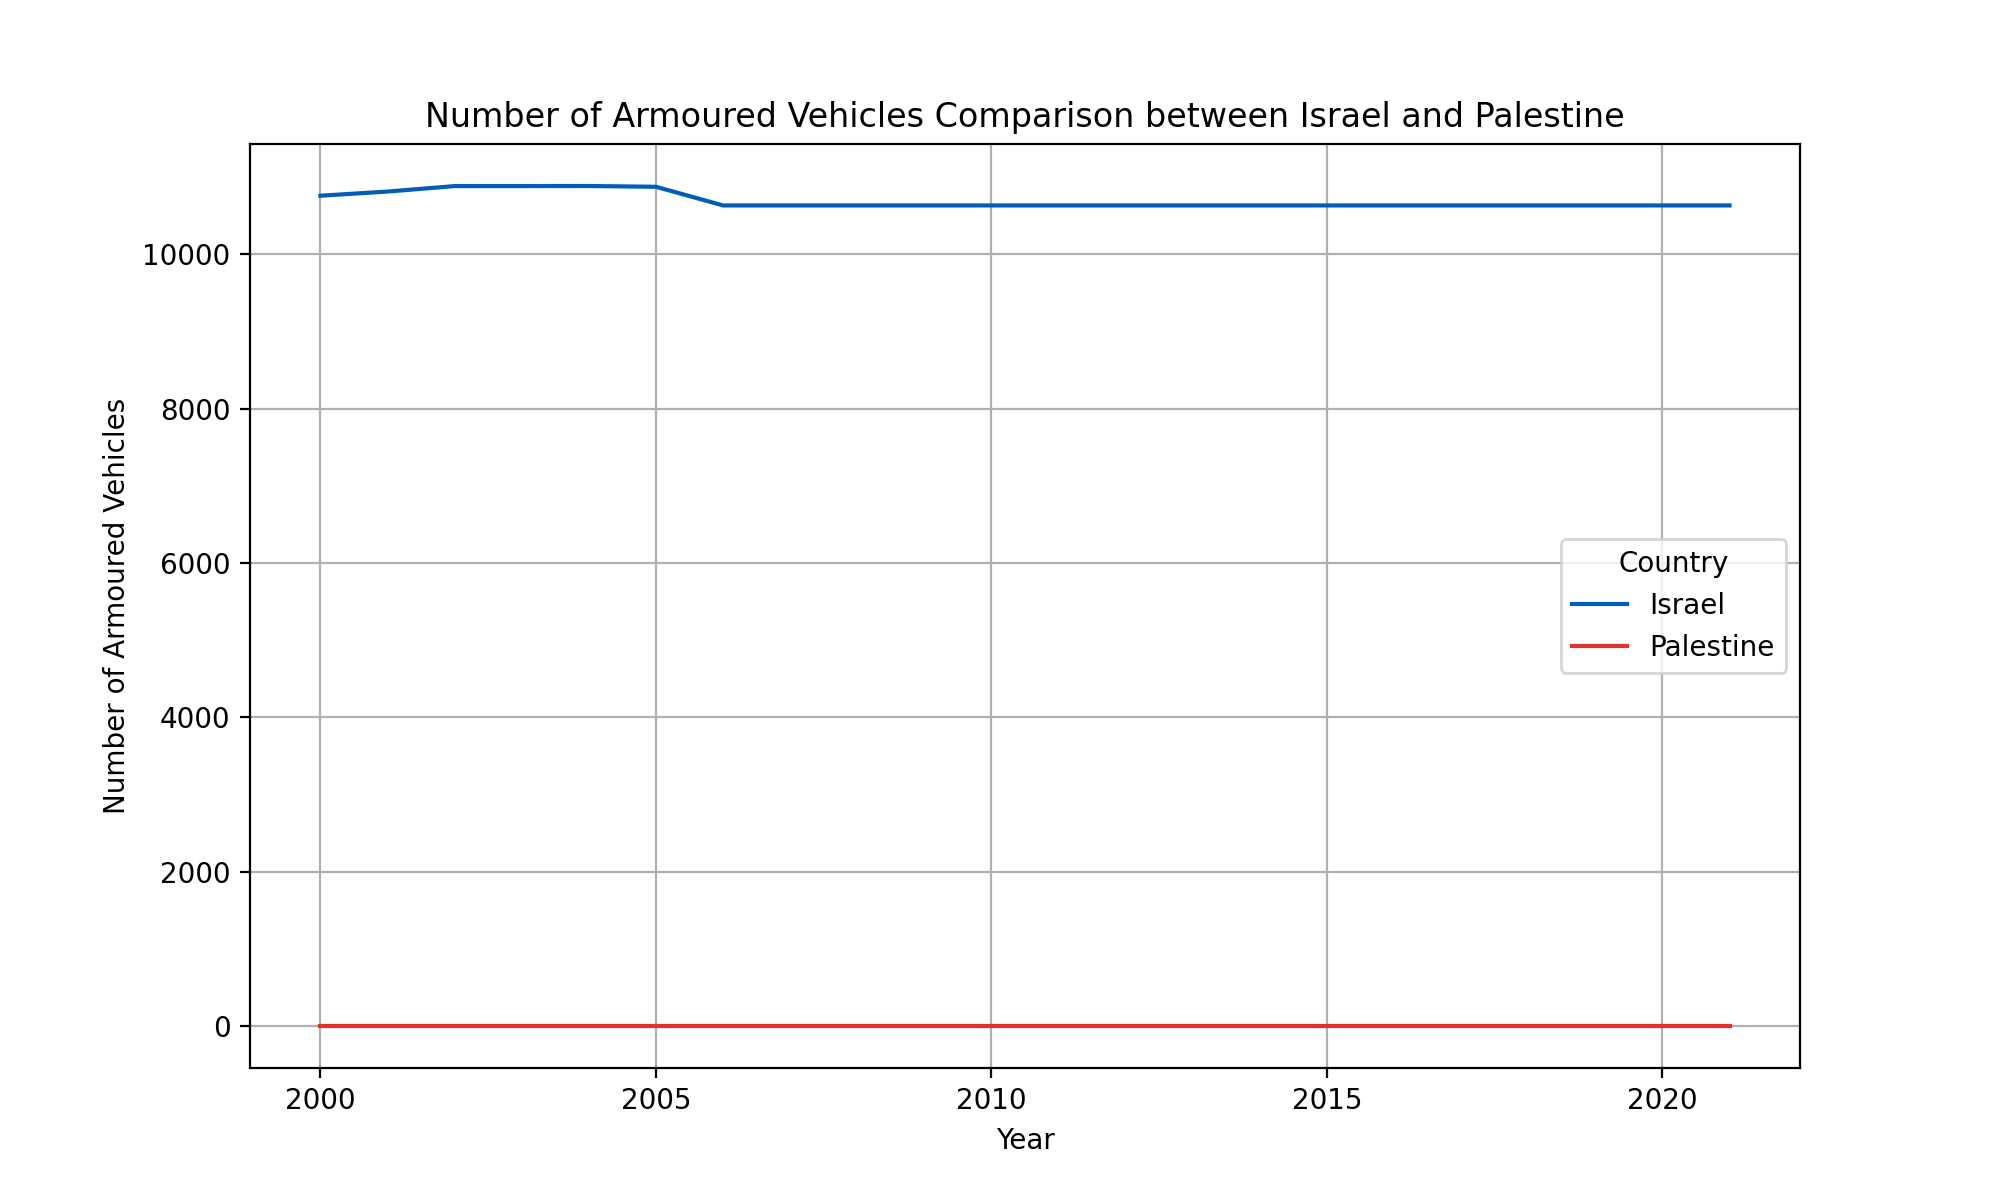

In [92]:
# Create a new DataFrame with years as rows and 'Country' and 'Number of Armoured Vehicles' as columns
armoured_vehicles_data = df[df['Country'].isin(['Israel', 'Palestine'])][['Year', 'Country', 'Number of Armoured Vehicles']]

# Use pivot to reshape the DataFrame
armoured_vehicles_data_pivot = armoured_vehicles_data.pivot(index='Year', columns='Country', values='Number of Armoured Vehicles')

# Plot a line chart
ax = armoured_vehicles_data_pivot.plot(kind='line', figsize=(10, 6), color=colors)

# Add grid lines for better readability
ax.grid(True)

plt.title('Number of Armoured Vehicles Comparison between Israel and Palestine')
plt.xlabel('Year')
plt.ylabel('Number of Armoured Vehicles')
plt.show()

# 4. Are there any correlations between fertility rate and GDP growth?

Palestine:

Correlation of -0.425 and indicates a negative correlation between the two variables, in this case, Fertility Rate and GDP Growth Rate. Negative correlation means that as one variable (Fertility Rate) increases, the other variable (GDP Growth Rate) tends to decrease, and vice versa.

In this context, a correlation of -0.425 suggests that higher fertility rates are associated with lower GDP growth rates, and lower fertility rates are associated with higher GDP growth rates. The strength of this correlation is moderate, but **not extremely strong**.

Israel:

Correlation of -0.219 and indicates a negative correlation between the two variables, in this case, Fertility Rate and GDP Growth Rate. Negative correlation means that as one variable (Fertility Rate) increases, the other variable (GDP Growth Rate) tends to decrease, and vice versa.

In this context, a correlation of -0.219 suggests that higher fertility rates are associated with lower GDP growth rates, and lower fertility rates are associated with higher GDP growth rates. The strength of this correlation is weak to moderate, but **not strong**.

In [98]:
correlation_palestine = palestine_df['Fertility Rate'].corr(palestine_df['GDP Growth Rate (%)'])
print(correlation_palestine)

correlation_israel = israel_df['Fertility Rate'].corr(israel_df['GDP Growth Rate (%)'])
print(correlation_israel)

-0.4255757678253697
-0.2190102562244516


<IPython.core.display.Javascript object>


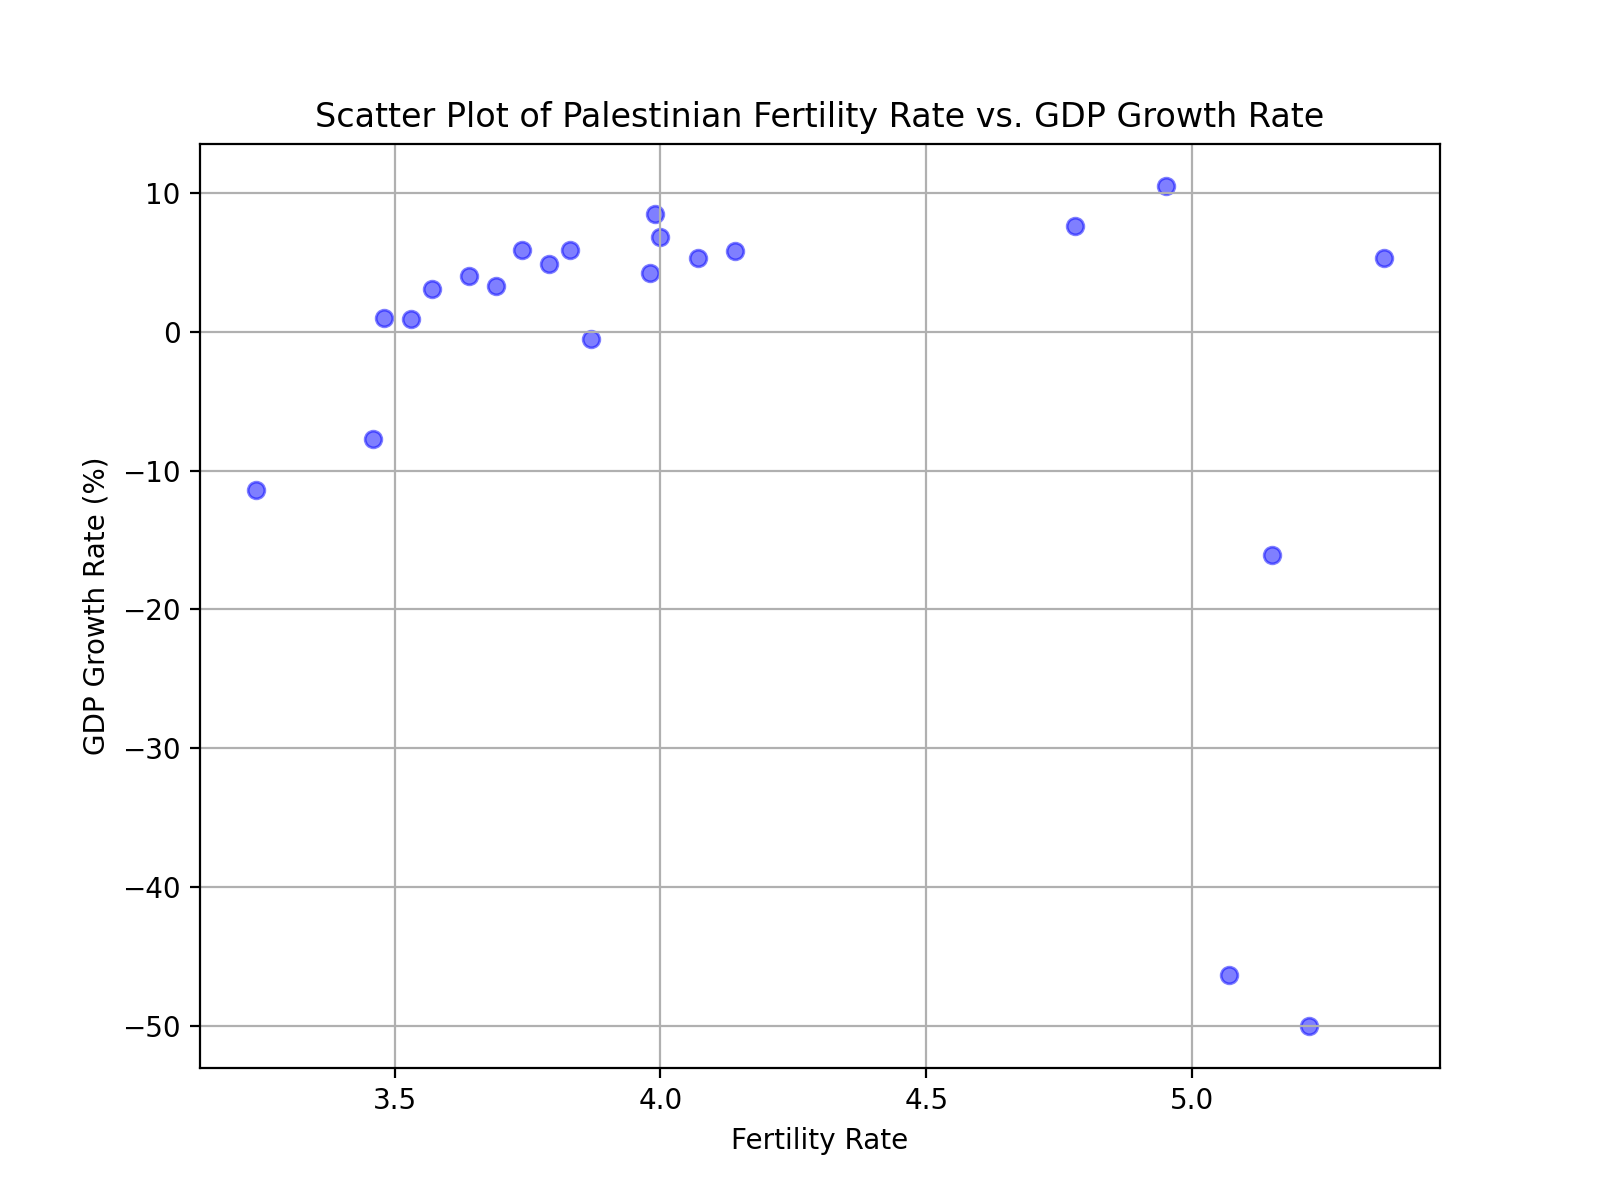

In [100]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(palestine_df['Fertility Rate'], palestine_df['GDP Growth Rate (%)'], c='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Fertility Rate')
plt.ylabel('GDP Growth Rate (%)')
plt.title('Scatter Plot of Palestinian Fertility Rate vs. GDP Growth Rate')

# Show the plot
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


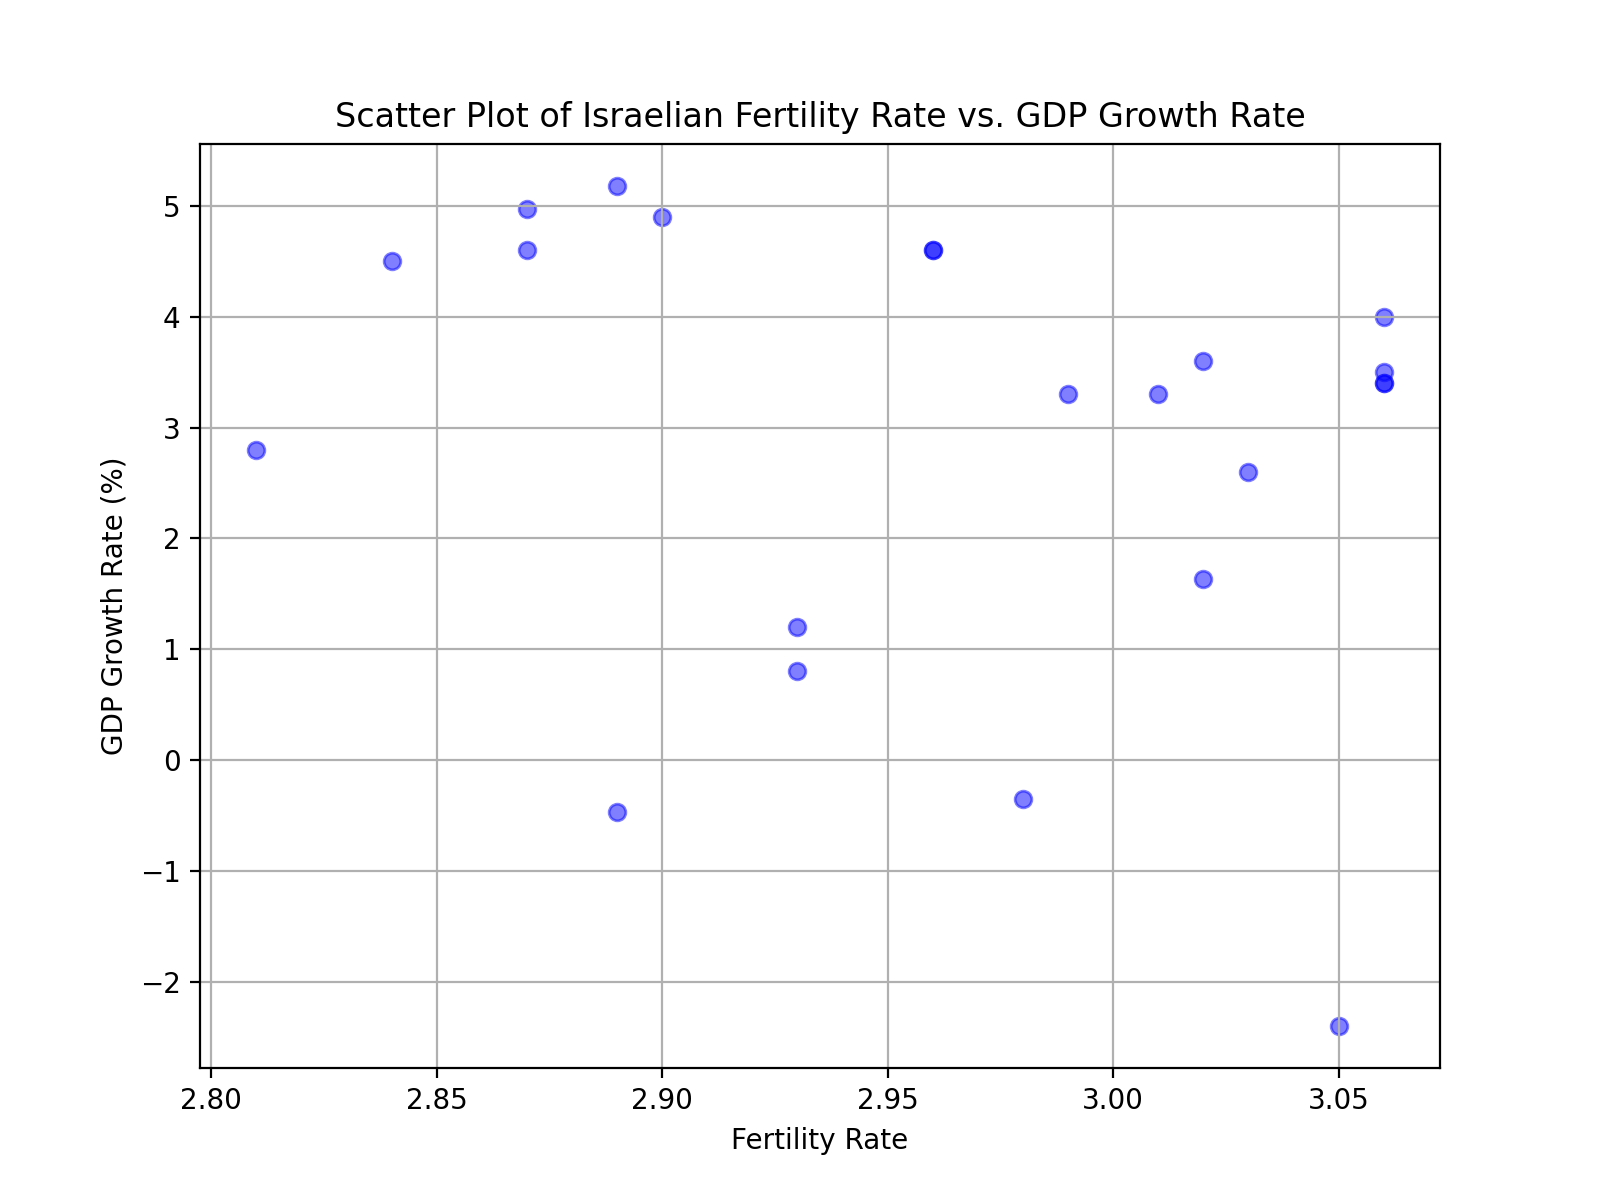

In [101]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(israel_df['Fertility Rate'], israel_df['GDP Growth Rate (%)'], c='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Fertility Rate')
plt.ylabel('GDP Growth Rate (%)')
plt.title('Scatter Plot of Israelian Fertility Rate vs. GDP Growth Rate')

# Show the plot
plt.grid(True)
plt.show()

In [70]:
# Assuming you have a DataFrame named 'df' with columns 'Fertility Rate' and 'GDP Growth Rate (%)'

# Calculate mean
mean_fertility_rate = df['Fertility Rate'].mean()
mean_gdp_growth = df['GDP Growth Rate (%)'].mean()

# Calculate median
median_fertility_rate = df['Fertility Rate'].median()
median_gdp_growth = df['GDP Growth Rate (%)'].median()

# Calculate standard deviation
std_fertility_rate = df['Fertility Rate'].std()
std_gdp_growth = df['GDP Growth Rate (%)'].std()

# Calculate quartiles
quartiles_fertility_rate = df['Fertility Rate'].quantile([0.25, 0.5, 0.75])
quartiles_gdp_growth = df['GDP Growth Rate (%)'].quantile([0.25, 0.5, 0.75])

# Print the results
print("Fertility Rate Statistics:")
print(f"Mean: {mean_fertility_rate}")
print(f"Median: {median_fertility_rate}")
print(f"Standard Deviation: {std_fertility_rate}")
print("Quartiles:")
print(quartiles_fertility_rate)

print("\nGDP Growth Rate Statistics:")
print(f"Mean: {mean_gdp_growth}")
print(f"Median: {median_gdp_growth}")
print(f"Standard Deviation: {std_gdp_growth}")
print("Quartiles:")
print(quartiles_gdp_growth)

Fertility Rate Statistics:
Mean: 3.5395454545454554
Median: 3.1500000000000004
Standard Deviation: 0.7427633963801084
Quartiles:
0.25    2.9750
0.50    3.1500
0.75    3.8975
Name: Fertility Rate, dtype: float64

GDP Growth Rate Statistics:
Mean: 0.33386363636363625
Median: 3.45
Standard Deviation: 11.698278588512963
Quartiles:
0.25    0.9750
0.50    3.4500
0.75    4.9175
Name: GDP Growth Rate (%), dtype: float64


# Conclusion

Israel and Palestine are almost uncompareable when analyzed. It's like comparing a race car to a bicycle.
- Demography: Israel has a langer population that is growing at a faster pace. Plus, more Palestinian kids and mothers are dying per 1000 births.
- Economicly: The size difference between Israel and Palestine is humongous. The Israelian IT output is more than the entire GDP of Palestine. By 2021 Israel's GDP is 26 times bigger than that of Palestine.
- Military: Israel has a larger military, active or reserve and larger inventory of vehicles and equipment. Palestine has no official army, navy or airforce. 

The analyzed data shows that Palestine is not functioning properly as a healthy state. They dont provide all the data, have no military and their economy is in ruins. Palestine is not a official state and shows all the signs of not being one. 

Note:
- The data from the downloaded data set on Kaggle seems to have inconsistancy in comparison to the data found on the world bank website. That is why the correlation between the Fertility Rate and GDP growth are not included.